In [2]:
import pandas as pd
import datetime
import numpy as np
from tqdm import tqdm_notebook
from datetime import datetime,timedelta
import os
from timeit import default_timer as timer
from scipy import stats
from sklearn import linear_model
import matplotlib.pyplot as plt
os.chdir('/Users/hudsonyeo/Desktop/Python/leo/data/day/TA')
file_list=os.listdir('/Users/hudsonyeo/Desktop/Python/leo/data/day/TA')
file_list.sort()

In [3]:
file_list

['.DS_Store',
 '2019.01.02.csv',
 '2019.01.03.csv',
 '2019.01.04.csv',
 '2019.01.07.csv',
 '2019.01.08.csv',
 '2019.01.09.csv',
 '2019.01.10.csv',
 '2019.01.11.csv',
 '2019.01.14.csv',
 '2019.01.15.csv',
 '2019.01.16.csv',
 '2019.01.17.csv',
 '2019.01.18.csv',
 '2019.01.21.csv',
 '2019.01.22.csv',
 '2019.01.23.csv',
 '2019.01.24.csv',
 '2019.01.25.csv',
 '2019.01.28.csv',
 '2019.01.29.csv',
 '2019.01.30.csv',
 '2019.01.31.csv',
 '2019.02.01.csv',
 '2019.02.11.csv',
 '2019.02.12.csv',
 '2019.02.13.csv',
 '2019.02.14.csv',
 '2019.02.15.csv',
 '2019.02.18.csv',
 '2019.02.19.csv',
 '2019.02.20.csv',
 '2019.02.21.csv',
 '2019.02.22.csv',
 '2019.02.25.csv',
 '2019.02.26.csv',
 '2019.02.27.csv',
 '2019.02.28.csv',
 '2019.03.01.csv',
 '2019.03.04.csv',
 '2019.03.05.csv',
 '2019.03.06.csv',
 '2019.03.07.csv',
 '2019.03.08.csv',
 '2019.03.11.csv',
 '2019.03.12.csv',
 '2019.03.13.csv',
 '2019.03.14.csv',
 '2019.03.15.csv',
 '2019.03.18.csv',
 '2019.03.19.csv',
 '2019.03.20.csv',
 '2019.03.21.csv'

In [8]:
class categorise():
    def __init__(self):
        self.threshold=[]
        self.percentiles=[25,50,75]
        
    def fit(self,array):
        positive=array[array>0]
        negative=array[array<0]
        self.threshold.append(np.percentile(negative,self.percentiles))   
        self.threshold.append(np.percentile(positive,self.percentiles))
     
    def return_quartile(self,array):
        temp=[]
        for i in array:
            if i>=0:
                if i<self.threshold[1][0]:
                    temp.append(5)
                elif i<self.threshold[1][1]:
                    temp.append(6)
                elif i<self.threshold[1][2]:
                    temp.append(7)
                else:
                    temp.append(8)
            if i<0:
                if i>self.threshold[0][2]:
                    temp.append(4)
                elif i>self.threshold[0][1]:
                    temp.append(3)
                elif i>self.threshold[0][0]:
                    temp.append(2)
                else:
                    temp.append(1)
        return np.asarray(temp)
    
class categorise_simple():
    def __init__(self):
        self.threshold=[]
        self.percentiles=[25,50,75]
        
    def fit(self,array):
        self.threshold.append(np.percentile(array,self.percentiles))
     
    def return_quartile(self,array):
        temp=[]
        for i in array:
                if i<self.threshold[0][0]:
                    temp.append(1)
                elif i<self.threshold[0][1]:
                    temp.append(2)
                elif i<self.threshold[0][2]:
                    temp.append(3)
                else:
                    temp.append(4)
        return np.asarray(temp)    
    
class categorise_10():
    def __init__(self):
        self.threshold=[]
        self.percentiles=[10,20,30,40,50,60,70,80,90]
        
    def fit(self,array):
        positive=array[array>0]
        negative=array[array<0]
        self.threshold.append(np.percentile(negative,self.percentiles))   
        self.threshold.append(np.percentile(positive,self.percentiles))
     
    def return_quartile(self,array):
        temp=[]
        for i in array:
            if i>=0:
                if i<self.threshold[1][0]:
                    temp.append(11)
                elif i<self.threshold[1][1]:
                    temp.append(12)
                elif i<self.threshold[1][2]:
                    temp.append(13)
                elif i<self.threshold[1][3]:
                    temp.append(14)
                elif i<self.threshold[1][4]:
                    temp.append(15)
                elif i<self.threshold[1][5]:
                    temp.append(16)
                elif i<self.threshold[1][6]:
                    temp.append(17)
                elif i<self.threshold[1][7]:
                    temp.append(18)
                elif i<self.threshold[1][8]:
                    temp.append(19)                    
                else:
                    temp.append(20)
            if i<0:
                if i<self.threshold[0][0]:
                    temp.append(1)
                elif i<self.threshold[0][1]:
                    temp.append(2)
                elif i<self.threshold[0][2]:
                    temp.append(3)
                elif i<self.threshold[0][3]:
                    temp.append(4)
                elif i<self.threshold[0][4]:
                    temp.append(5)
                elif i<self.threshold[0][5]:
                    temp.append(6)
                elif i<self.threshold[0][6]:
                    temp.append(7)
                elif i<self.threshold[0][7]:
                    temp.append(8)
                elif i<self.threshold[0][8]:
                    temp.append(9)                    
                else:
                    temp.append(10)
        return np.asarray(temp)    

In [9]:
def calc_smart_price(dataset):
    data=dataset[:]
    
    #to combat the limit up event, where price is set to 0. 
    rows=(data.loc[:,'BidPrice1']==0) #count rows of bid price equal 0
    if (np.any(rows)): #if there is such a row
        data.at[rows,'BidPrice1']=data.loc[rows,'AskPrice1'] #for that row, assign ask price to it
    rows=(data.loc[:,'AskPrice1']==0) #do the same for ask price
    if (np.any(rows)):
        data.at[rows,'AskPrice1']=data.loc[rows,'BidPrice1'] 
        
    data['smart_price']=data.loc[:,'BidPrice1']*data.loc[:,'AskVol1']+data.loc[:,'AskPrice1']*data.loc[:,'BidVol1']
    data.at[:,'smart_price']=data.loc[:,'smart_price']/(data.loc[:,['BidVol1','AskVol1']].sum(axis=1))  
    return data

def calc_future_price(dataset,time_ahead=30):
    data=dataset[:]
    future_price=[]
    length=len(data)
    for i in range(len(data)):
        current_time=data[i,44]+timedelta(seconds=time_ahead)
        #print(data[i,44])
        j=0
        #print(current_time)
        while((i+j)<length and current_time>data[(i+j),44]):
            j+=1
        #print(i,j,(data[(i+j-1),44]))
        if (i+j)<length:
            future_price.append(data[(i+j),51]) #51 is the index for smart price            
        else:
            future_price.append(np.nan)
    future_price=np.asarray(future_price)
    future_price=np.expand_dims(future_price,axis=1)
    return np.concatenate((data,future_price),axis=1)


def calc_edge(dataset):
    data=dataset.copy()
    temp=data[:,52]-data[:,51]
    temp=np.expand_dims(temp,axis=1)
    return np.concatenate((data,temp),axis=1)

def set_index(dataset):
    data=dataset[:]
    index=data[:,44]
    new_index=[]
    for j in range(len(index)):
        i=str(index[j]*1000)
        if len(i)==11:
            i='0'+i
        i=i[:-10]+':'+i[-10:]
        i=i[:-8]+':'+i[-8:]
        i=i[:-6]+':'+i[-6:]
        new_index.append(datetime.strptime(i,"%H:%M:%S:%f"))
    data[:,44]=new_index
    return data

def calc_sma_fast(dataset,duration=1): #faster way to calculate SMA, 0.05 seconds for 5000 rows
    data=dataset[:]
    sma_values=[] 
    smart_sum=np.cumsum(data[:,51])
    for i in range(len(data)):
        last_time=data[i,44]-timedelta(minutes=duration)
        j=220*duration#4x60=240
        while(i-j>0 and data[i-j,44]>last_time):
            j+=1
        if (i-j>=0):
            sma=(smart_sum[i]-smart_sum[i-j])/(j)
            sma_values.append(sma)
        else:
            sma=smart_sum[i]/(i+1)
            sma_values.append(sma)

    sma_values=np.asarray(sma_values)
    sma_values=data[:,51]-sma_values
    sma_values=np.expand_dims(sma_values,axis=1)
    return np.concatenate((data,sma_values),axis=1)     


def process(dataset,sma_duration=1):
    data=dataset[:]
    data=calc_smart_price(data).values #51
    data=set_index(data)
    data=calc_future_price(data) #52
    data=calc_edge(data) #53
    data=calc_sma_fast(data,duration=sma_duration) #54
    return data
ma_dict={'-4':'1',
        '-3':'5',
        '-2':'15',
        '-1':'30',
        '54':'1',
        '55':'5',
        '56':'15',
        '57':'30'}    
#ignore below        
'''def calc_vwap(dataset,duration=1): #to be implement
    data=dataset[:]
    for i in data[:,44]:
        last_time=i-timedelta(minutes=duration)
        rolling=data[(data[:,44]>=last_time) & (data[:,44]<i)]
        high=rolling[:,51].max()
        low=rolling[:,51].min()
        avg=(rolling[-1,51]+high+low)/3
def calc_rsi(dataset)        '''     

'def calc_vwap(dataset,duration=1): #to be implement\n    data=dataset[:]\n    for i in data[:,44]:\n        last_time=i-timedelta(minutes=duration)\n        rolling=data[(data[:,44]>=last_time) & (data[:,44]<i)]\n        high=rolling[:,51].max()\n        low=rolling[:,51].min()\n        avg=(rolling[-1,51]+high+low)/3\ndef calc_rsi(dataset)        '

In [ ]:
file_list[1][-3:]
df_list=[]
name_list=[]
path='/Users/hudsonyeo/Desktop/Python/leo/data/day/TA/'
for file in file_list: #read all files and add them to file_list
    if file[-3:]=='csv': #check if file is a CSV
        name_list.append(file)
        df_list.append(process(pd.read_csv(path+file),sma_duration=1))
        print(file,'read')

In [38]:
df_path='/Users/hudsonyeo/Desktop/Python/leo/data/day/TA/results/'

final_df=pd.DataFrame()    

for i in range(len(df_list)): #for each 20 day rolling window
    if i<19:
        continue
    print(name_list[i])

    #get -19 day
    x=df_list[i-19][:,54] #column for SMA
    
    #get -18 to 0 day (19 days in total)
    for k in range((i-18),i+1): #get 20 day moving averages
        x=np.concatenate((x,df_list[k][:,54]))

    cat=categorise_10()
    cat.fit(x) #calculate quartile thresholds for past 20 days

    #get x,y for regression
    x=df_list[i][:,54] #column for SMA
    x=x.astype(float)        
    y=df_list[i][:,53] #column for edge
    y=y.astype(float)

    #removing all NA
    isnum=(~np.isnan(x)) & (~np.isnan(y))
    y=y[isnum]
    x=x[isnum]        

    #get the quartiles of the SMA
    category=cat.return_quartile(x)

    reg_result={}
    reg_result['date']=name_list[i]
    reg_result['total_obs']=len(x)

    for quartile in range(1,21):

        #filter by quartile
        filtered=(category==quartile) 
        q='quartile_'+str(quartile)+'_'
        if (np.any(filtered)):
            new_y=y[filtered] 

            reg_result[(q+'mean')]=np.mean(new_y)
            reg_result[(q+'std')]=np.std(new_y)
            reg_result[(q+'num_obs')]=len(new_y)

        else:

            reg_result[(q+'x_mean')]='na'
            reg_result[(q+'x_std')]='na'
            reg_result[(q+'num_obs')]='0'

    final_df=final_df.append(reg_result,ignore_index=True)                
temp=df_path+'result_1day_8split_5minute_ma_mean.csv'
final_df.to_csv(temp)
print('done',temp)

2019.01.29.csv
2019.01.30.csv
2019.01.31.csv
2019.02.01.csv
2019.02.11.csv
2019.02.12.csv
2019.02.13.csv
2019.02.14.csv
2019.02.15.csv
2019.02.18.csv
2019.02.19.csv
2019.02.20.csv
2019.02.21.csv
2019.02.22.csv
2019.02.25.csv
2019.02.26.csv
2019.02.27.csv
2019.02.28.csv
2019.03.01.csv
2019.03.04.csv
2019.03.05.csv
2019.03.06.csv
2019.03.07.csv
2019.03.08.csv
2019.03.11.csv
2019.03.12.csv
2019.03.13.csv
2019.03.14.csv
2019.03.15.csv
2019.03.18.csv
2019.03.19.csv
2019.03.20.csv
2019.03.21.csv
2019.03.22.csv
2019.03.25.csv
2019.03.26.csv
2019.03.27.csv
2019.03.28.csv
2019.03.29.csv
2019.04.01.csv
2019.04.02.csv
2019.04.03.csv
2019.04.04.csv
2019.04.08.csv
2019.04.09.csv
2019.04.10.csv
2019.04.11.csv
2019.04.12.csv
2019.04.15.csv
2019.04.16.csv
2019.04.17.csv
2019.04.18.csv
2019.04.19.csv
2019.04.22.csv
2019.04.23.csv
2019.04.24.csv
2019.04.25.csv
2019.04.26.csv
2019.04.29.csv
2019.04.30.csv
2019.05.06.csv
2019.05.07.csv
2019.05.08.csv
2019.05.09.csv
done /Users/hudsonyeo/Desktop/Python/leo

In [45]:
data=pd.read_csv('/Users/hudsonyeo/Desktop/Python/leo/data/day/TA/results/result_1day_8split_1minute_ma_mean.csv')
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
for i in range(1,21):
    col='quartile_'+str(i)+'_mean'
    row=data.loc[:,col]
    x=[]
    for j in row:
        if is_number(j) and j==j:
            k=float(j)
            #print(k)
            x.append(k)

            
    x=np.asarray(x)
    pos=x[x>0]
    perc=len(pos)/len(x)
    print('category:',i,'percentage positive:',round(perc,7),'mean:',round(row.mean(),7),'std dev',round(row.std(),7))
    
    
    
    

category: 1 percentage positive: 0.5625 mean: 0.0167636 std dev 0.6453187
category: 2 percentage positive: 0.4375 mean: -0.0784742 std dev 0.4219808
category: 3 percentage positive: 0.359375 mean: -0.1393556 std dev 0.3475921
category: 4 percentage positive: 0.34375 mean: -0.1017966 std dev 0.3347929
category: 5 percentage positive: 0.359375 mean: -0.1399718 std dev 0.3072944
category: 6 percentage positive: 0.21875 mean: -0.1452052 std dev 0.2646292
category: 7 percentage positive: 0.328125 mean: -0.1221789 std dev 0.291949
category: 8 percentage positive: 0.234375 mean: -0.1485768 std dev 0.2305045
category: 9 percentage positive: 0.203125 mean: -0.1452362 std dev 0.2755501
category: 10 percentage positive: 0.484375 mean: -0.0483986 std dev 0.2882071
category: 11 percentage positive: 0.421875 mean: 0.0071032 std dev 0.2615391
category: 12 percentage positive: 0.609375 mean: 0.0510684 std dev 0.3018935
category: 13 percentage positive: 0.625 mean: 0.0974168 std dev 0.2292798
category:

In [46]:
data=pd.read_csv('/Users/hudsonyeo/Desktop/Python/leo/data/day/TA/results/result_1day_8split_5minute_ma_mean.csv')
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
for i in range(1,21):
    col='quartile_'+str(i)+'_mean'
    row=data.loc[:,col]
    x=[]
    for j in row:
        if is_number(j) and j==j:
            k=float(j)
            #print(k)
            x.append(k)

            
    x=np.asarray(x)
    pos=x[x>0]
    perc=len(pos)/len(x)
    print('category:',i,'percentage positive:',round(perc,7),'mean:',round(row.mean(),7),'std dev',round(row.std(),7))


category: 1 percentage positive: 0.640625 mean: 0.2922984 std dev 0.864736
category: 2 percentage positive: 0.515625 mean: 0.0063262 std dev 0.5789862
category: 3 percentage positive: 0.5 mean: -0.0074194 std dev 0.3961868
category: 4 percentage positive: 0.40625 mean: -0.1293807 std dev 0.3795234
category: 5 percentage positive: 0.359375 mean: -0.1591655 std dev 0.3749399
category: 6 percentage positive: 0.375 mean: -0.1509605 std dev 0.3030178
category: 7 percentage positive: 0.328125 mean: -0.113012 std dev 0.3291611
category: 8 percentage positive: 0.453125 mean: -0.1067973 std dev 0.3338157
category: 9 percentage positive: 0.375 mean: -0.1065969 std dev 0.2892573
category: 10 percentage positive: 0.328125 mean: -0.1152634 std dev 0.3132031
category: 11 percentage positive: 0.5 mean: -0.0238885 std dev 0.3111023
category: 12 percentage positive: 0.546875 mean: 0.0226897 std dev 0.2606103
category: 13 percentage positive: 0.609375 mean: 0.1109586 std dev 0.2537062
category: 14 perce

2019.01.29.csv
2019.01.30.csv
2019.01.31.csv
2019.02.01.csv
2019.02.11.csv
2019.02.12.csv
2019.02.13.csv
2019.02.14.csv
2019.02.15.csv
2019.02.18.csv
2019.02.19.csv
2019.02.20.csv
2019.02.21.csv
2019.02.22.csv
2019.02.25.csv
2019.02.26.csv
2019.02.27.csv
2019.02.28.csv
2019.03.01.csv
2019.03.04.csv
2019.03.05.csv


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2019.03.06.csv
2019.03.07.csv
2019.03.08.csv
2019.03.11.csv
2019.03.12.csv
2019.03.13.csv
2019.03.14.csv
2019.03.15.csv
2019.03.18.csv
2019.03.19.csv
2019.03.20.csv
2019.03.21.csv
2019.03.22.csv
2019.03.25.csv
2019.03.26.csv
2019.03.27.csv
2019.03.28.csv
2019.03.29.csv
2019.04.01.csv
2019.04.02.csv
2019.04.03.csv
2019.04.04.csv
2019.04.08.csv
2019.04.09.csv
2019.04.10.csv
2019.04.11.csv
2019.04.12.csv
2019.04.15.csv
2019.04.16.csv
2019.04.17.csv
2019.04.18.csv
2019.04.19.csv
2019.04.22.csv
2019.04.23.csv
2019.04.24.csv
2019.04.25.csv
2019.04.26.csv
2019.04.29.csv
2019.04.30.csv
2019.05.06.csv
2019.05.07.csv
2019.05.08.csv
2019.05.09.csv
done /Users/hudsonyeo/Desktop/Python/leo/data/day/TA/results/result_1day_8split_5minute_ma_mean.csv


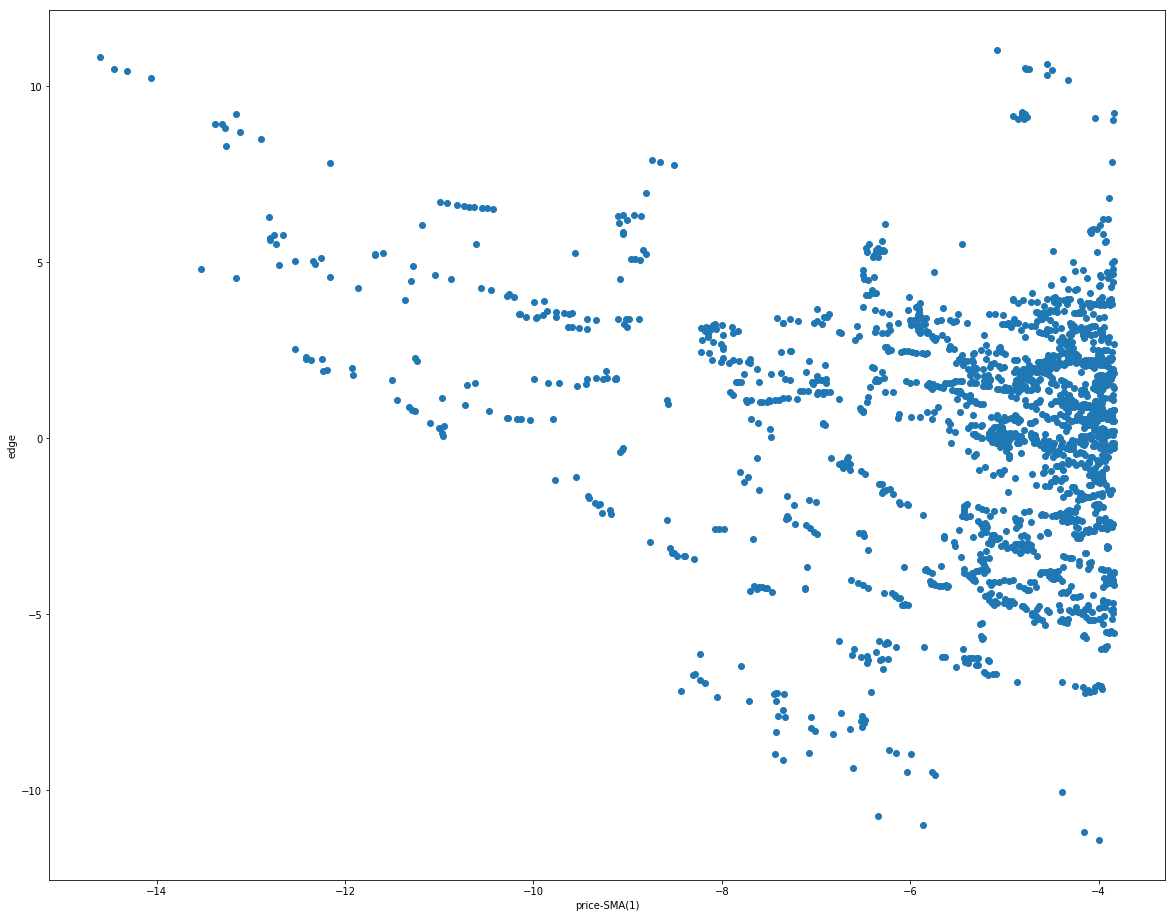

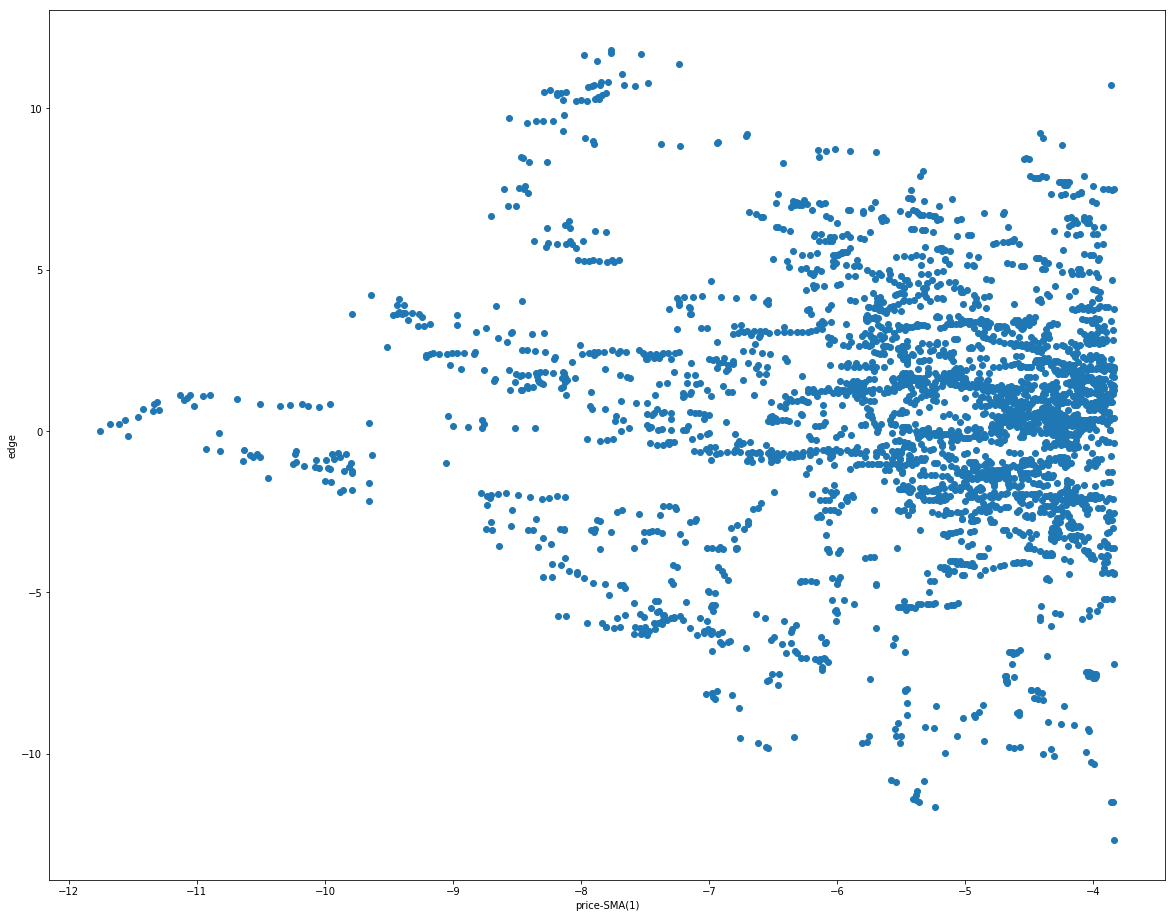

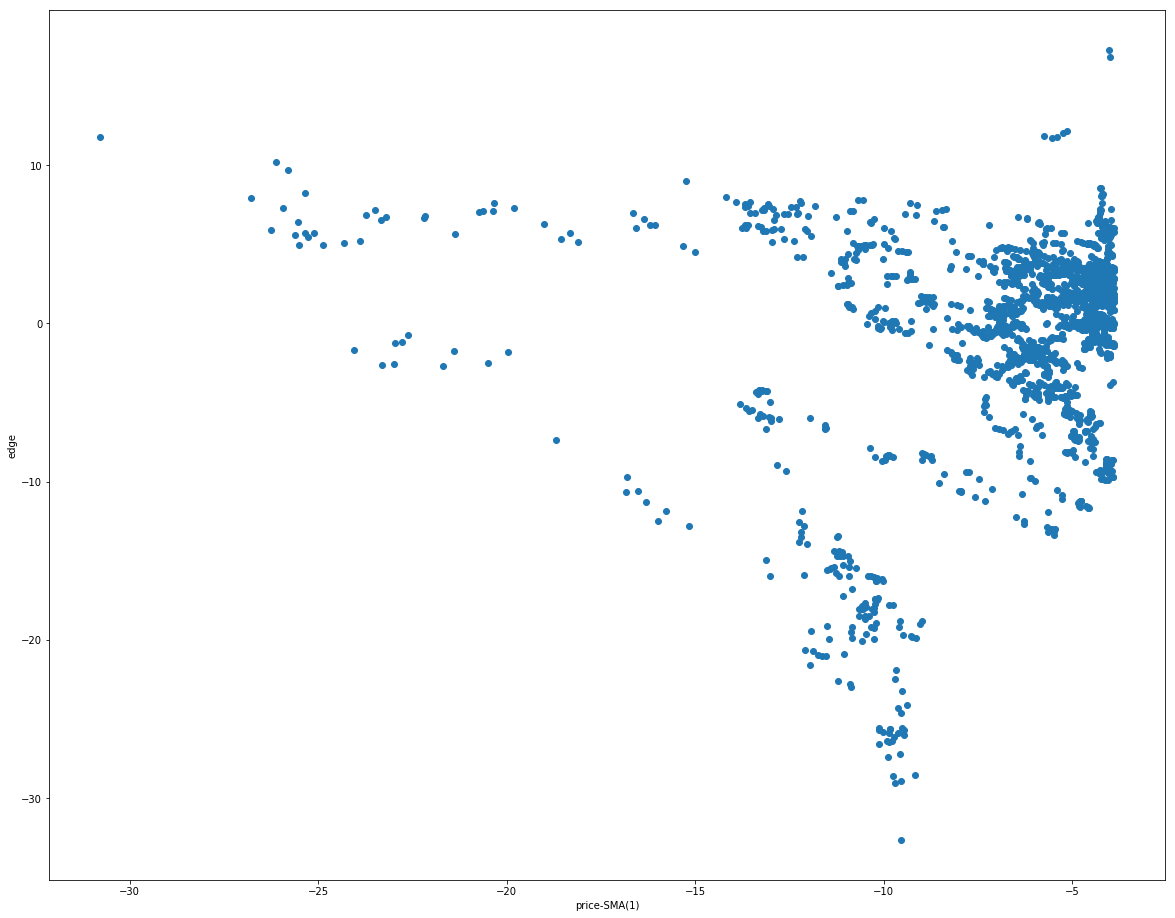

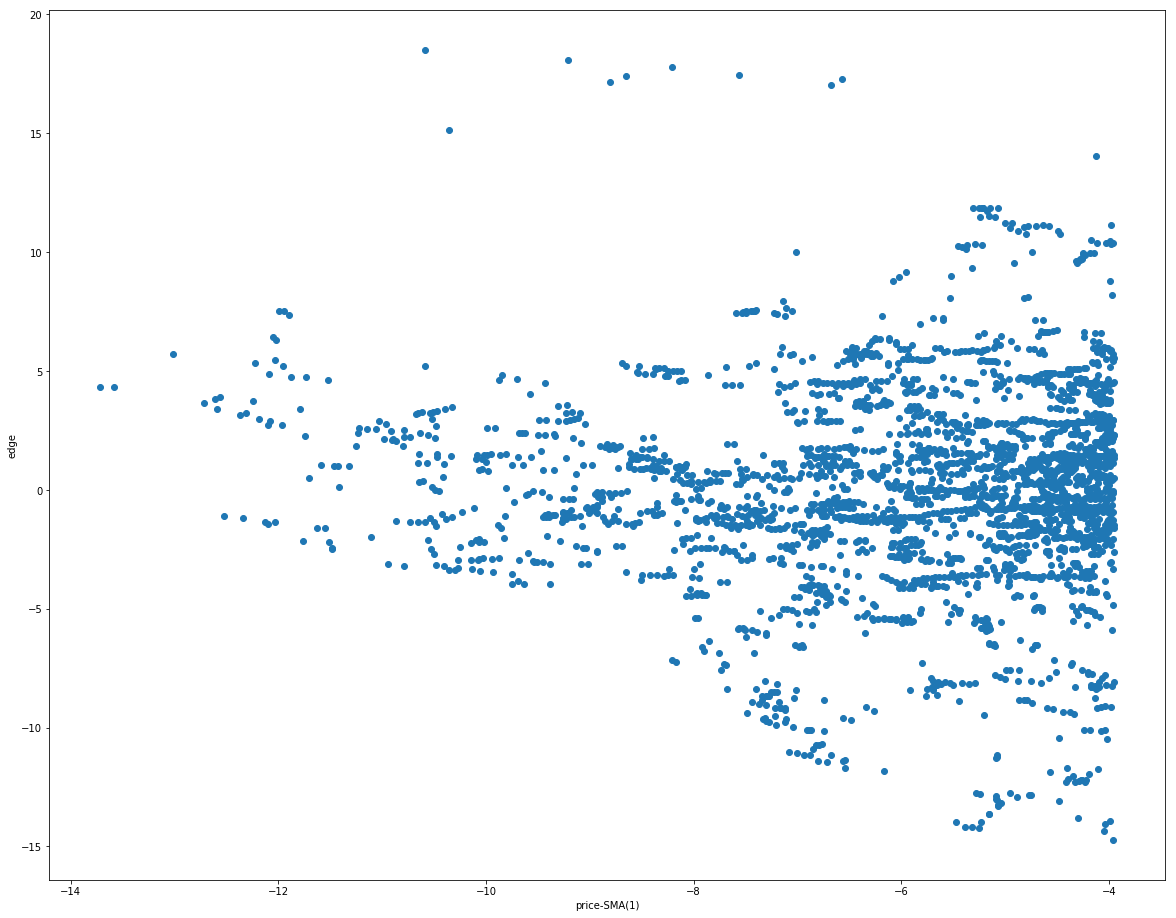

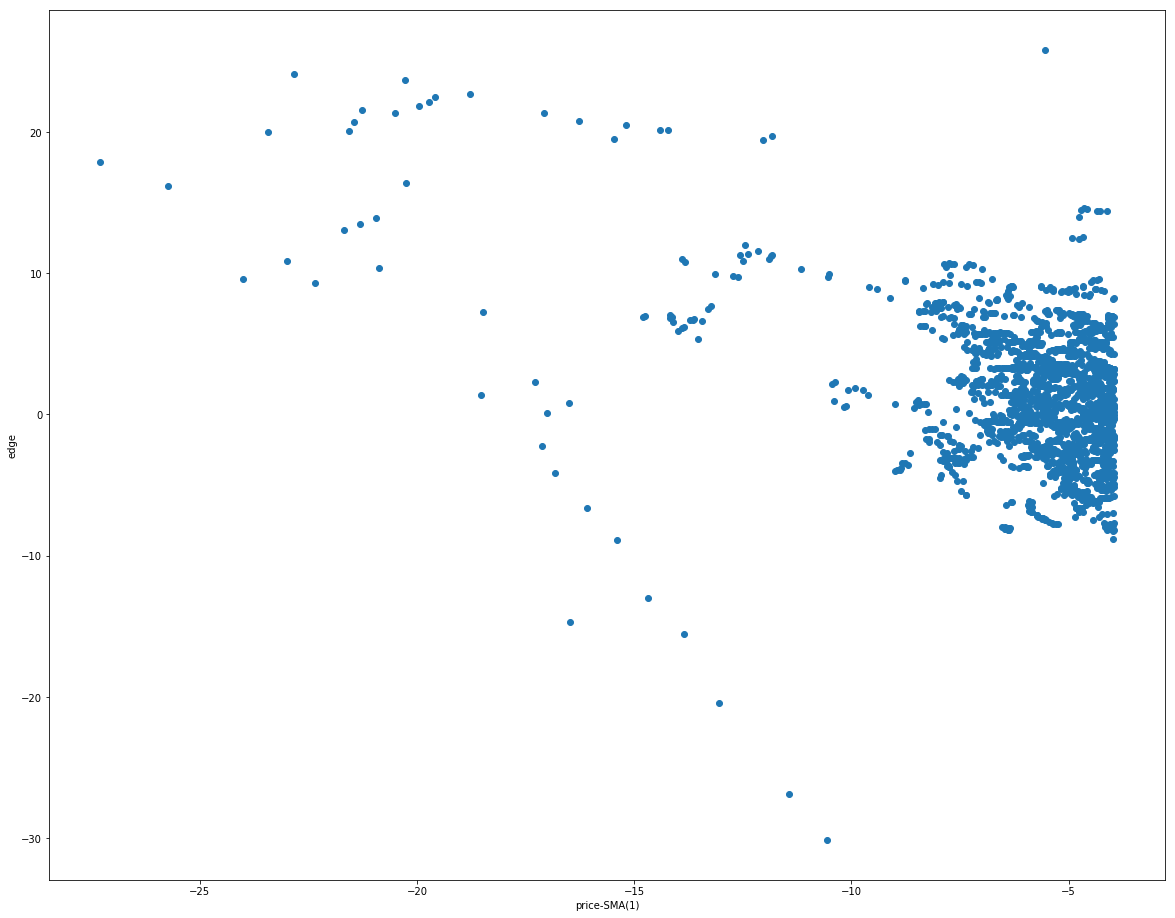

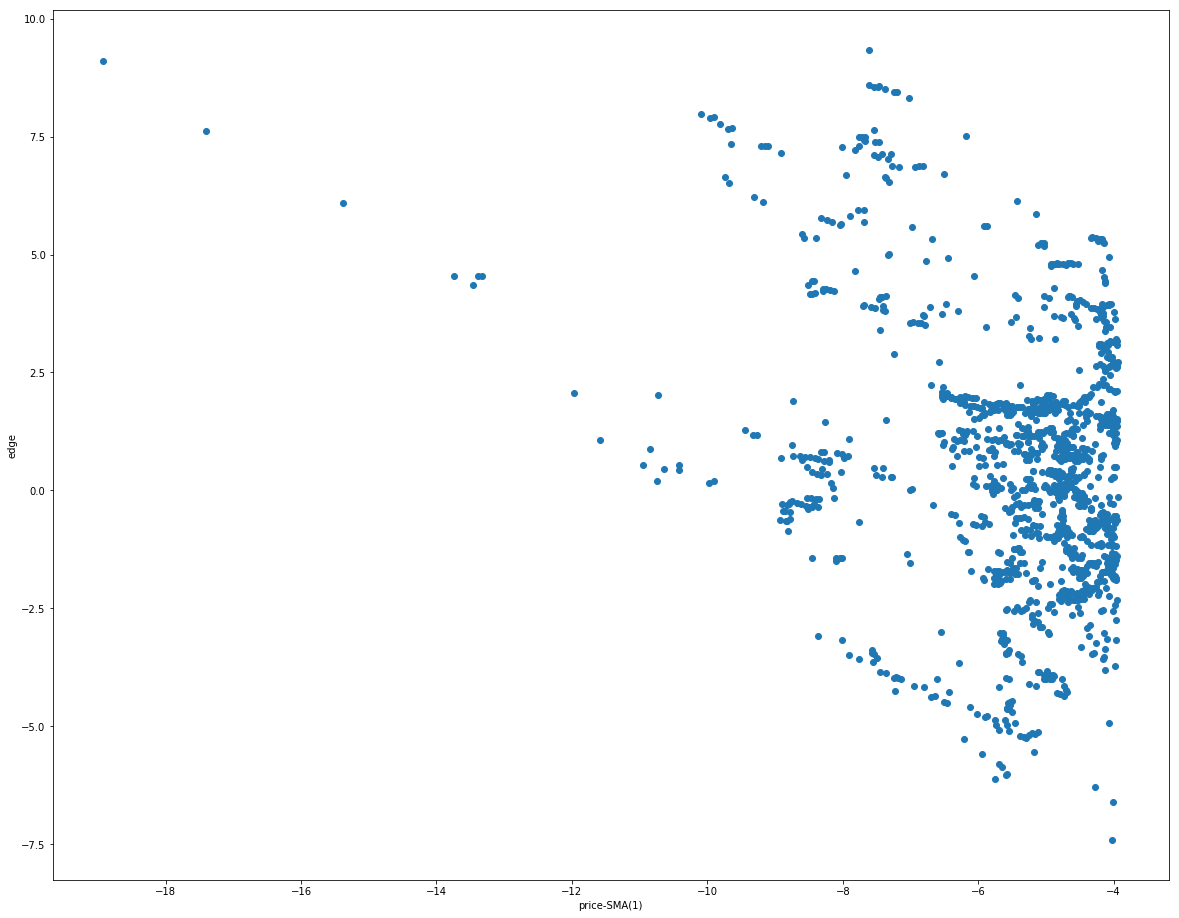

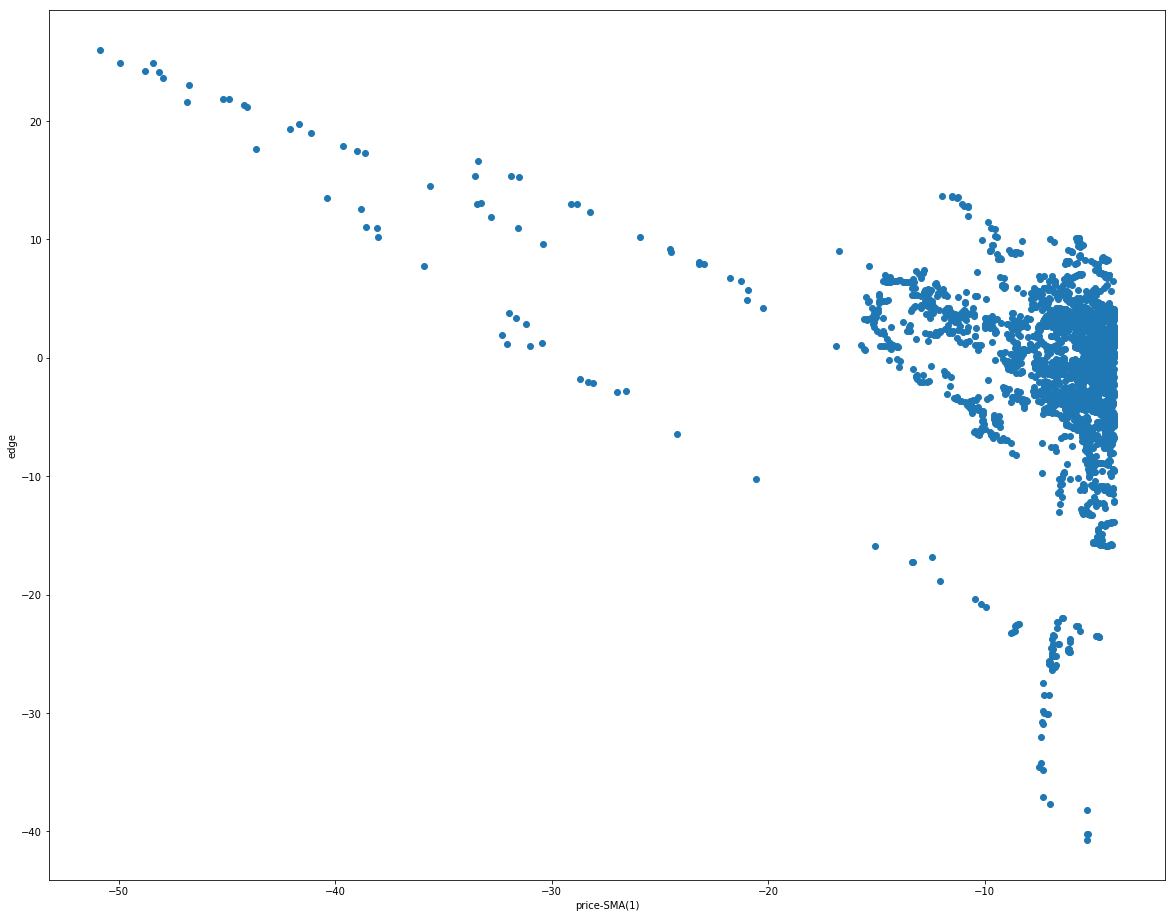

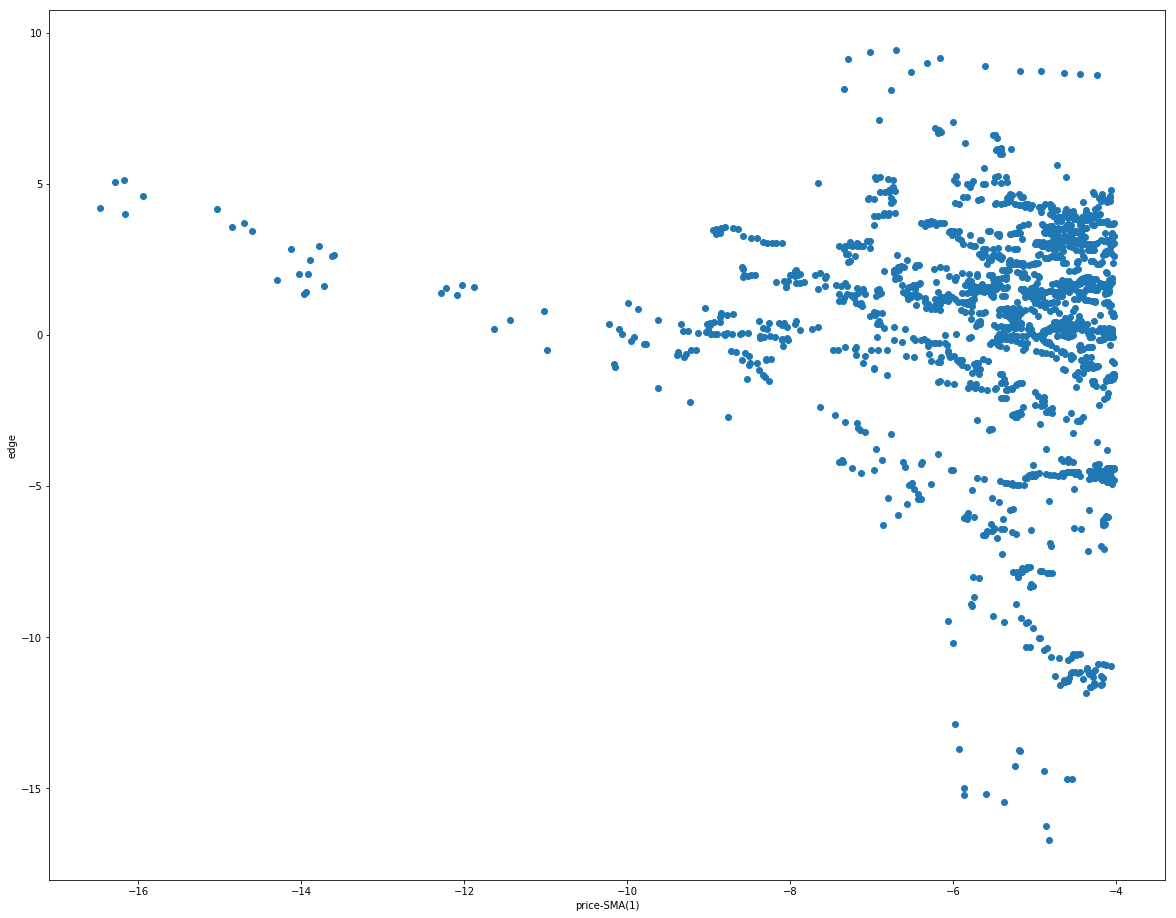

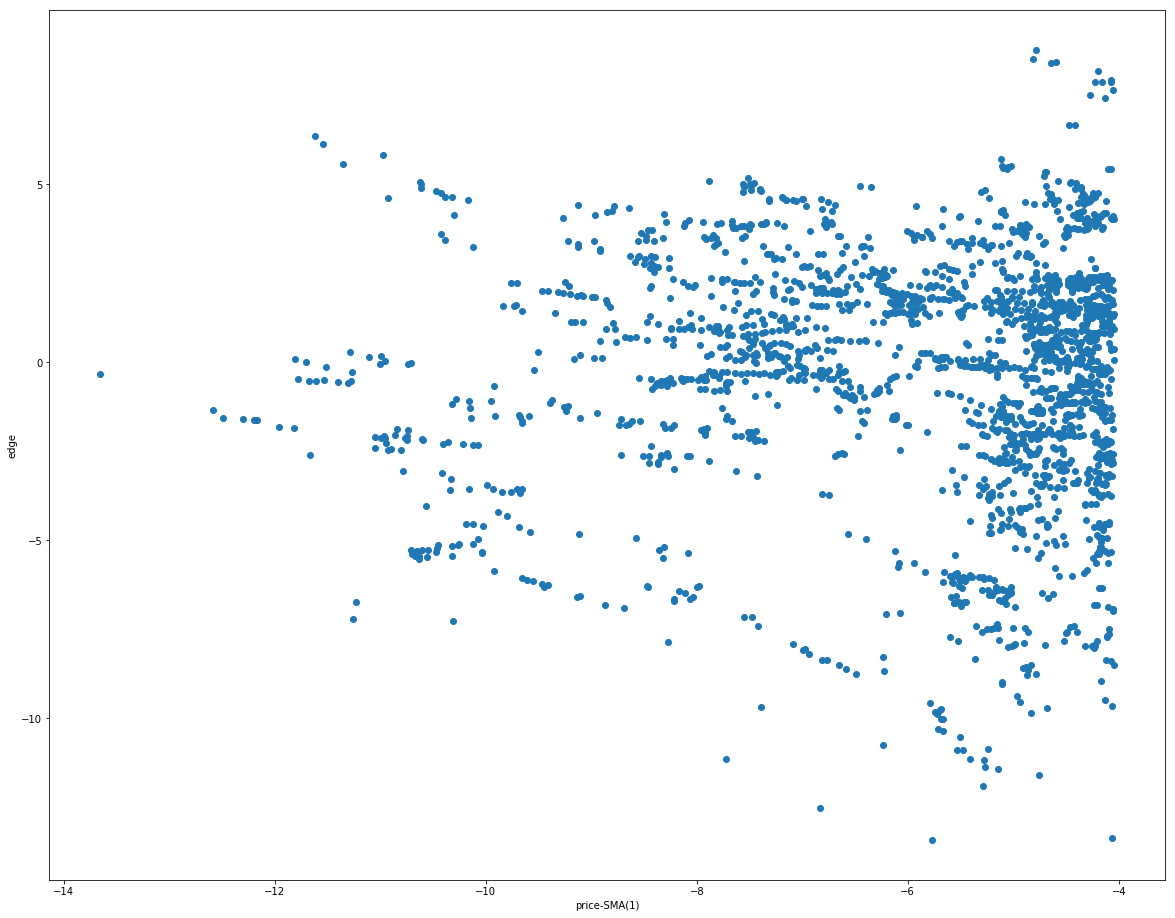

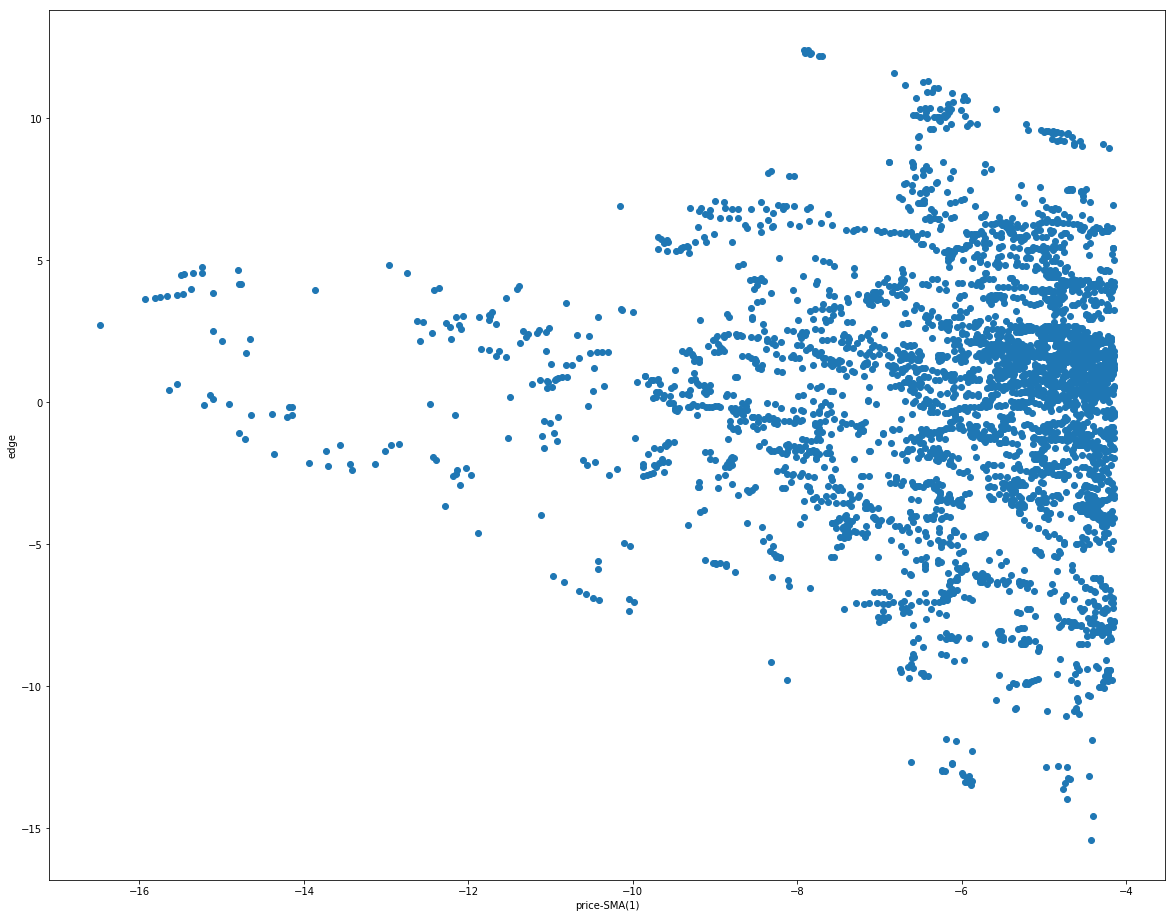

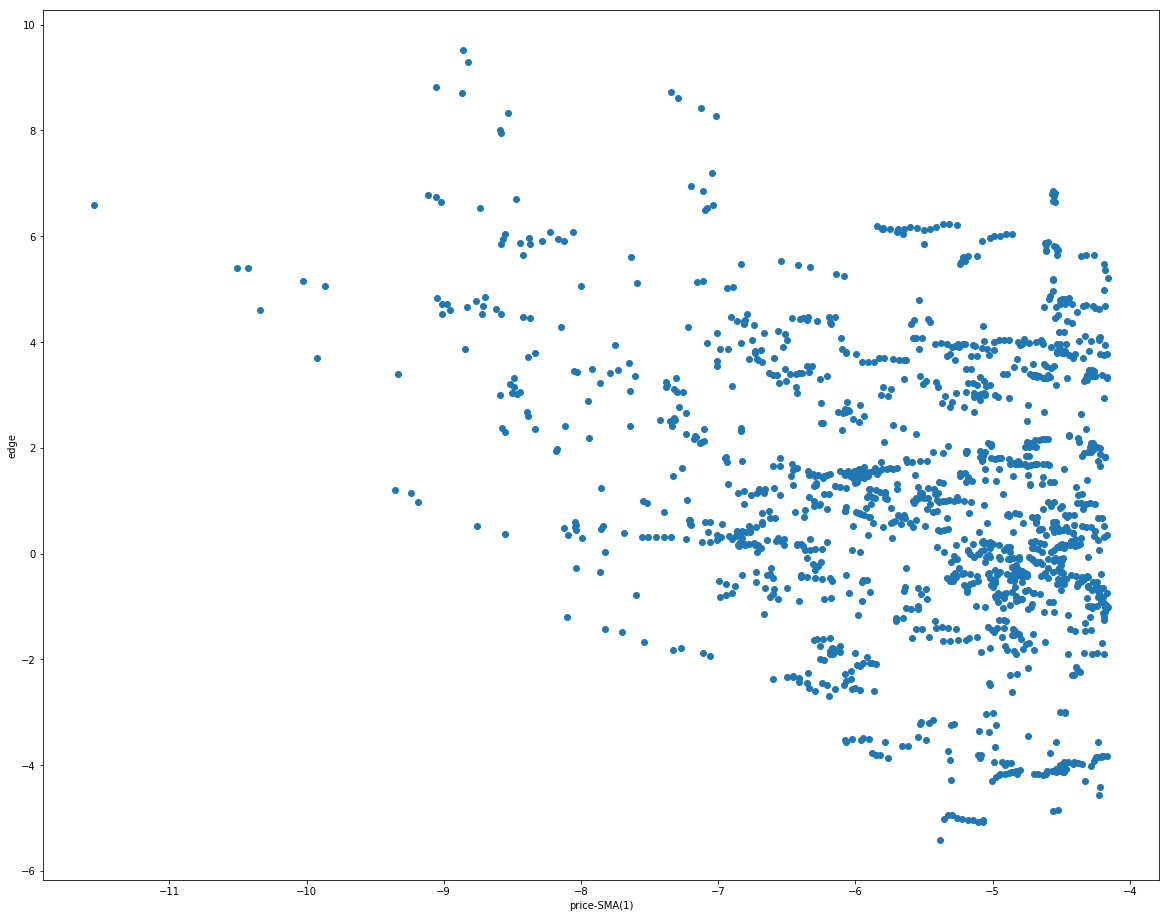

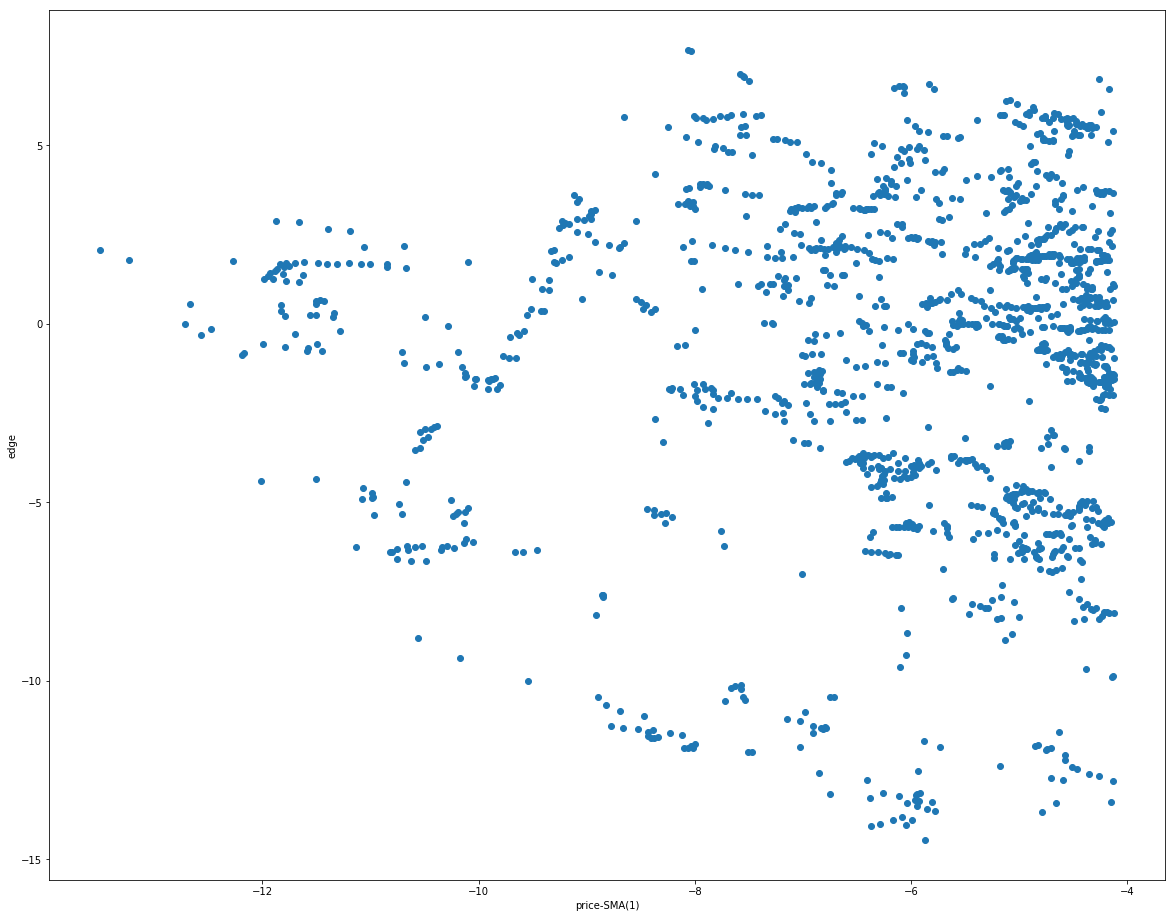

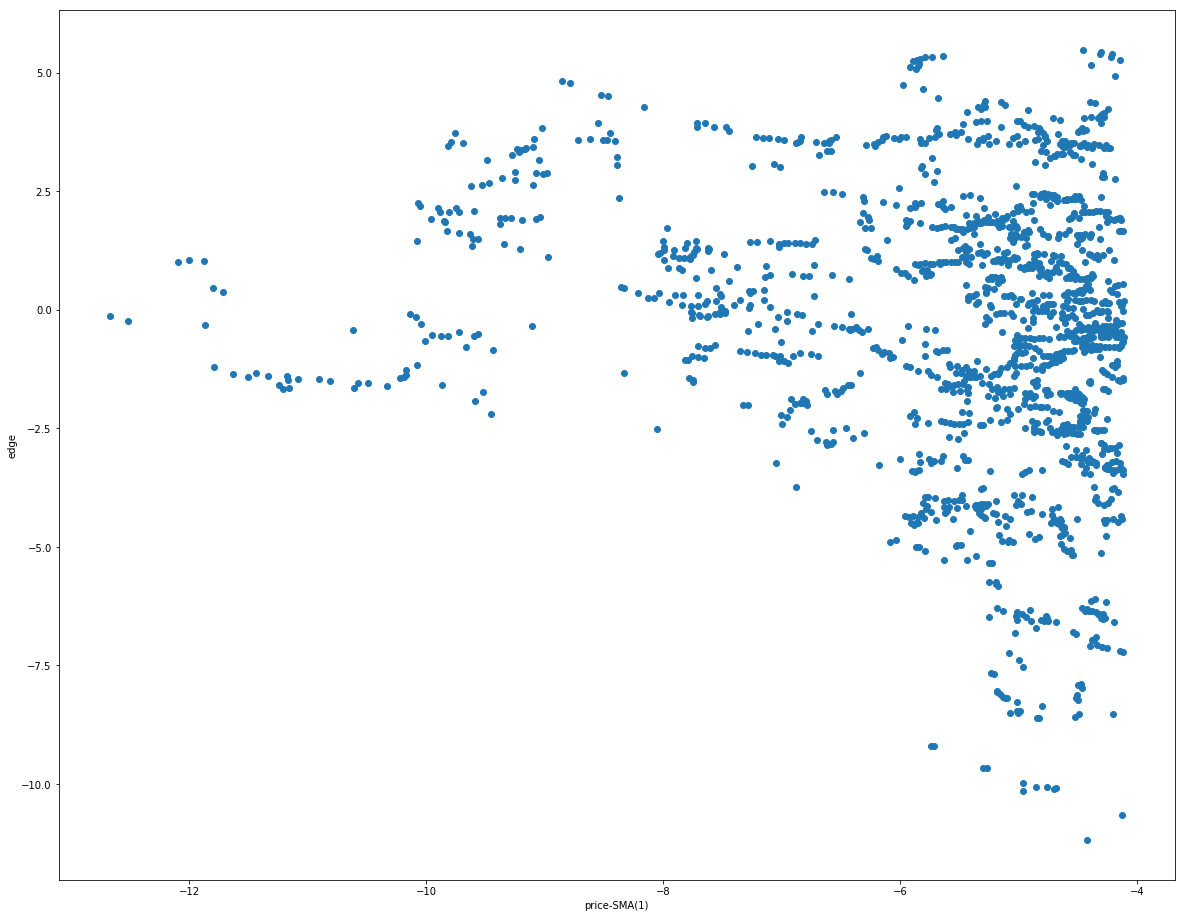

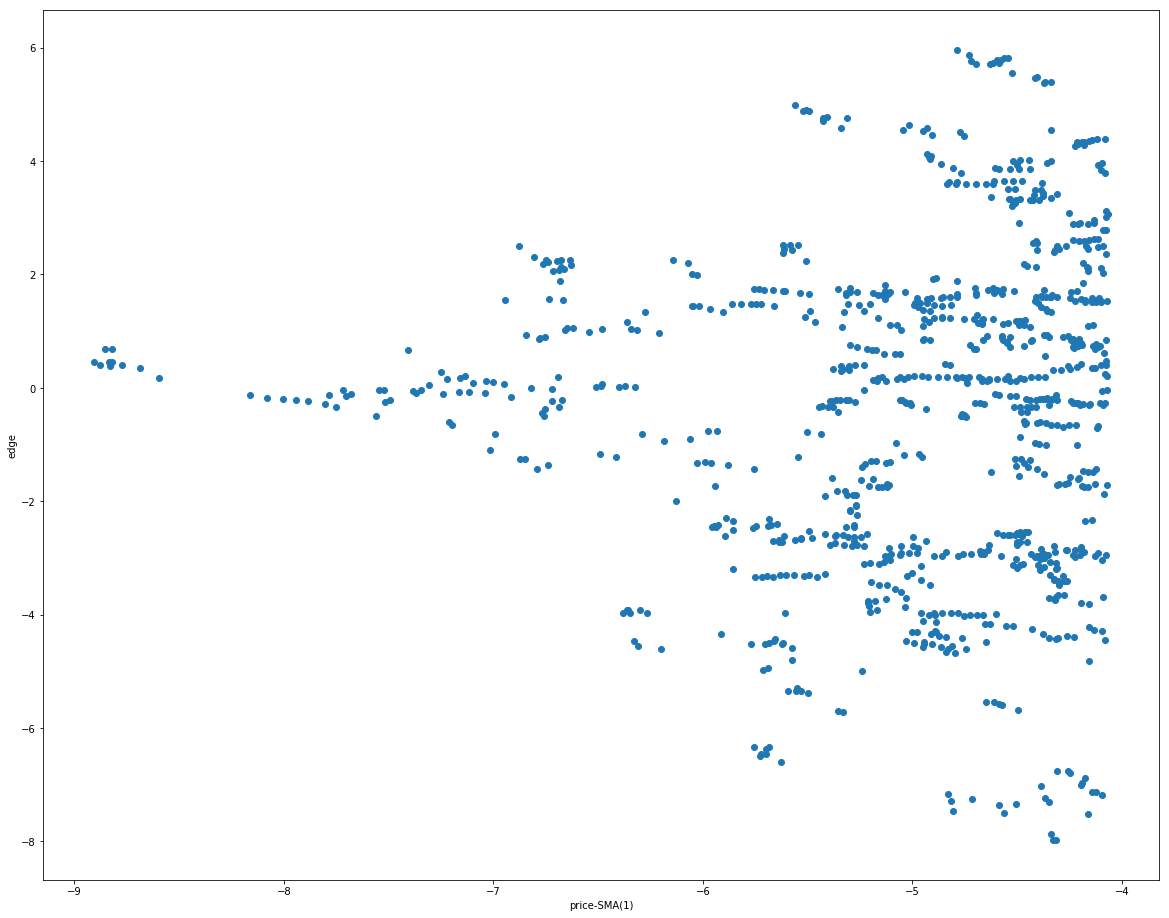

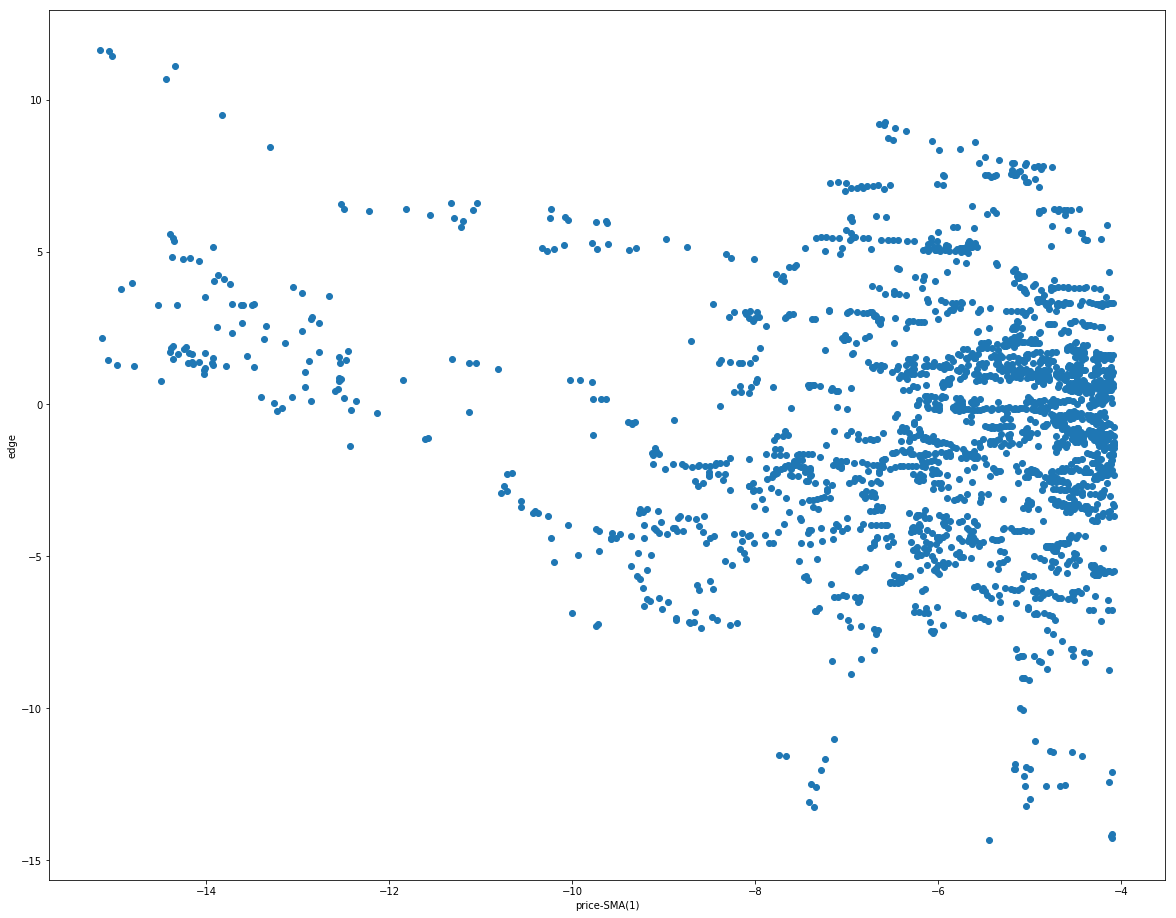

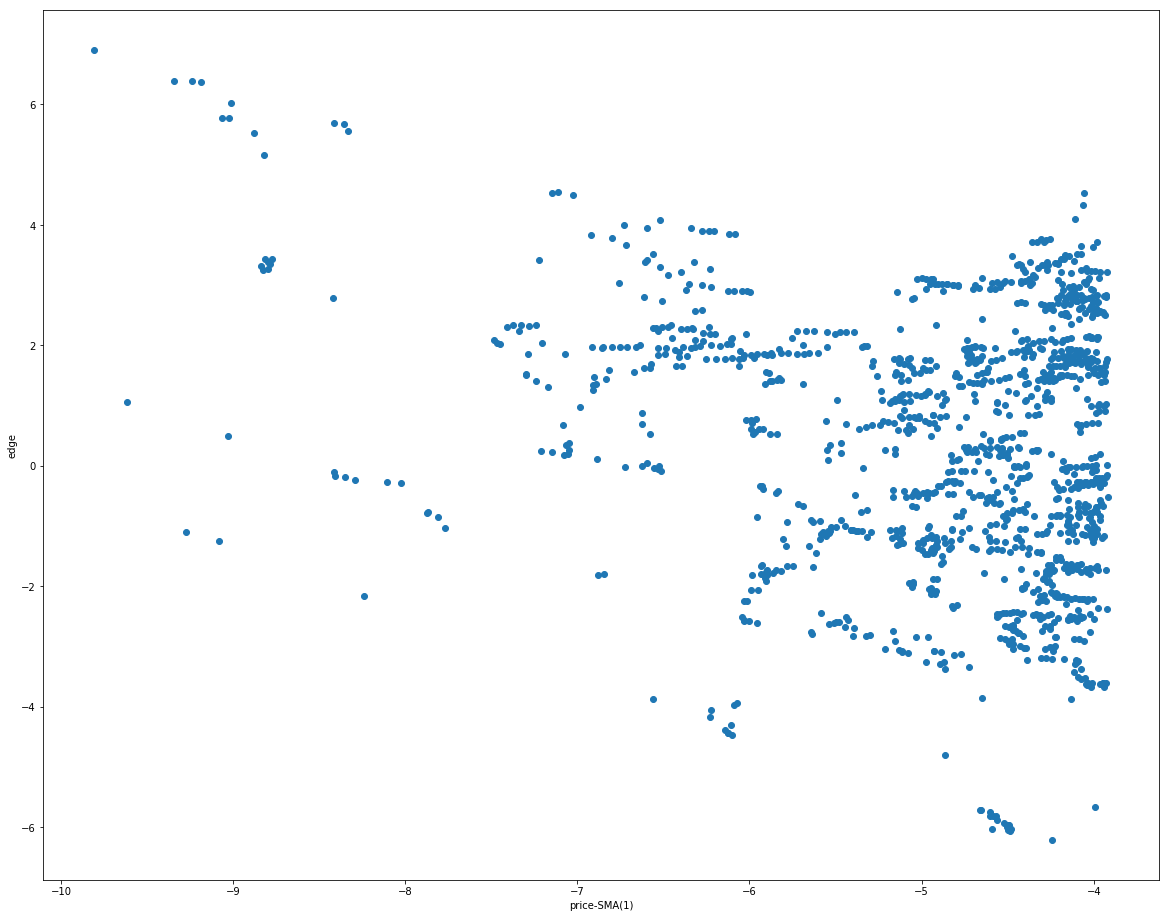

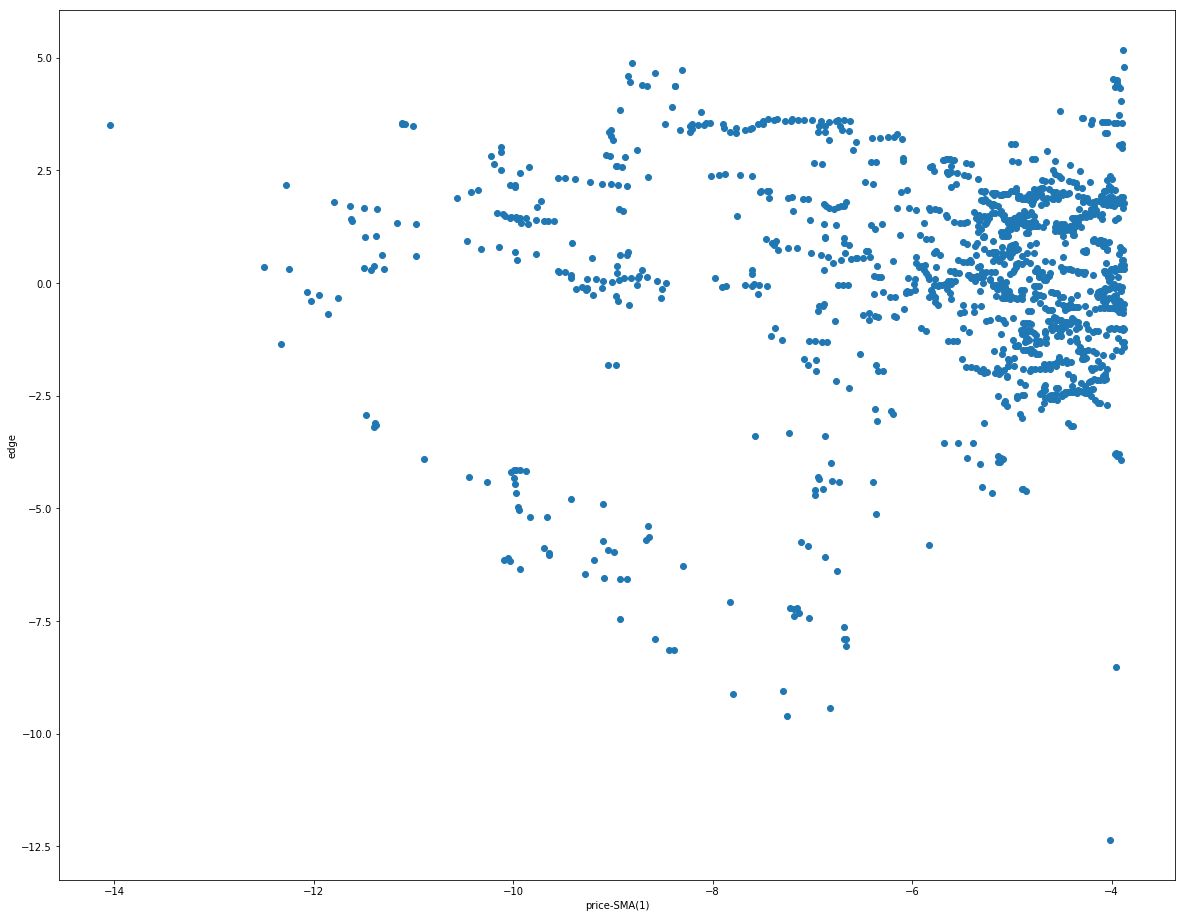

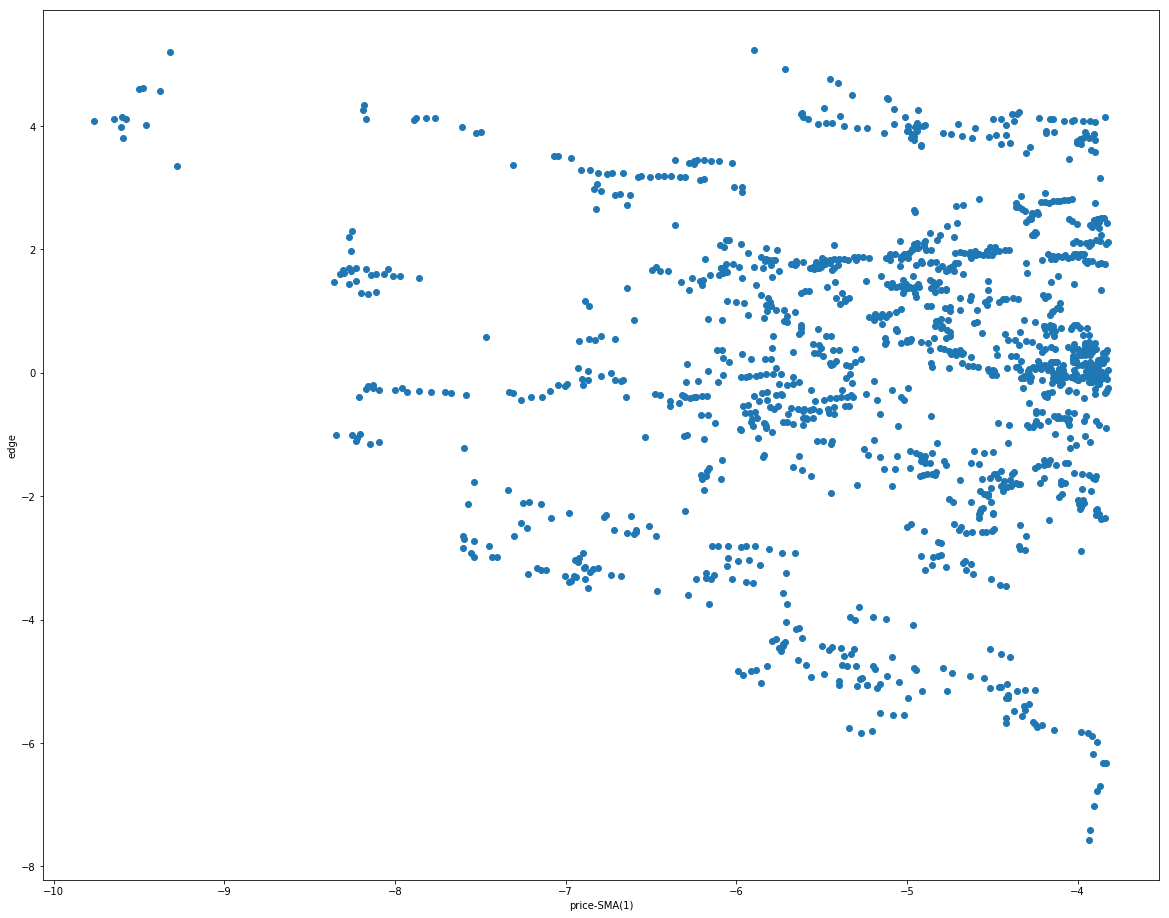

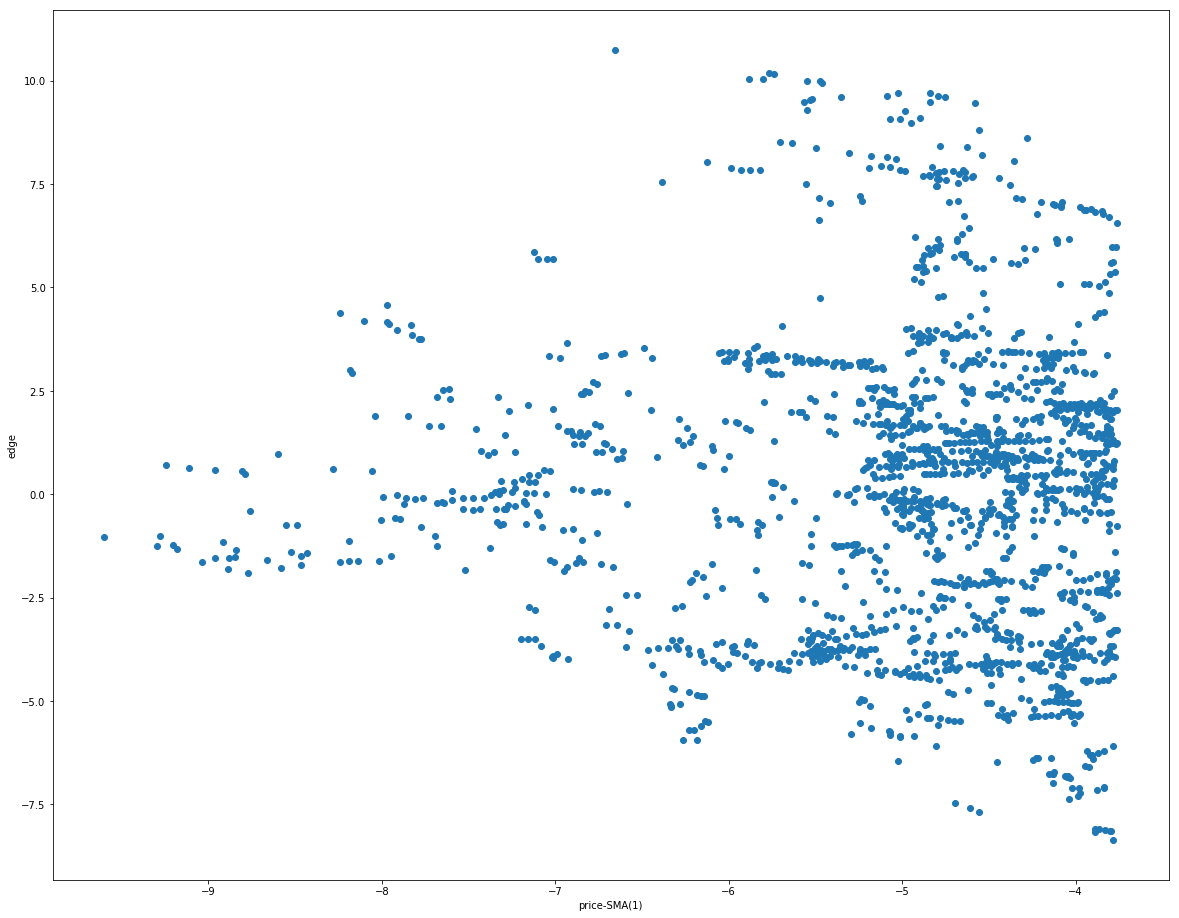

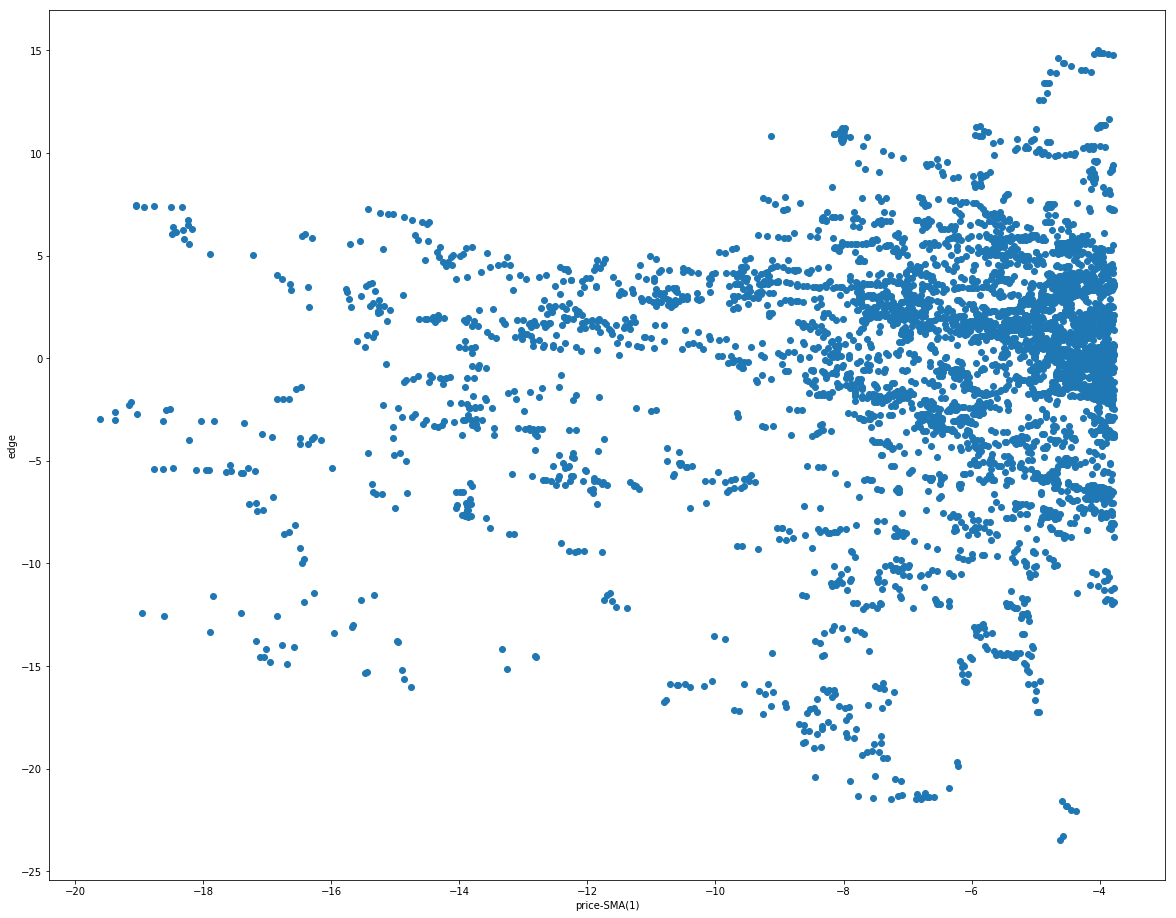

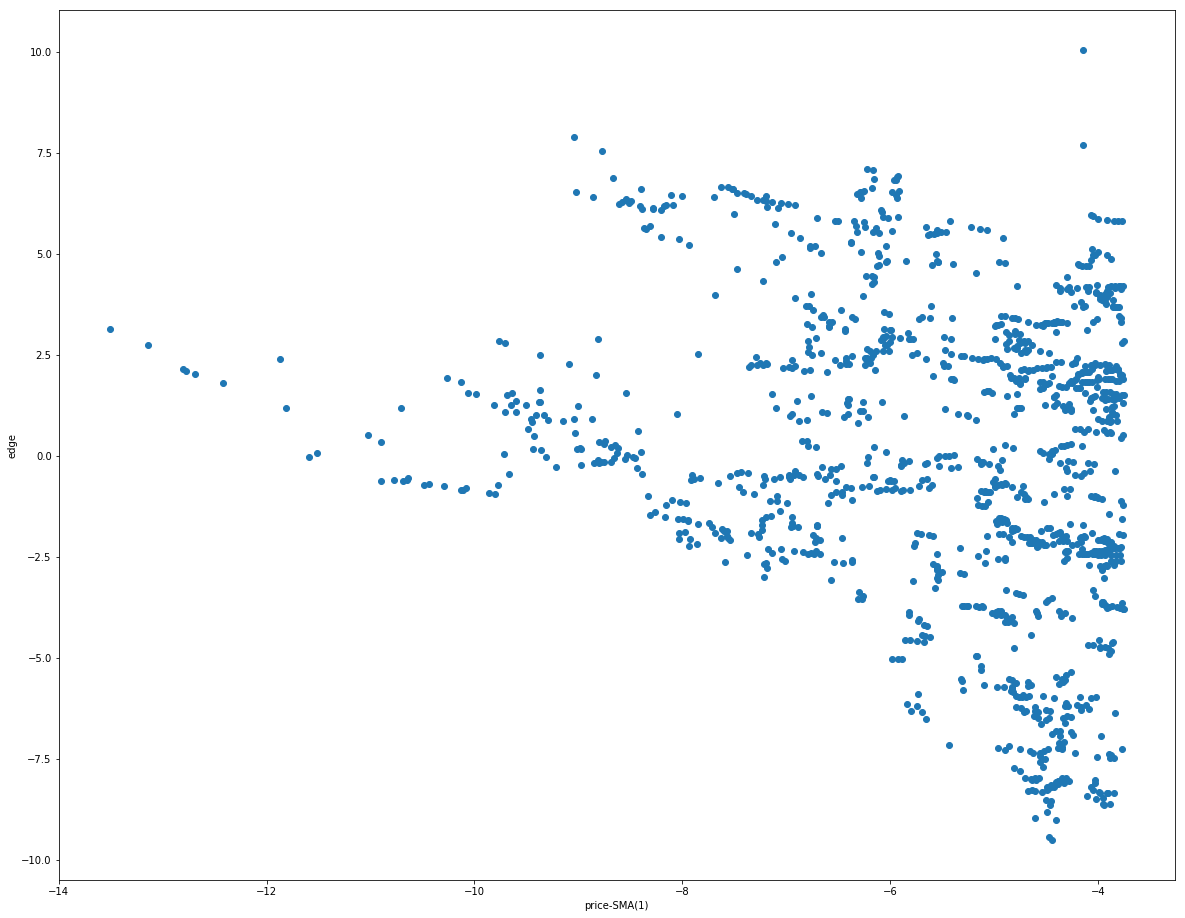

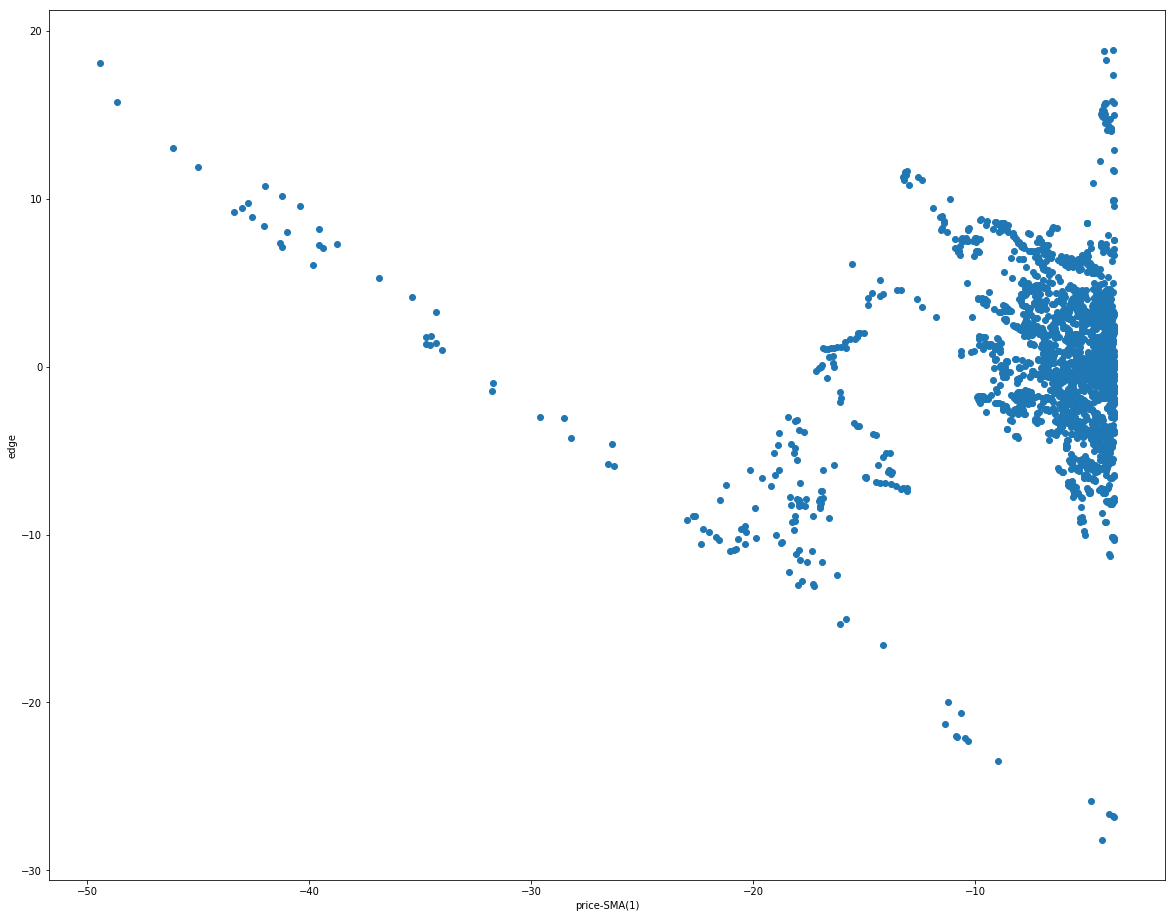

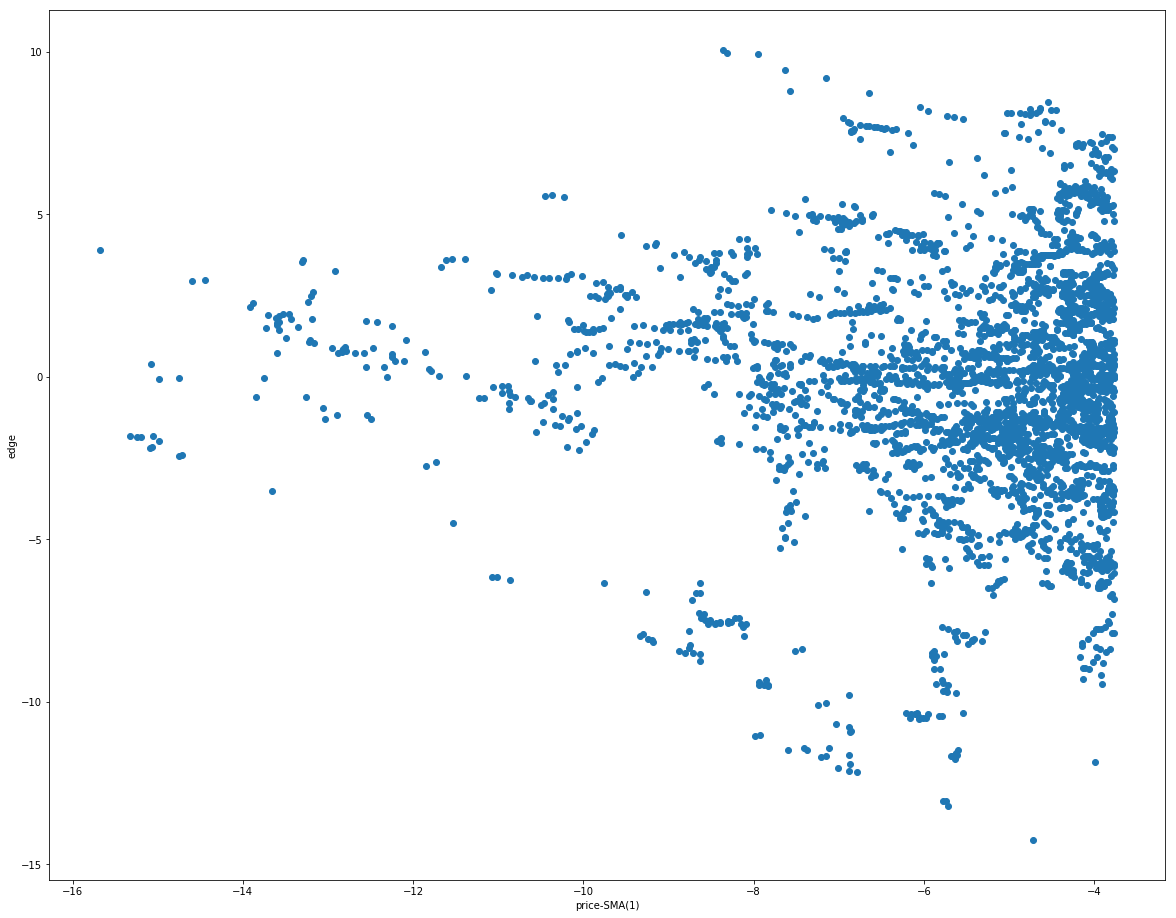

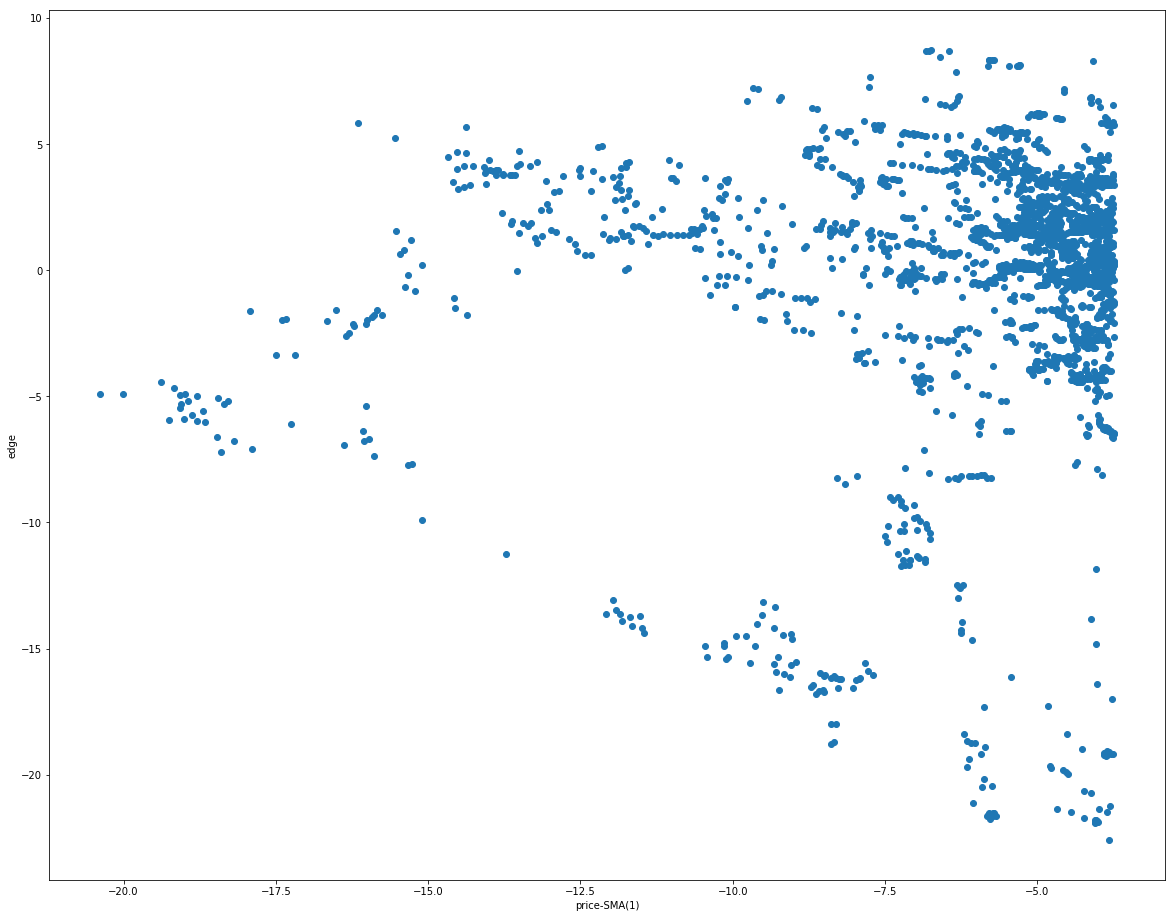

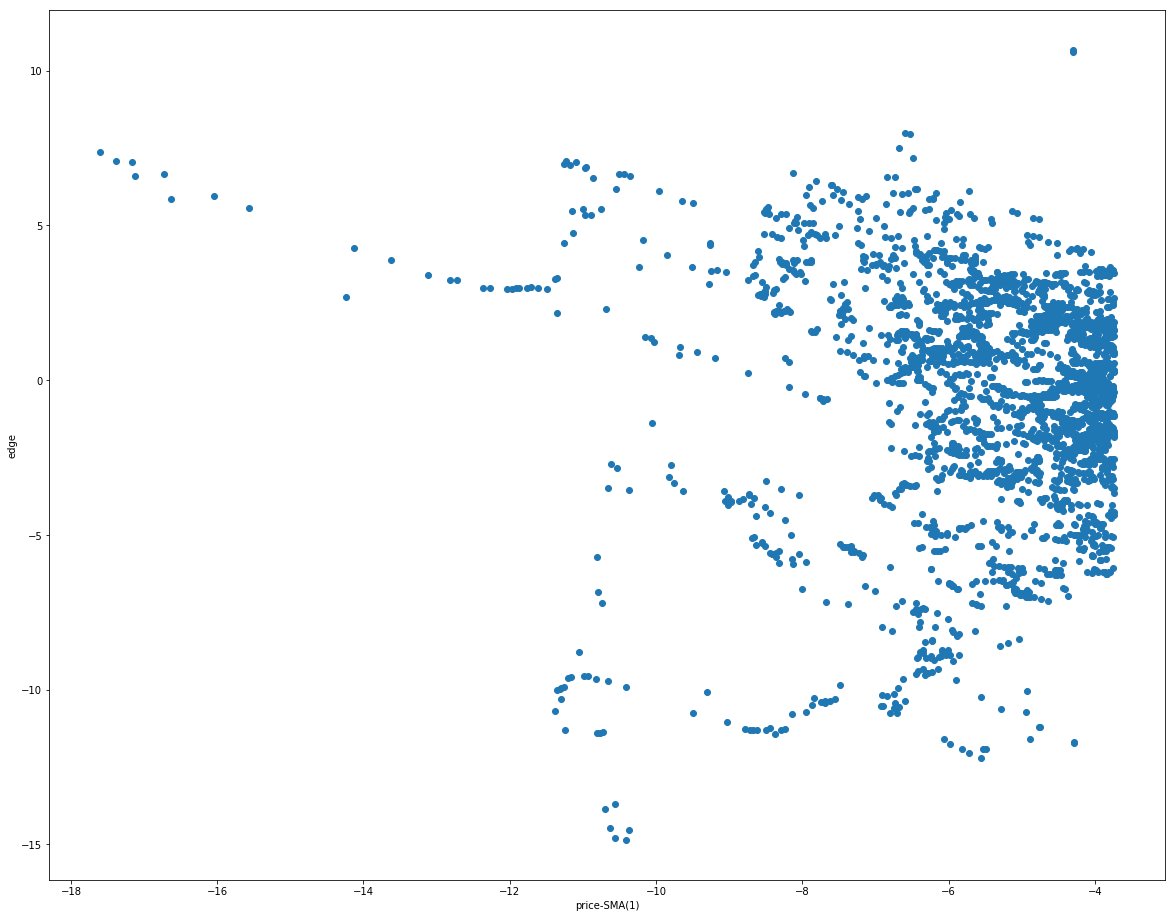

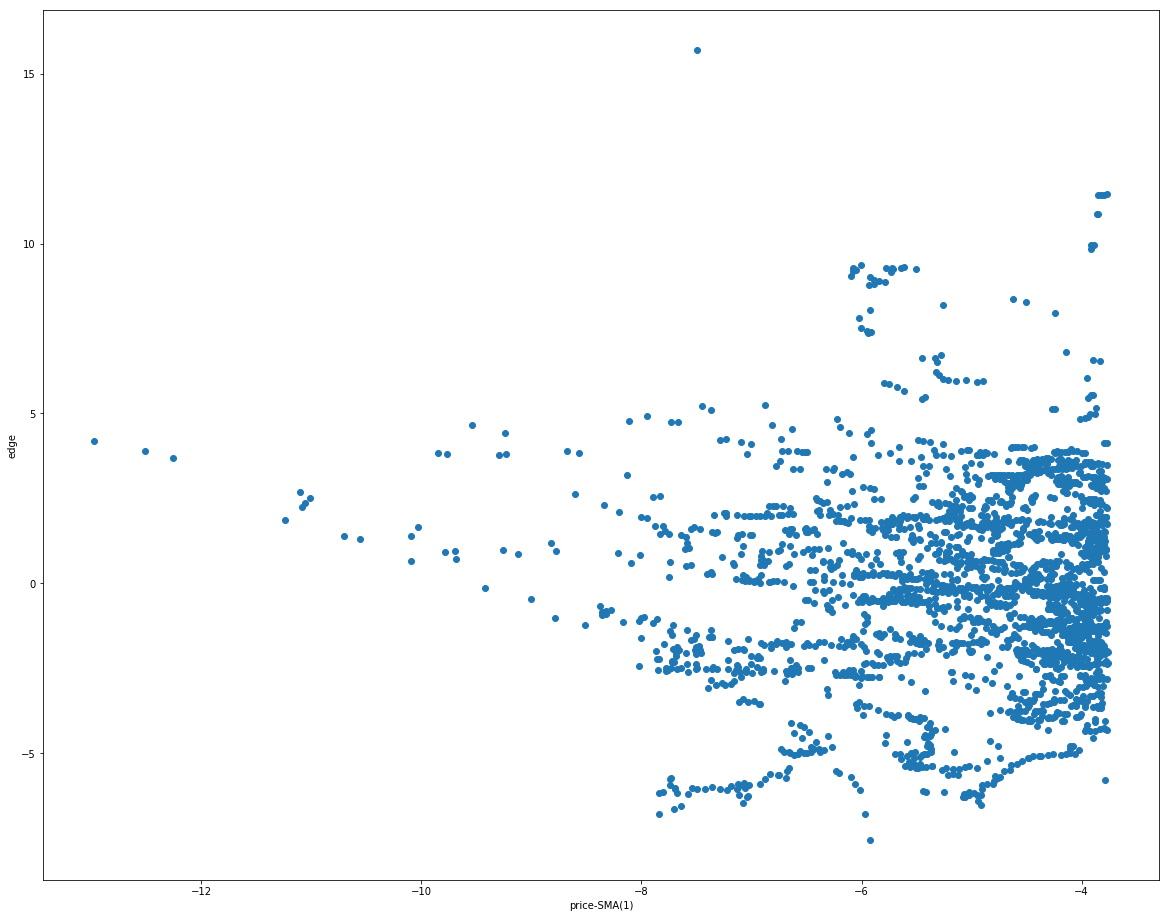

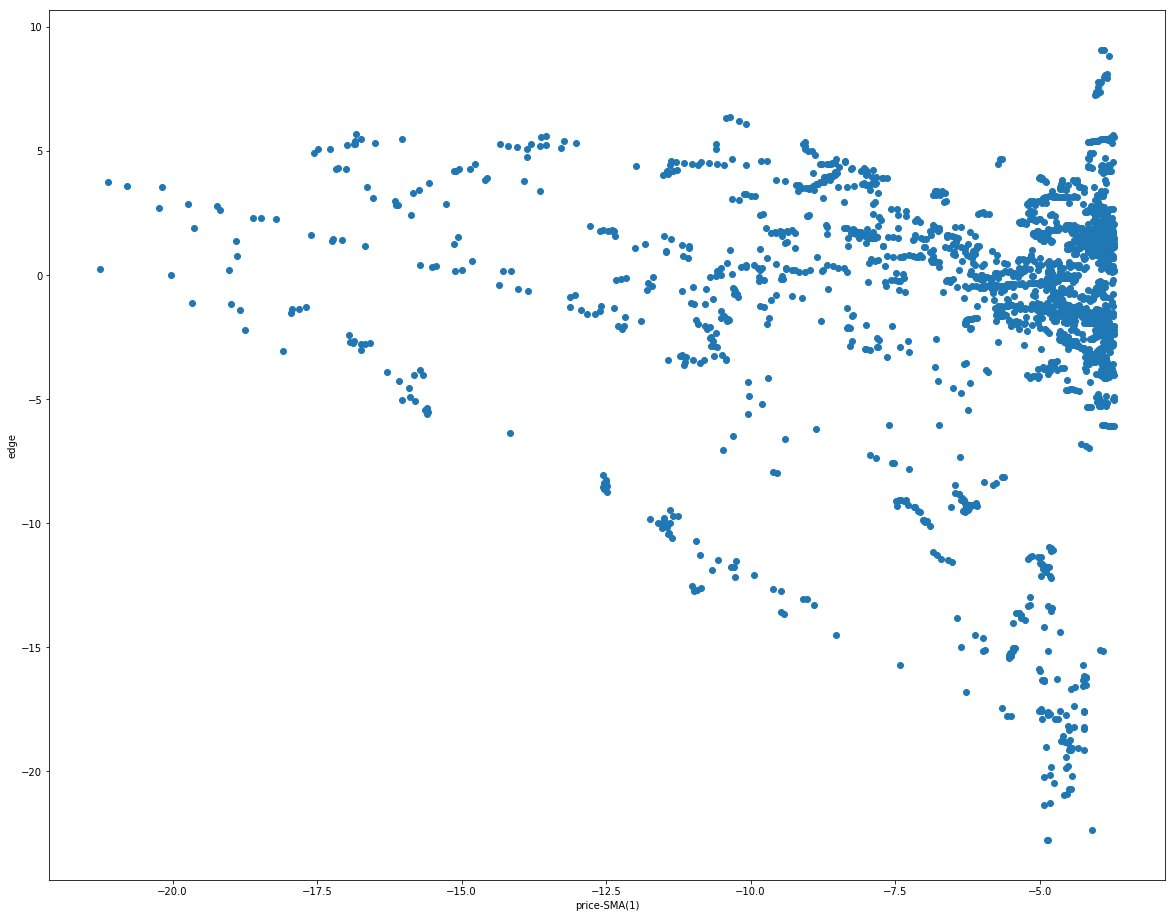

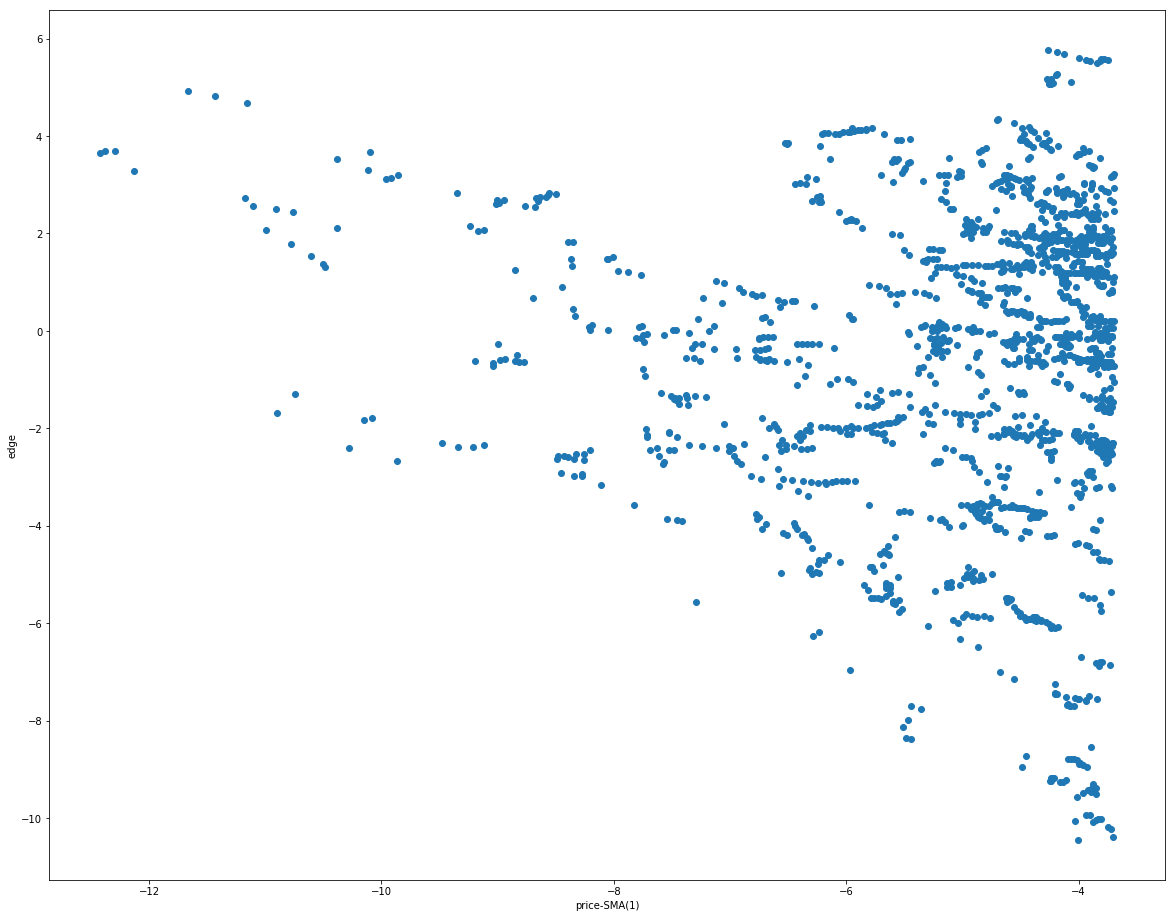

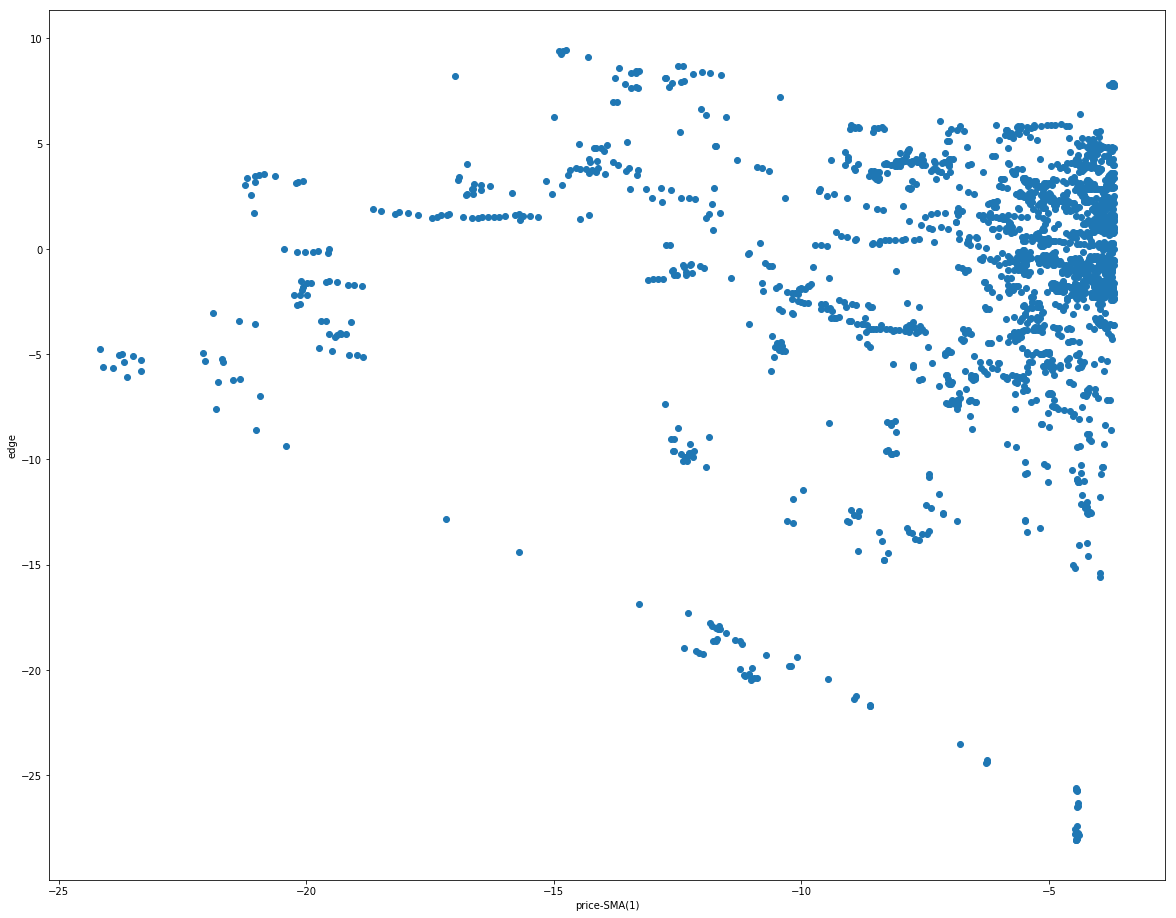

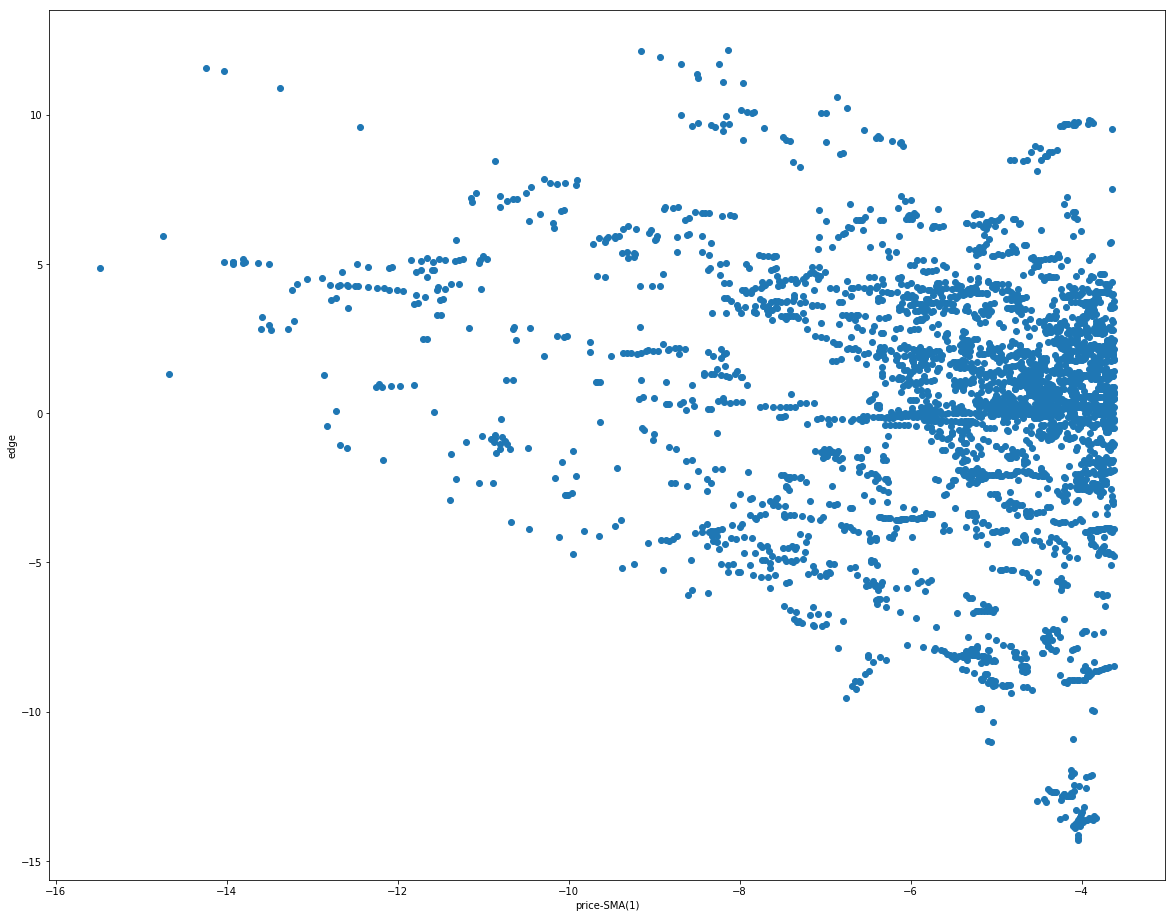

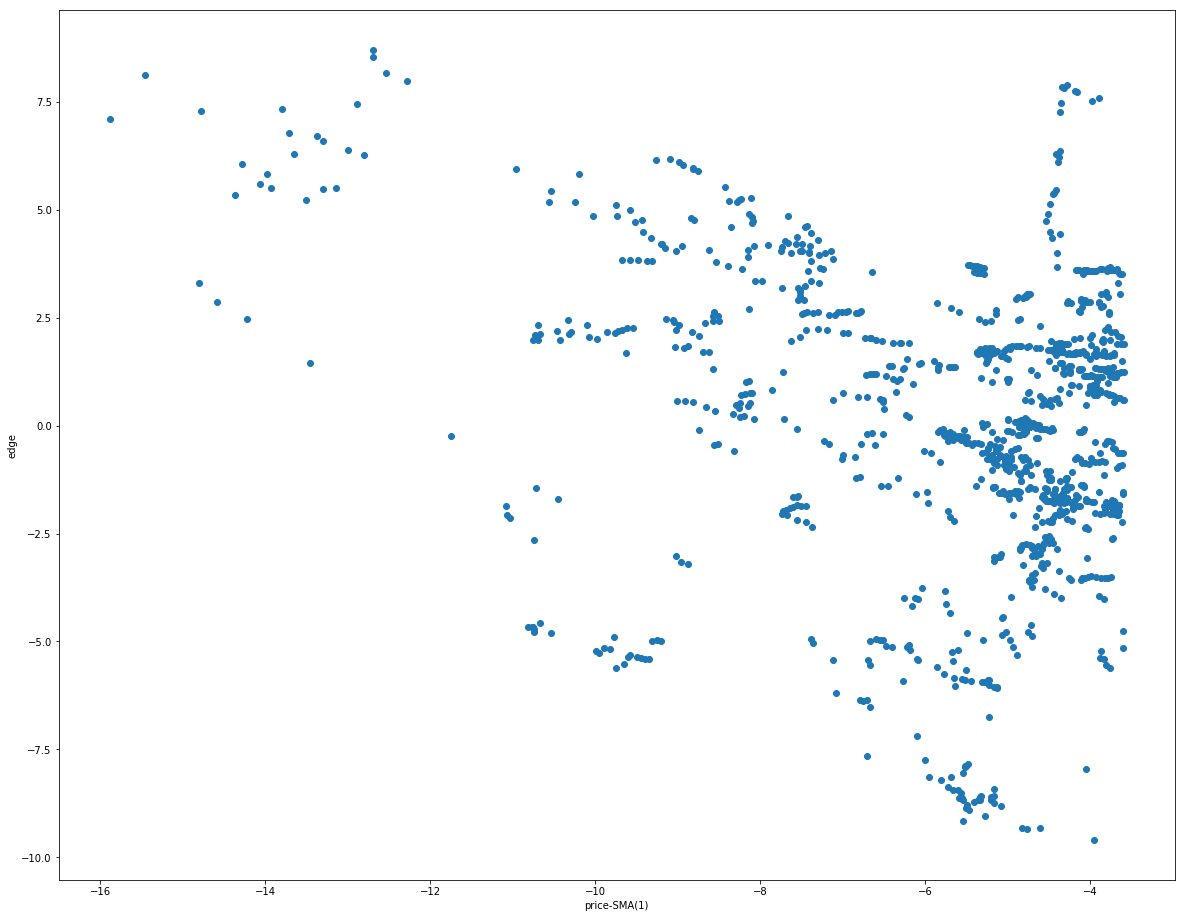

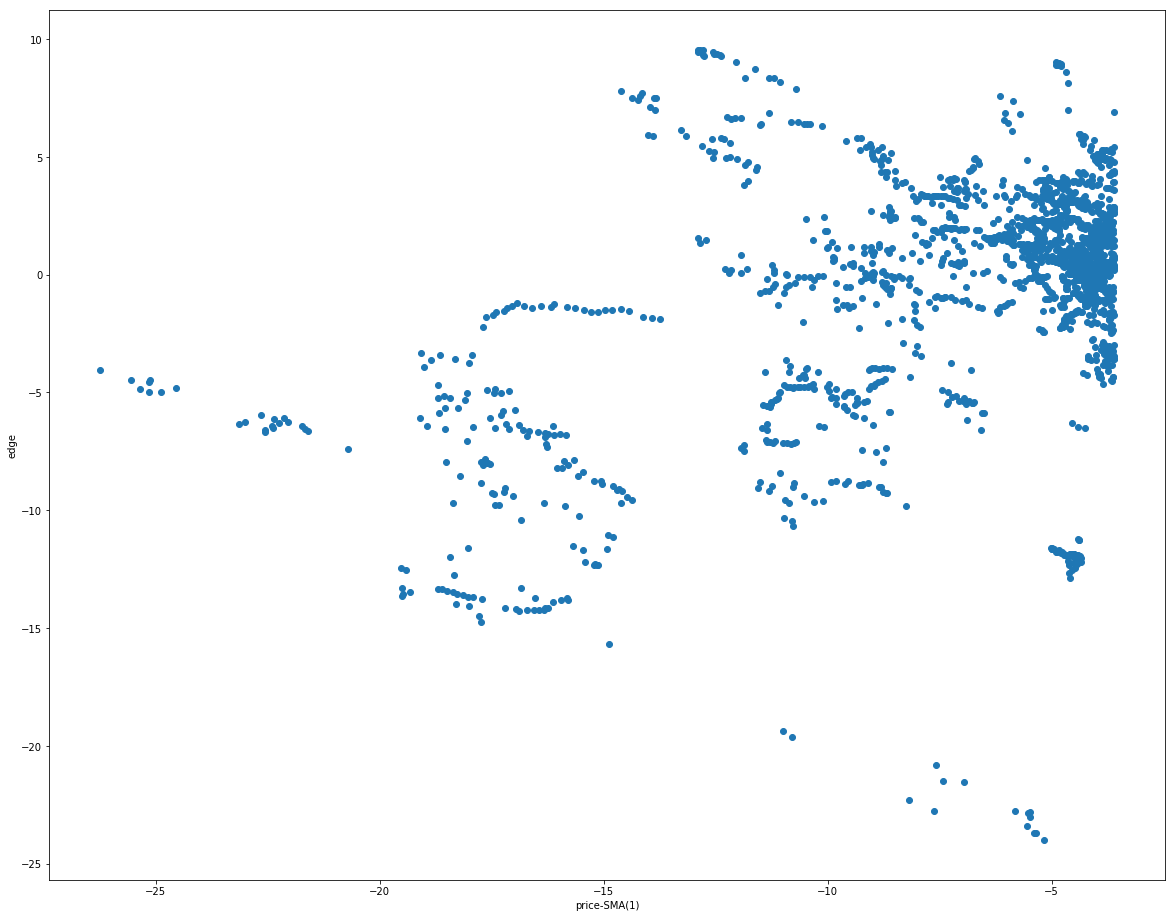

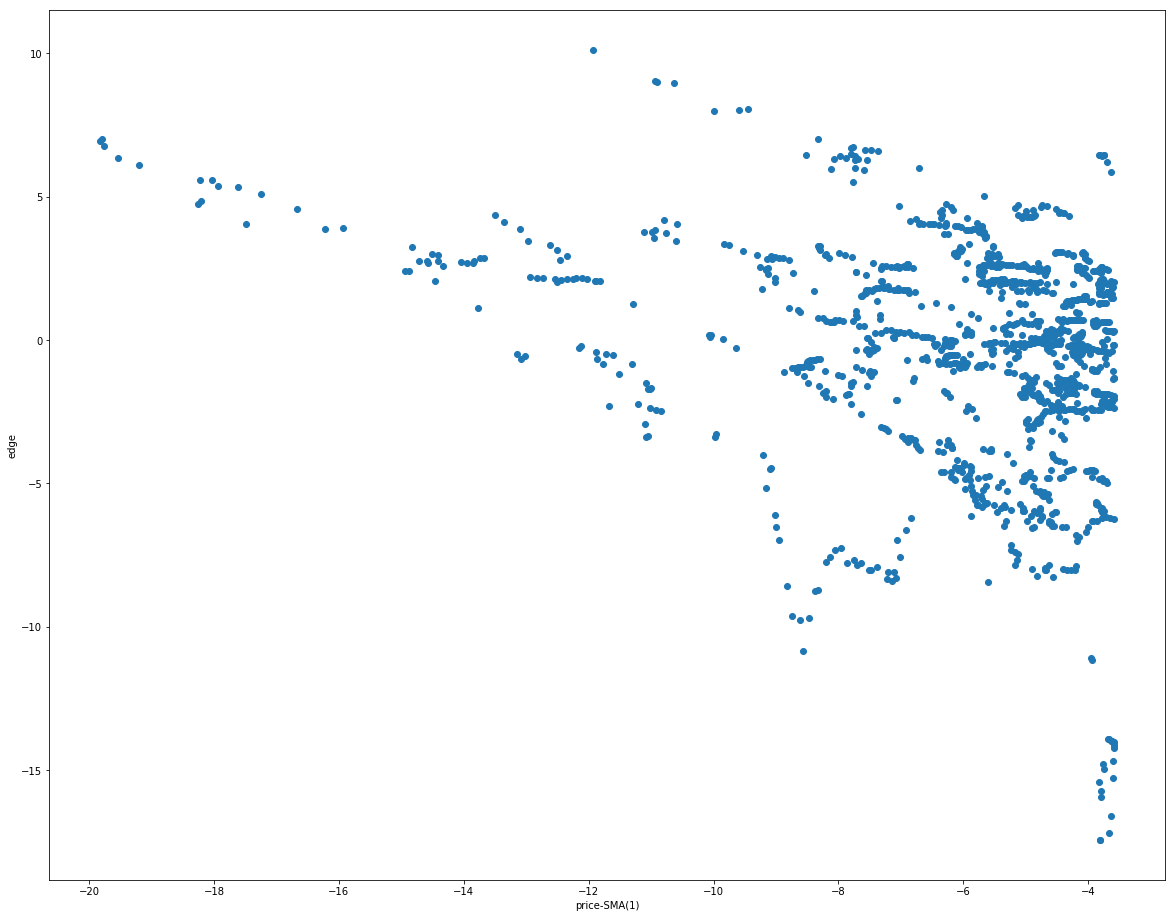

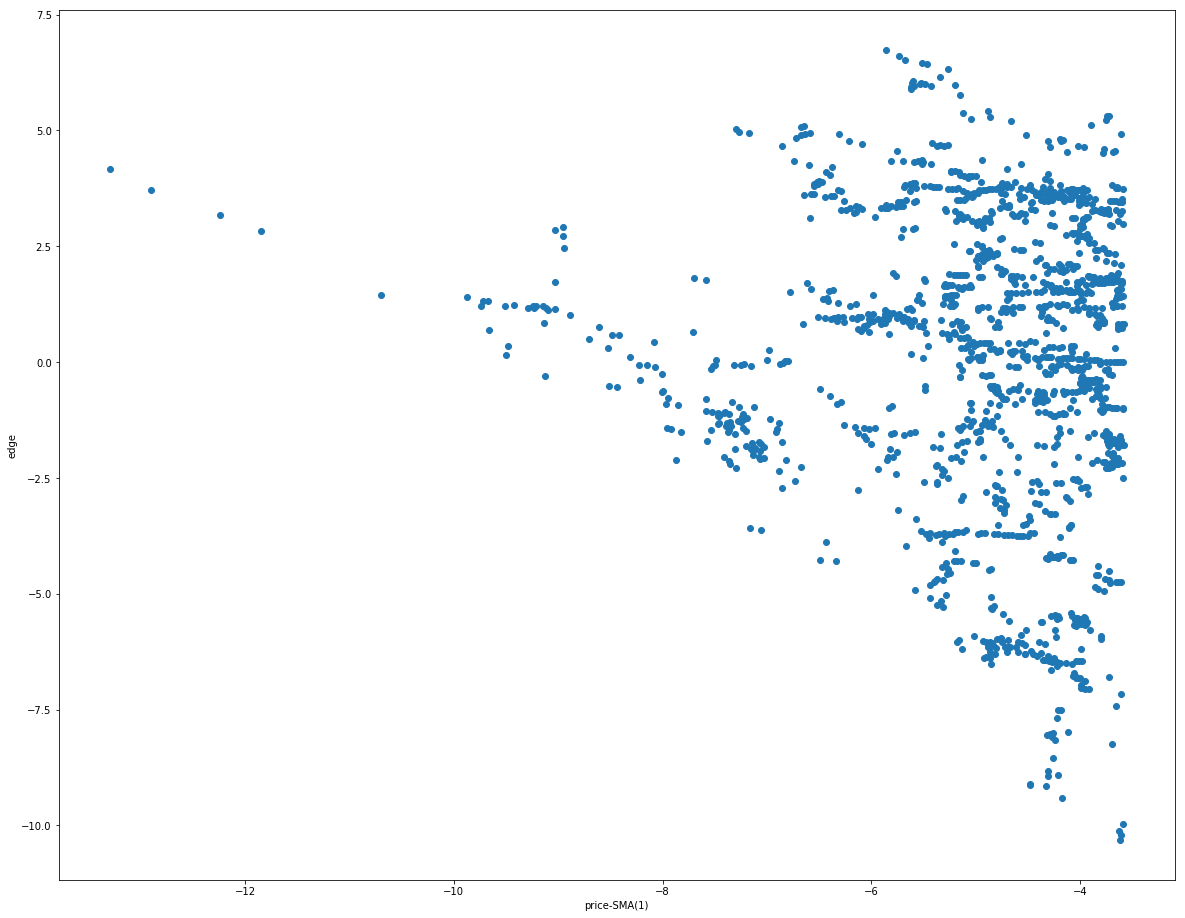

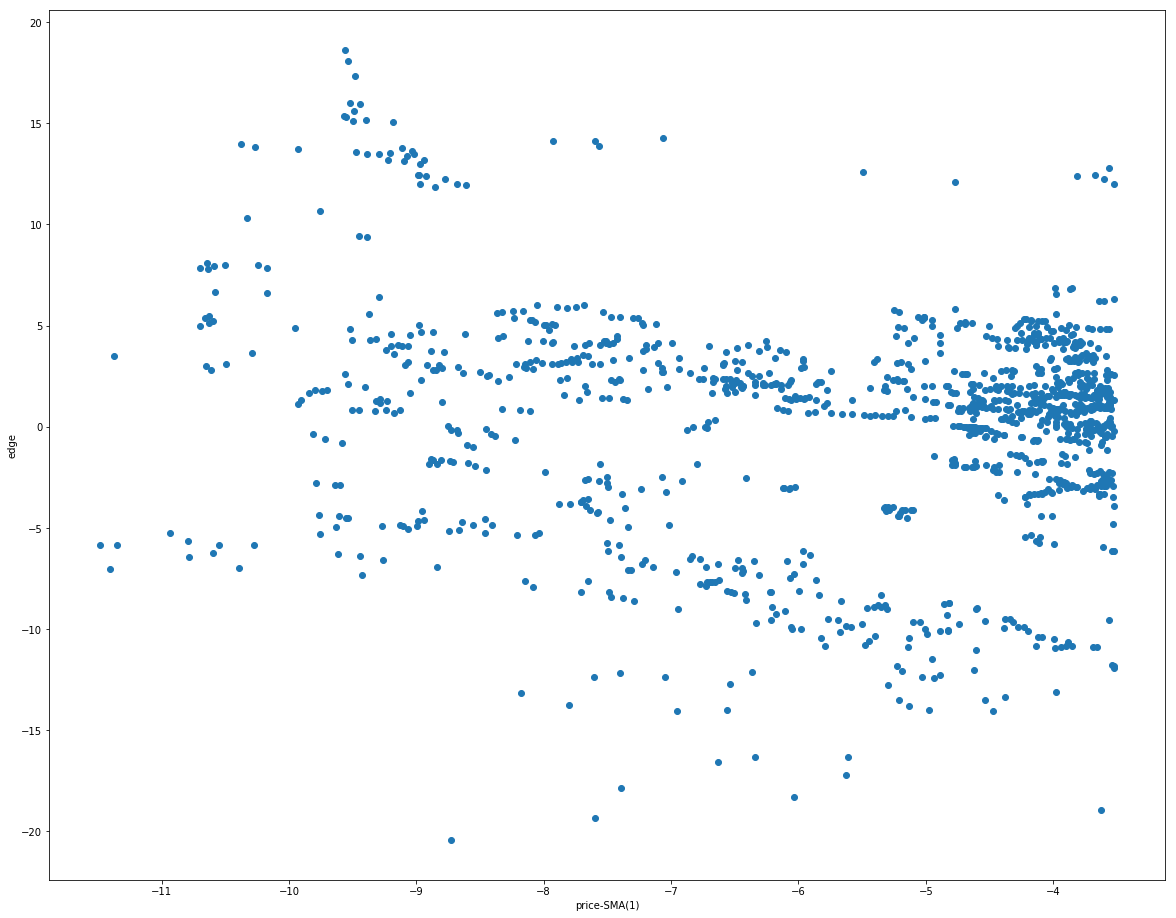

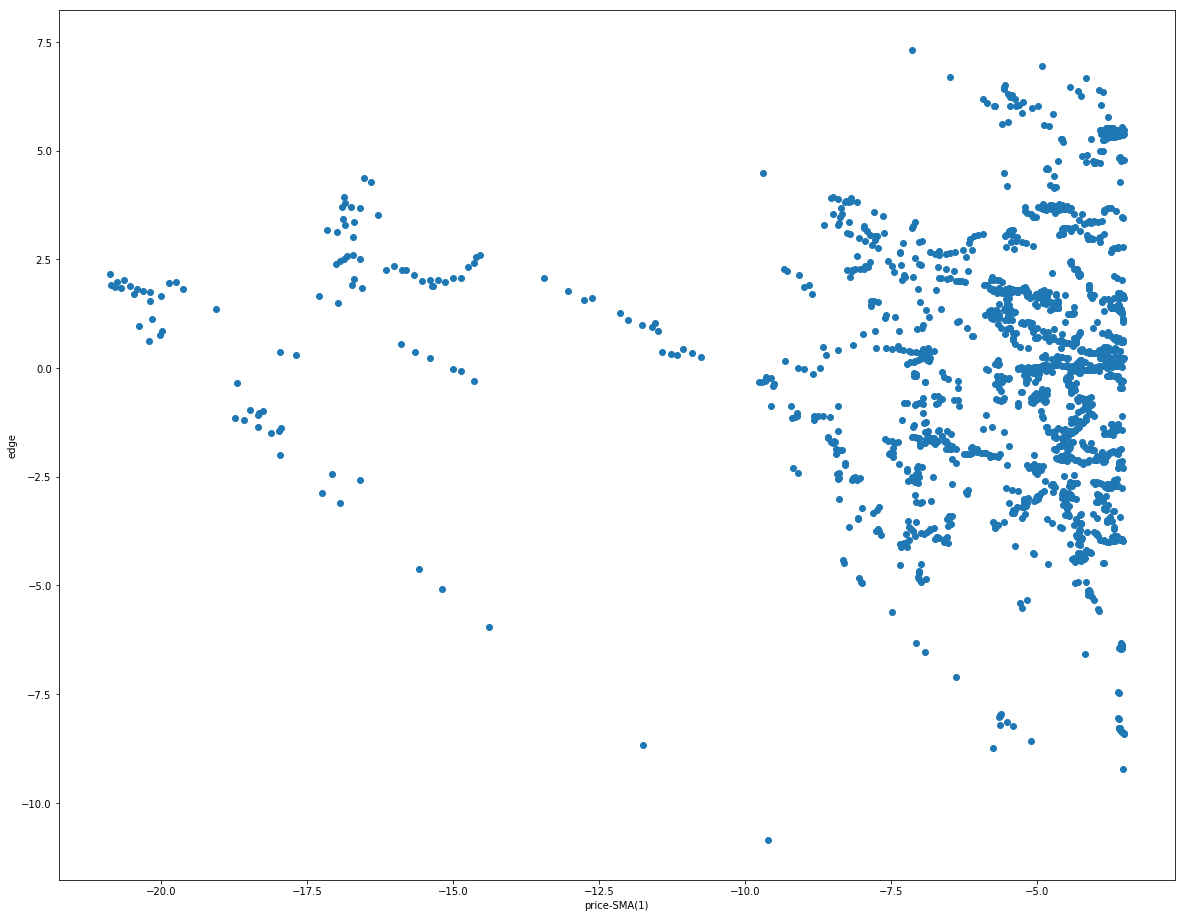

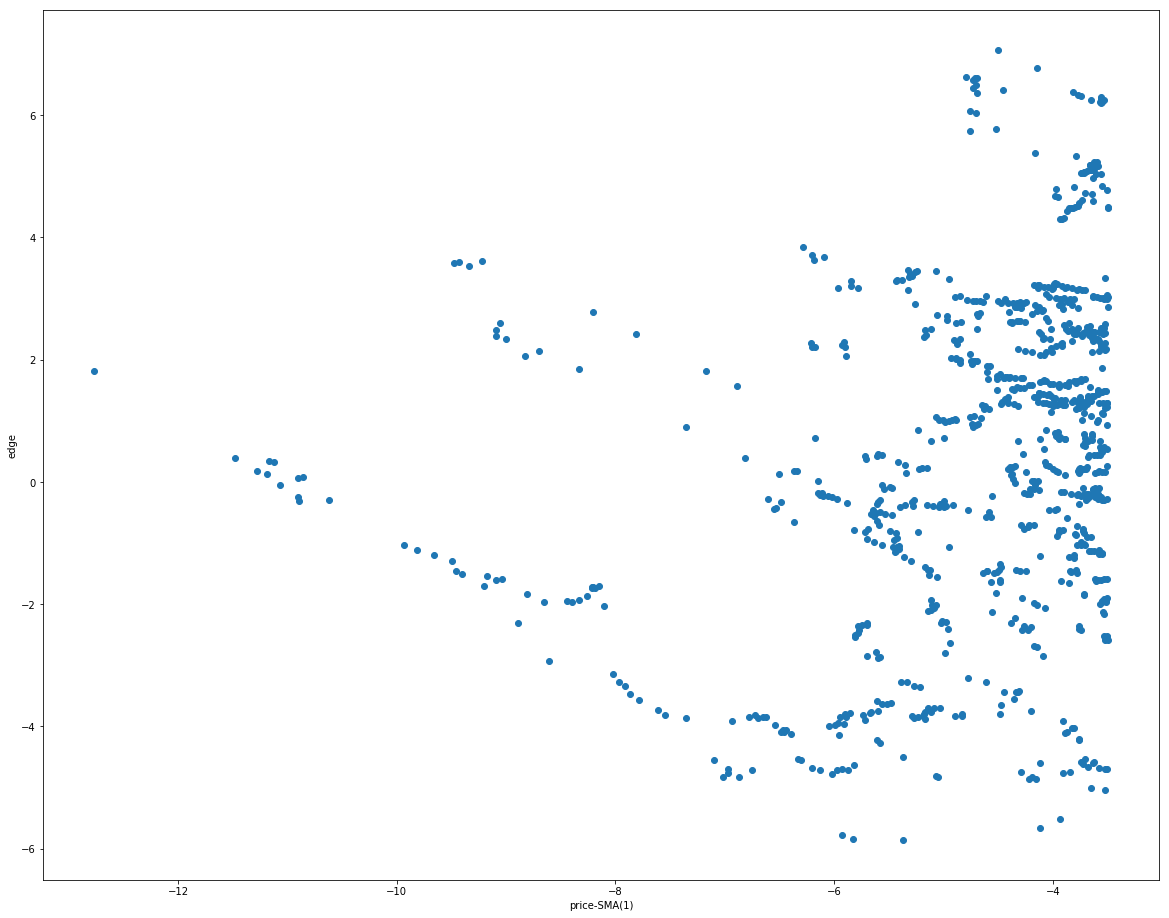

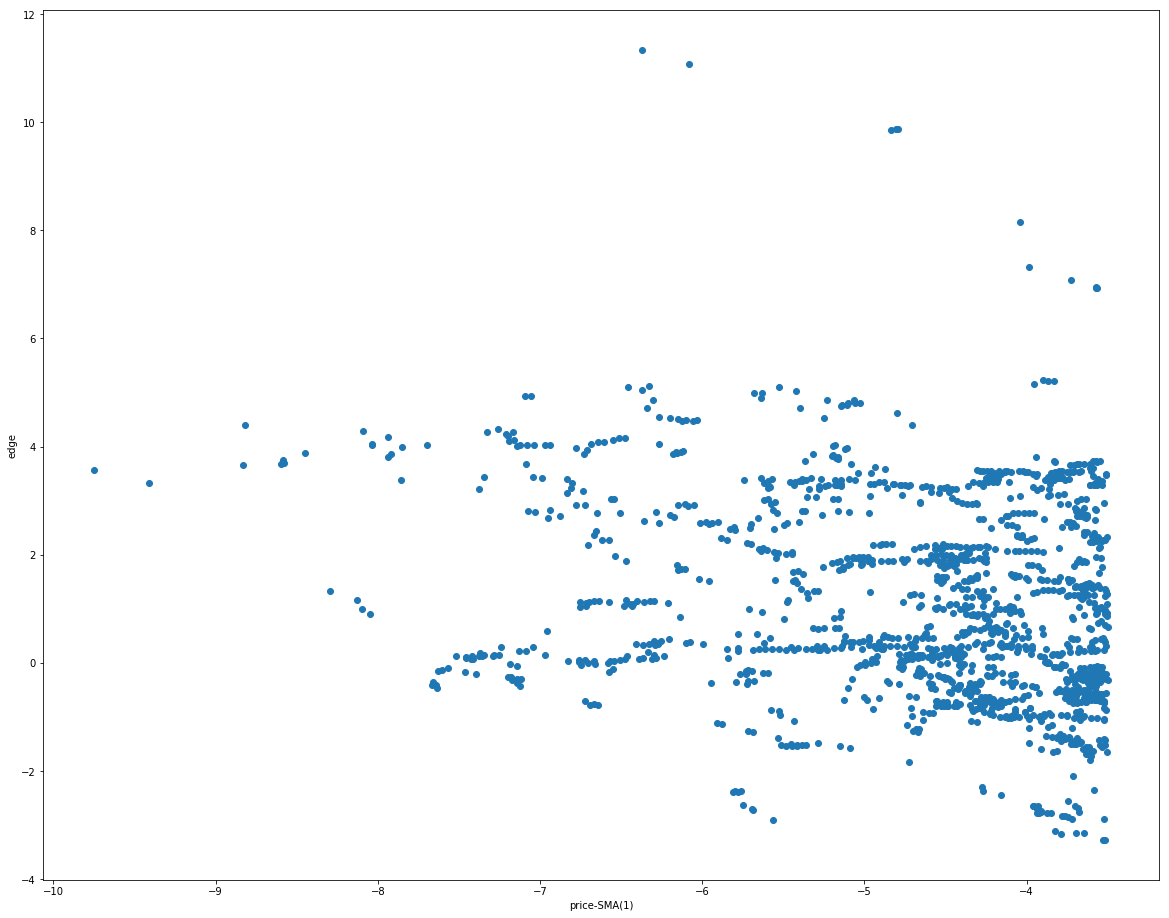

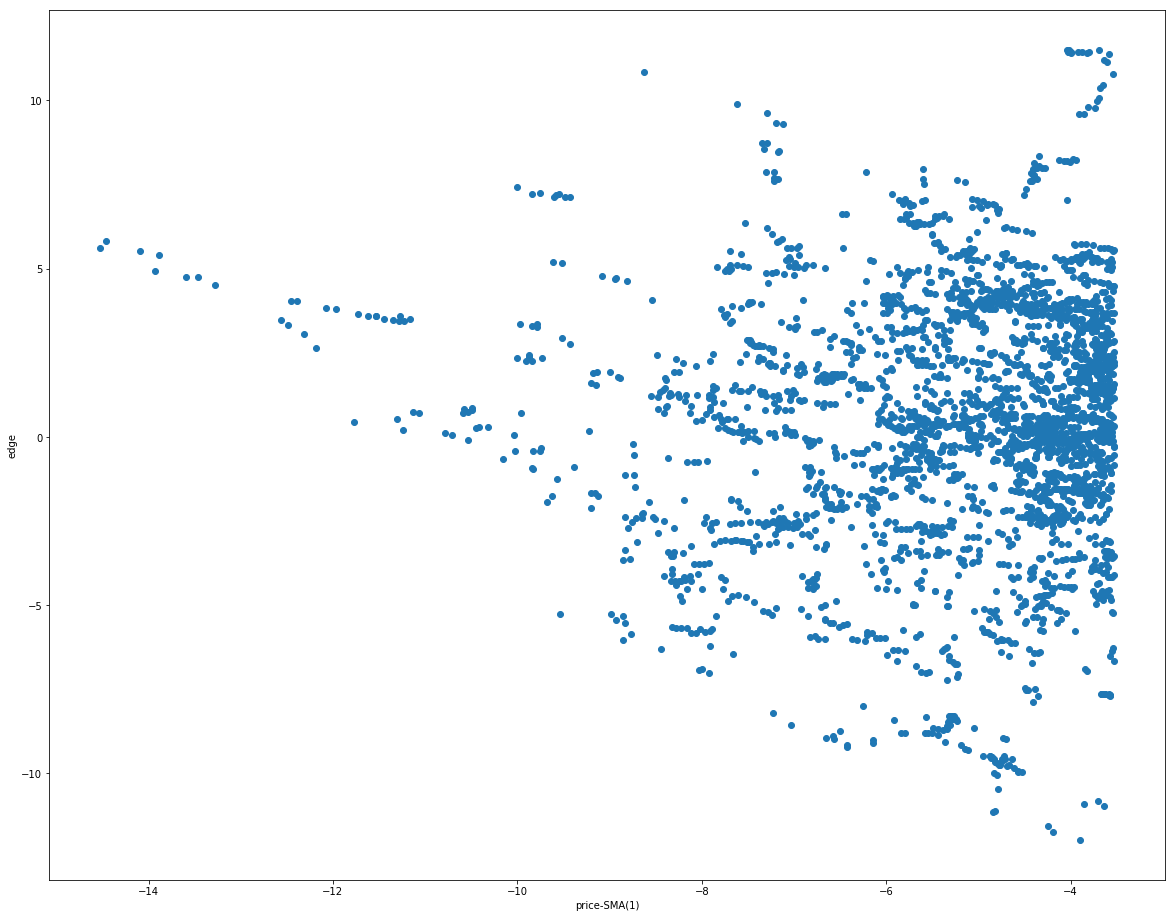

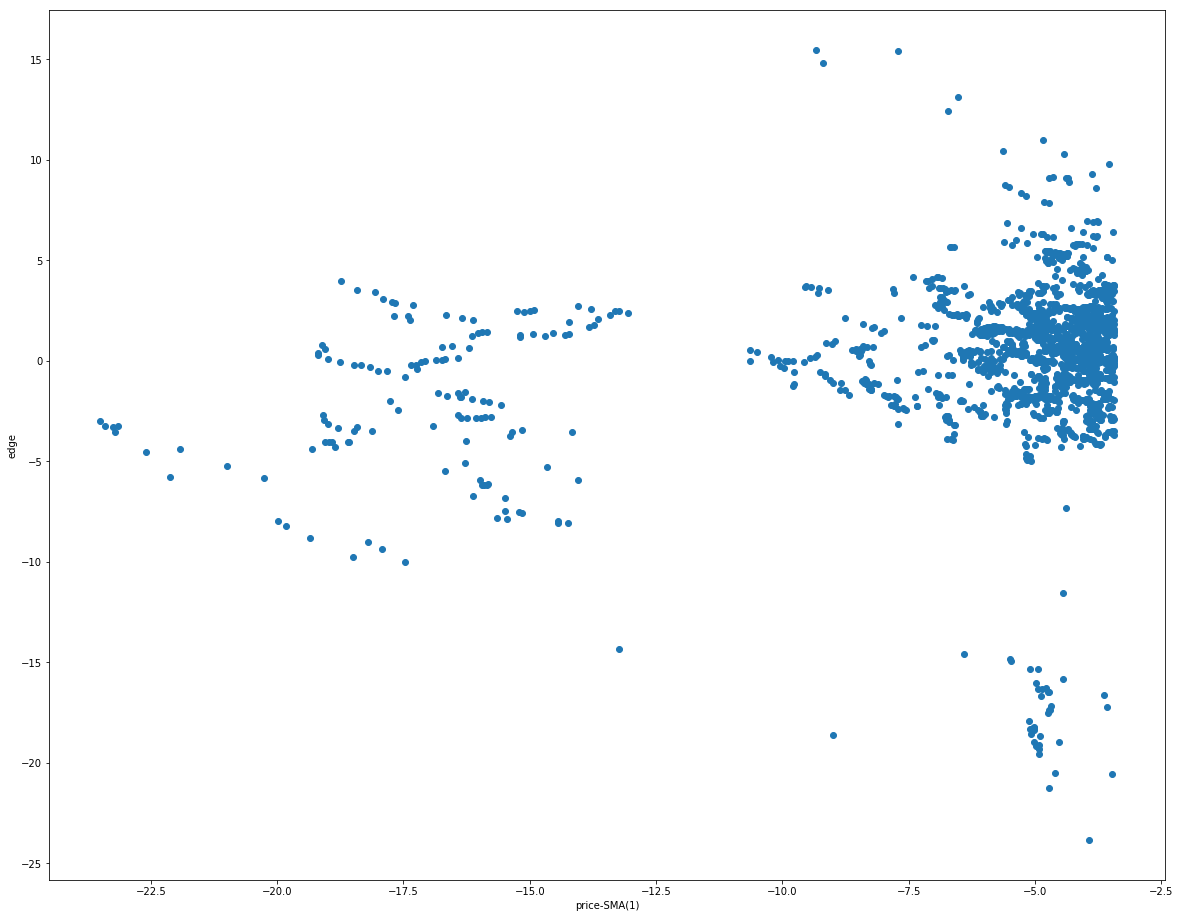

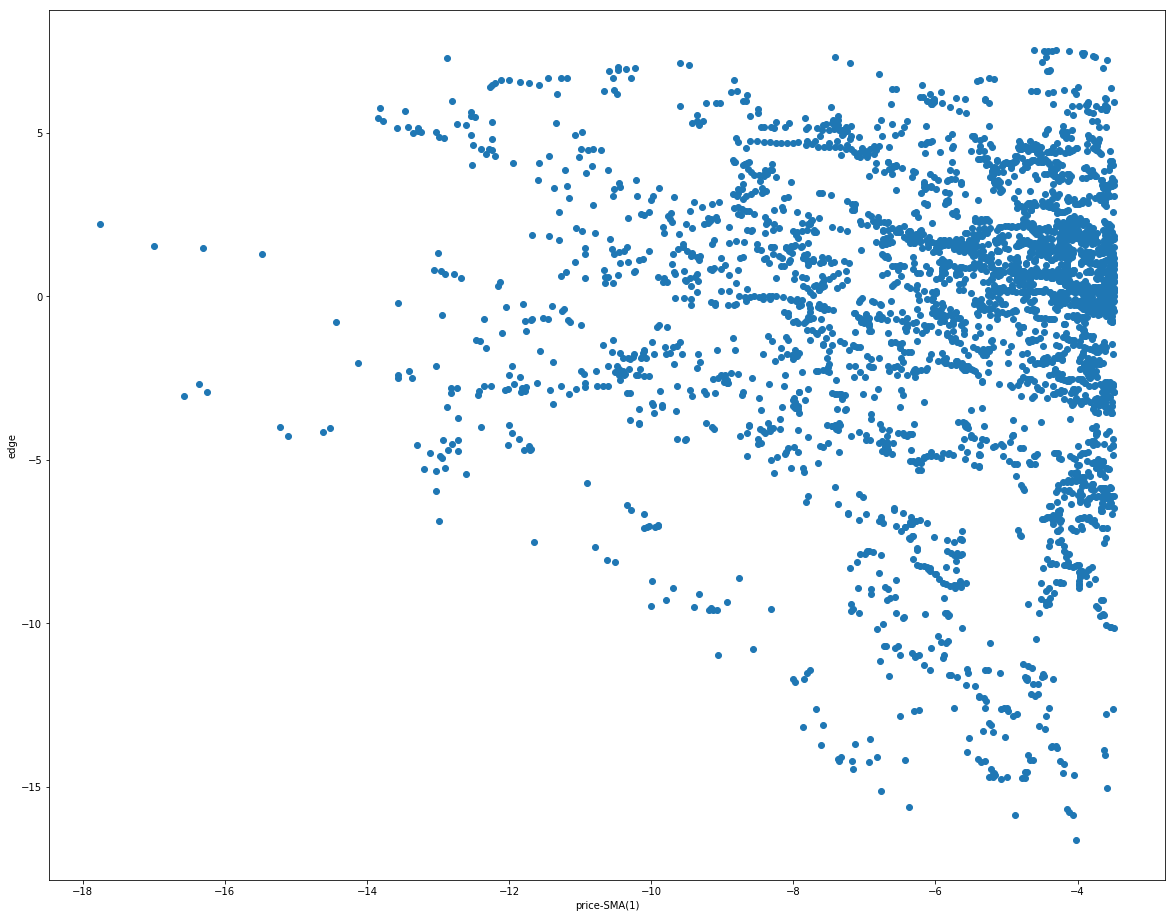

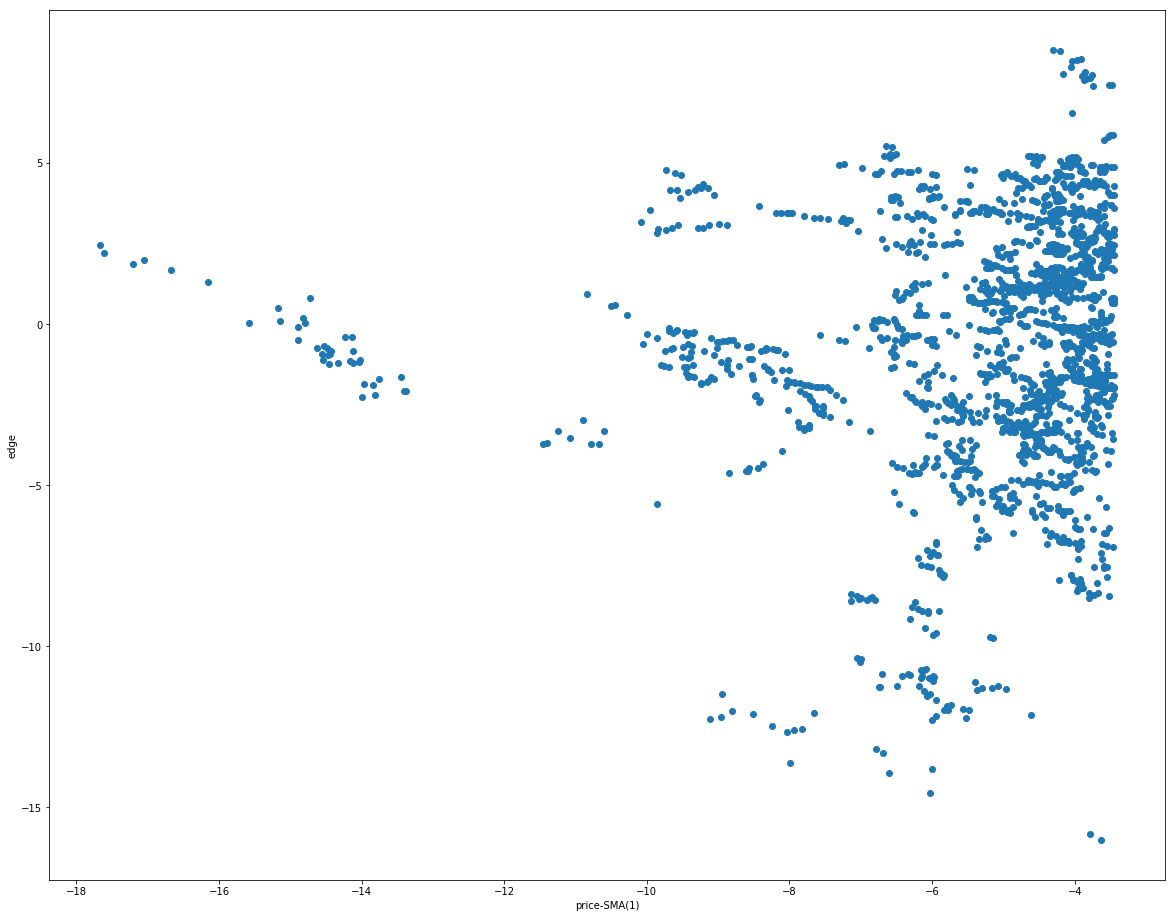

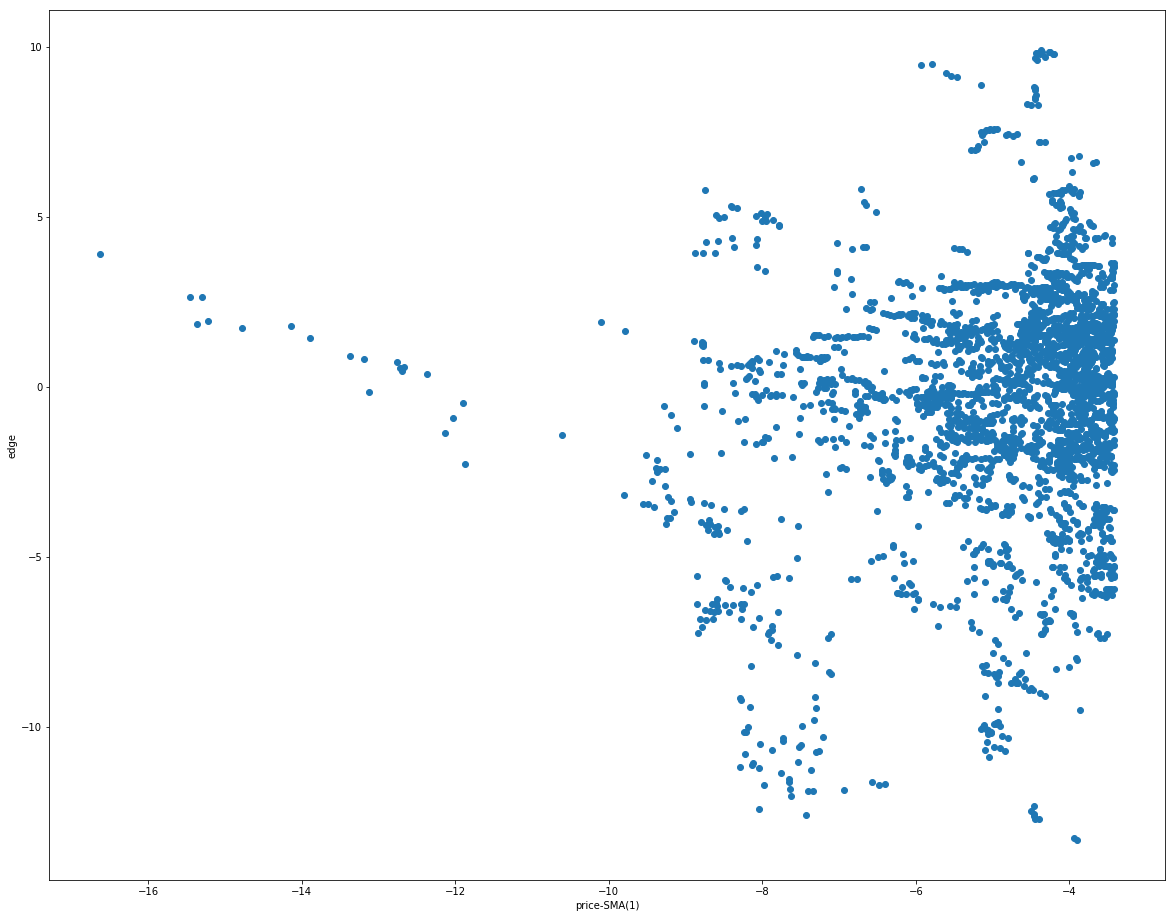

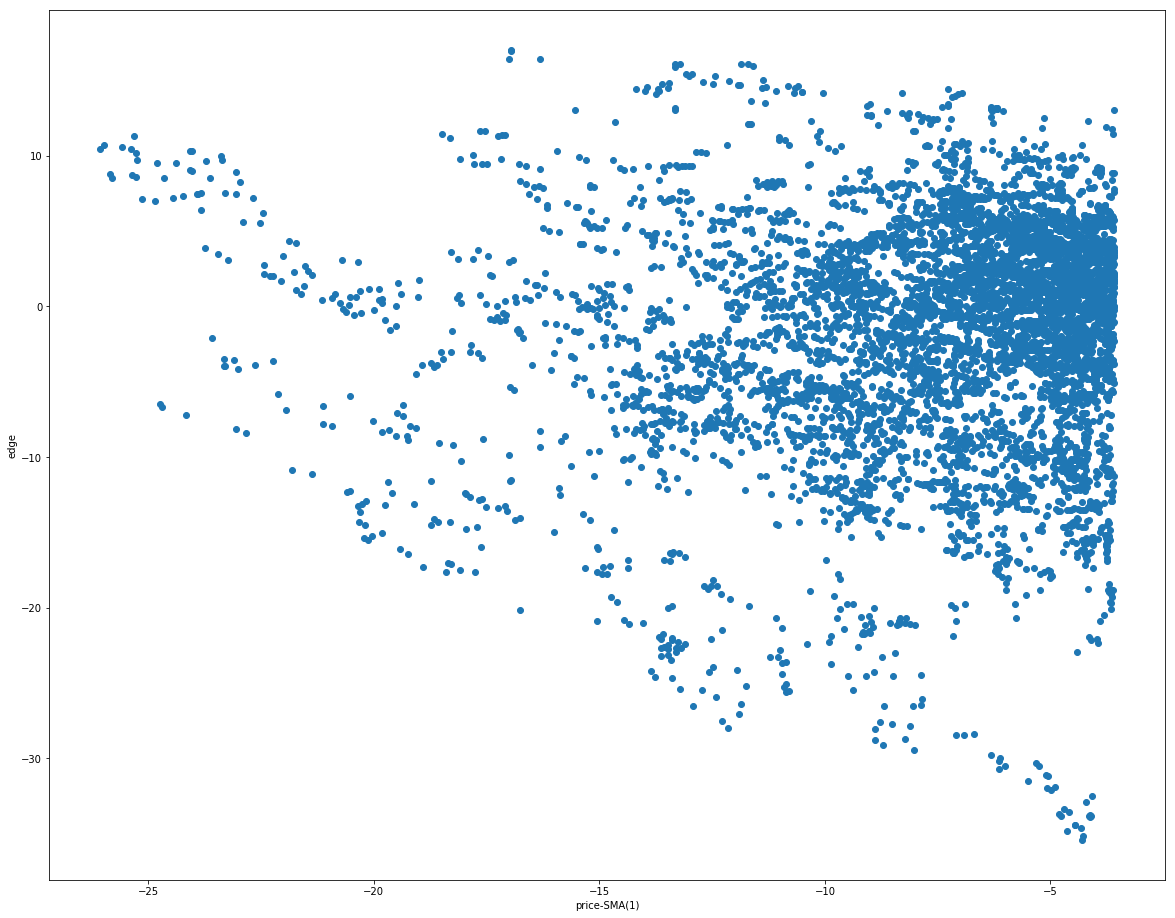

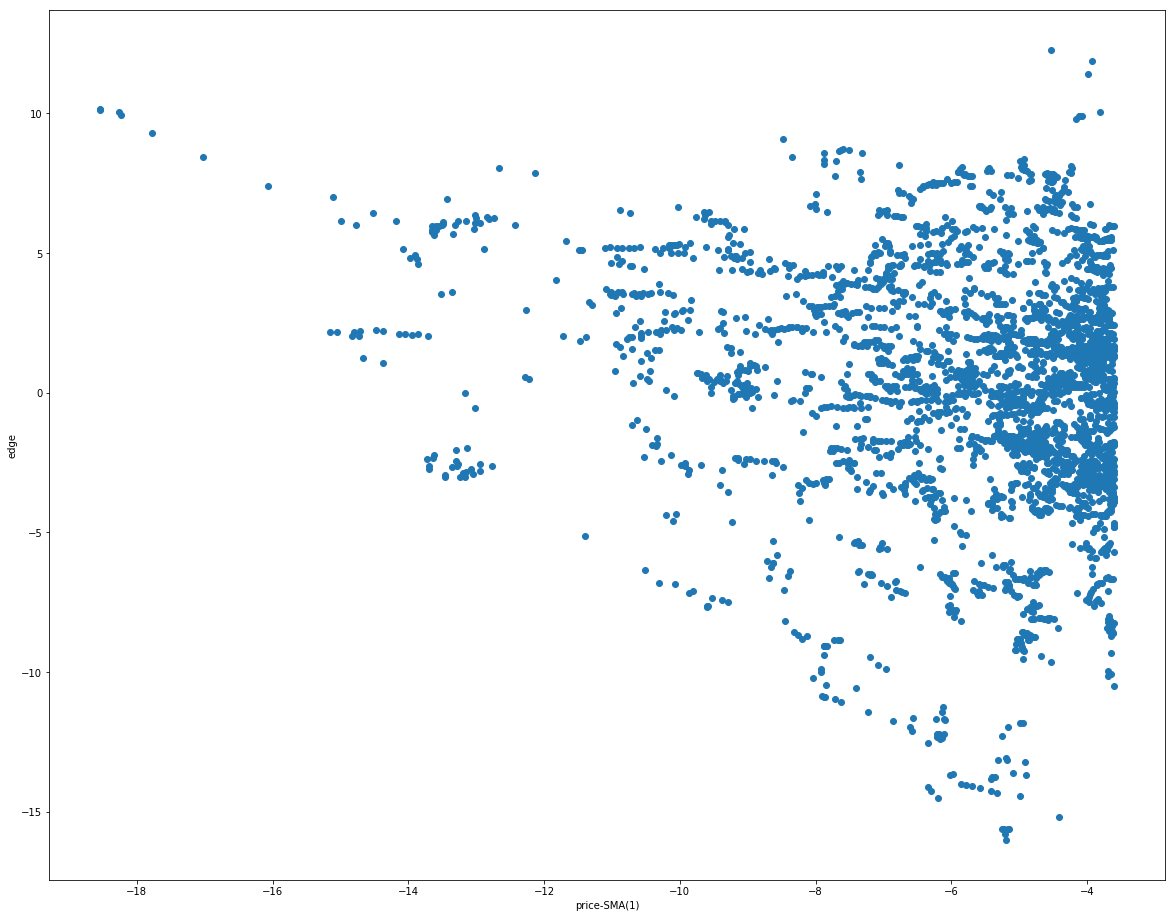

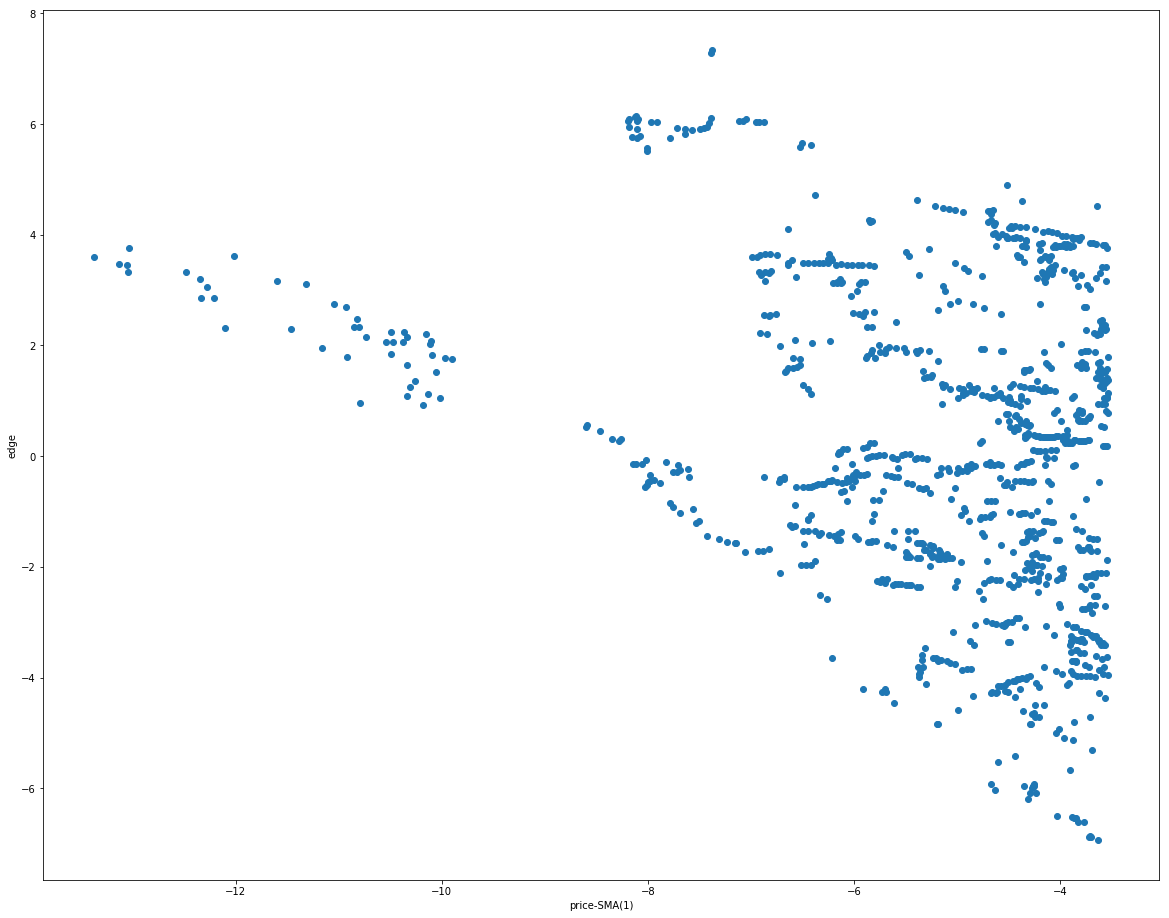

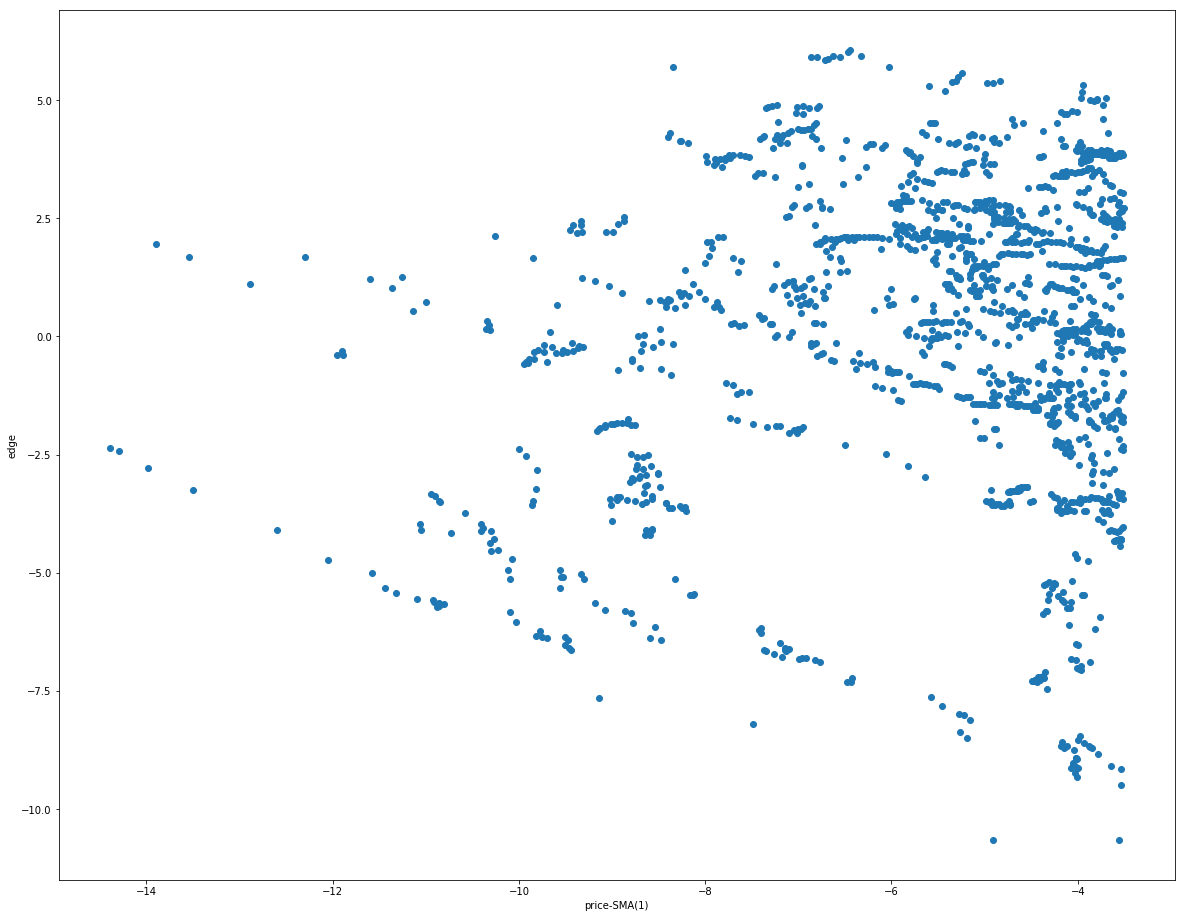

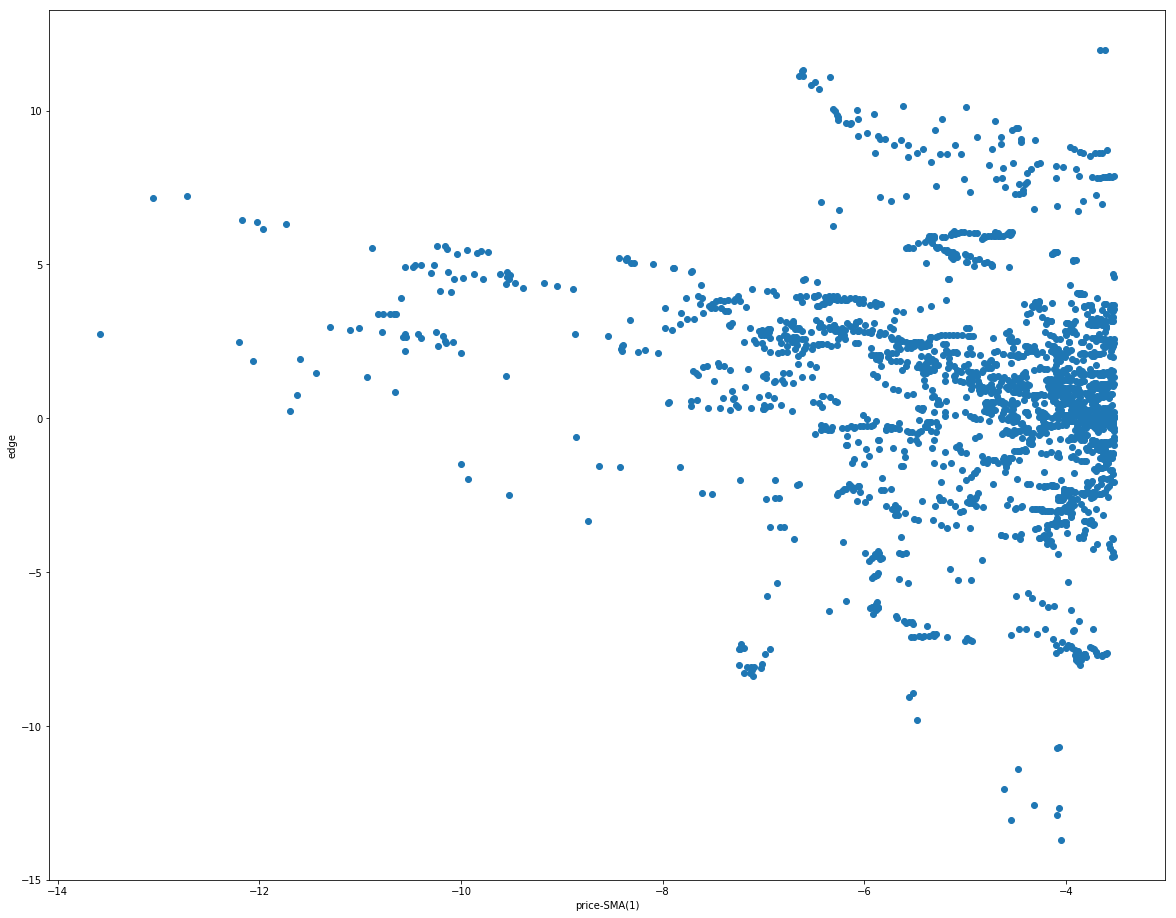

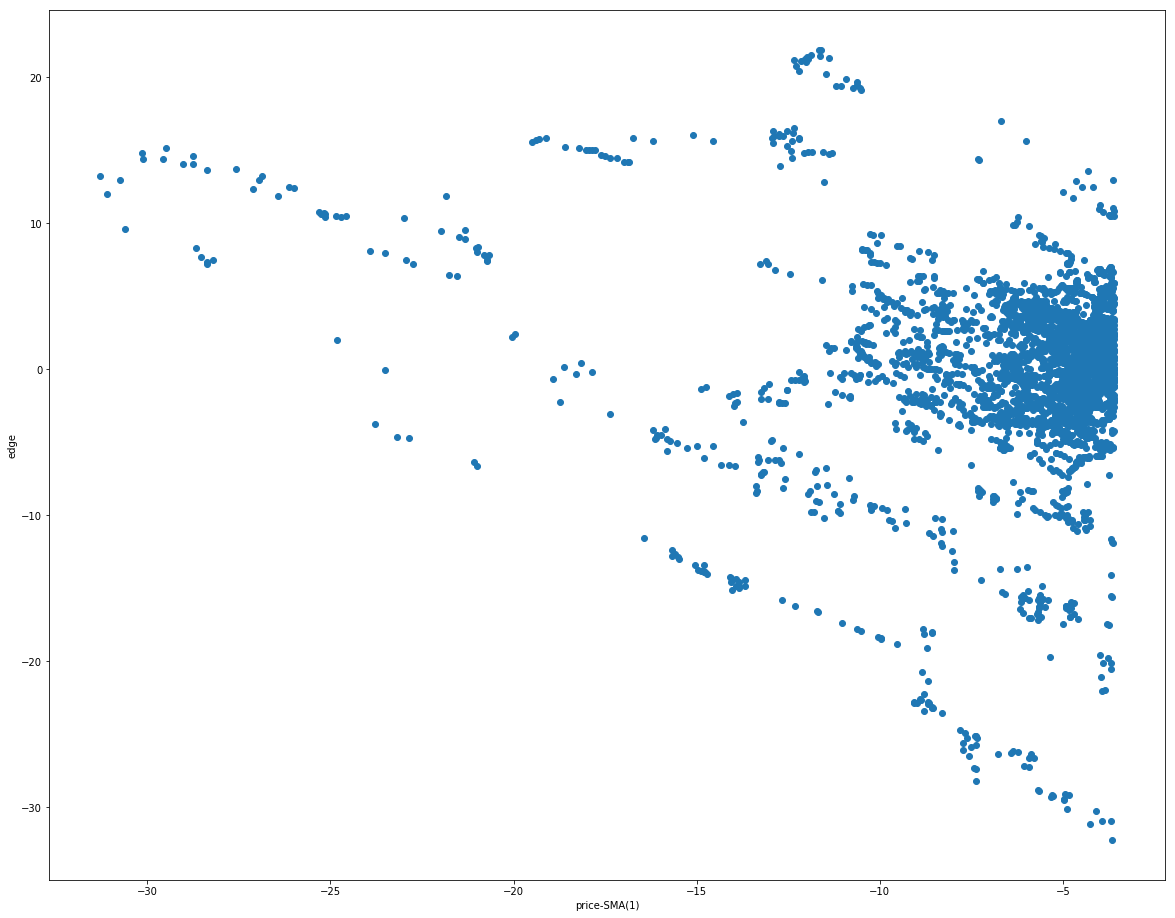

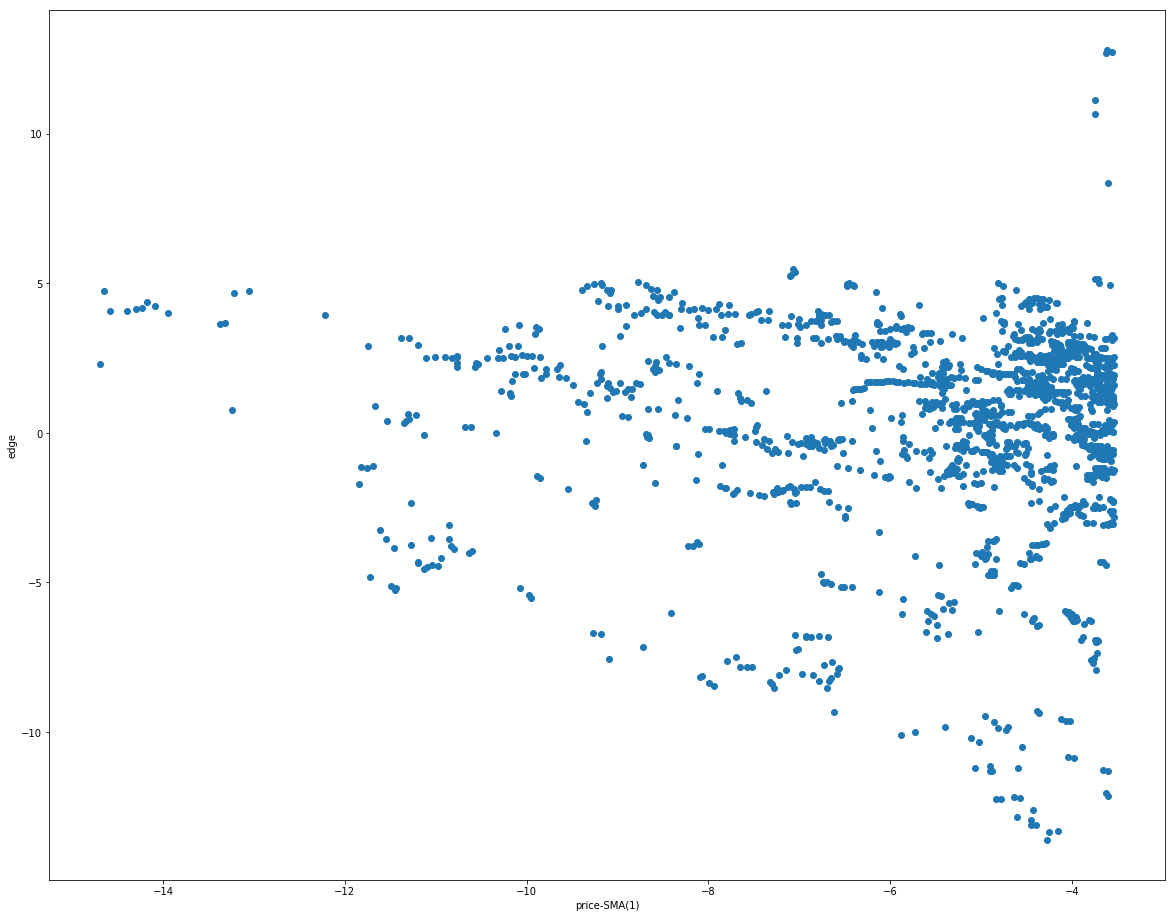

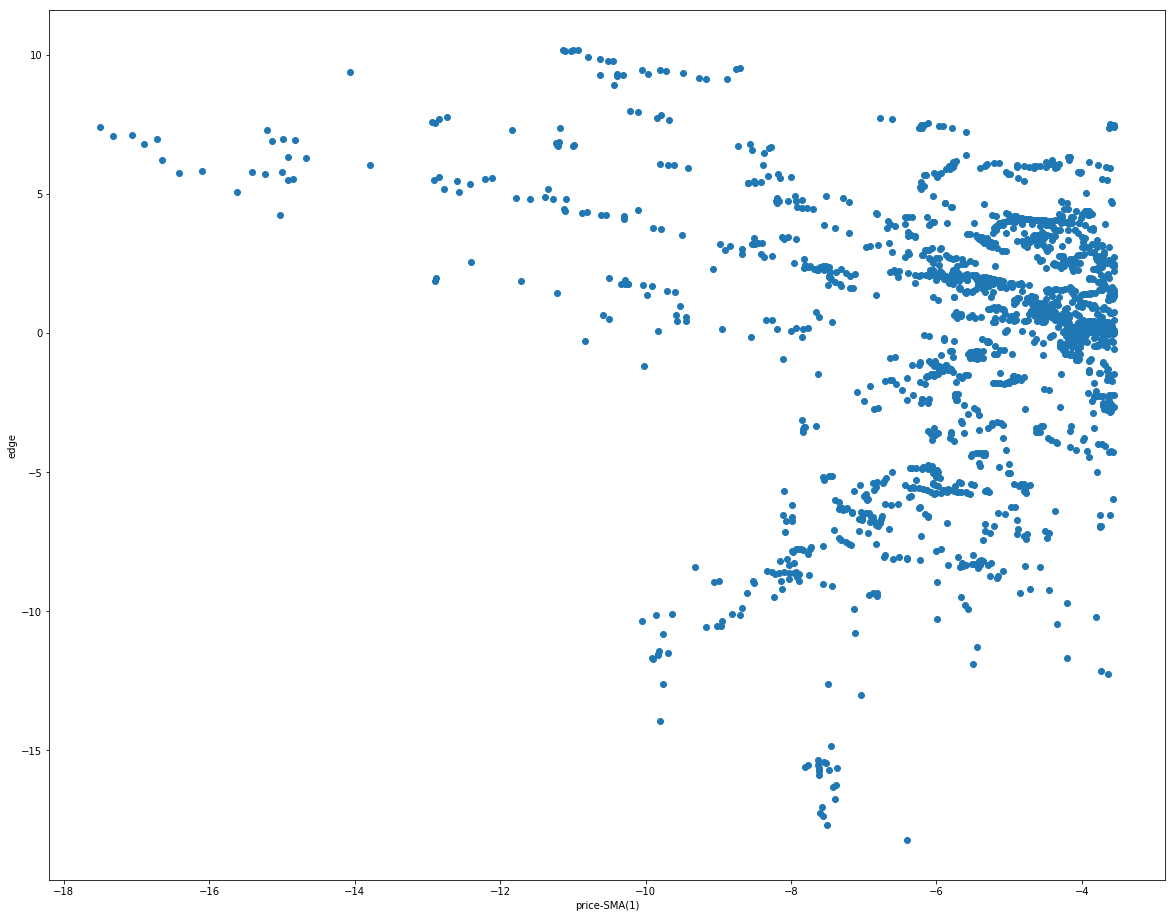

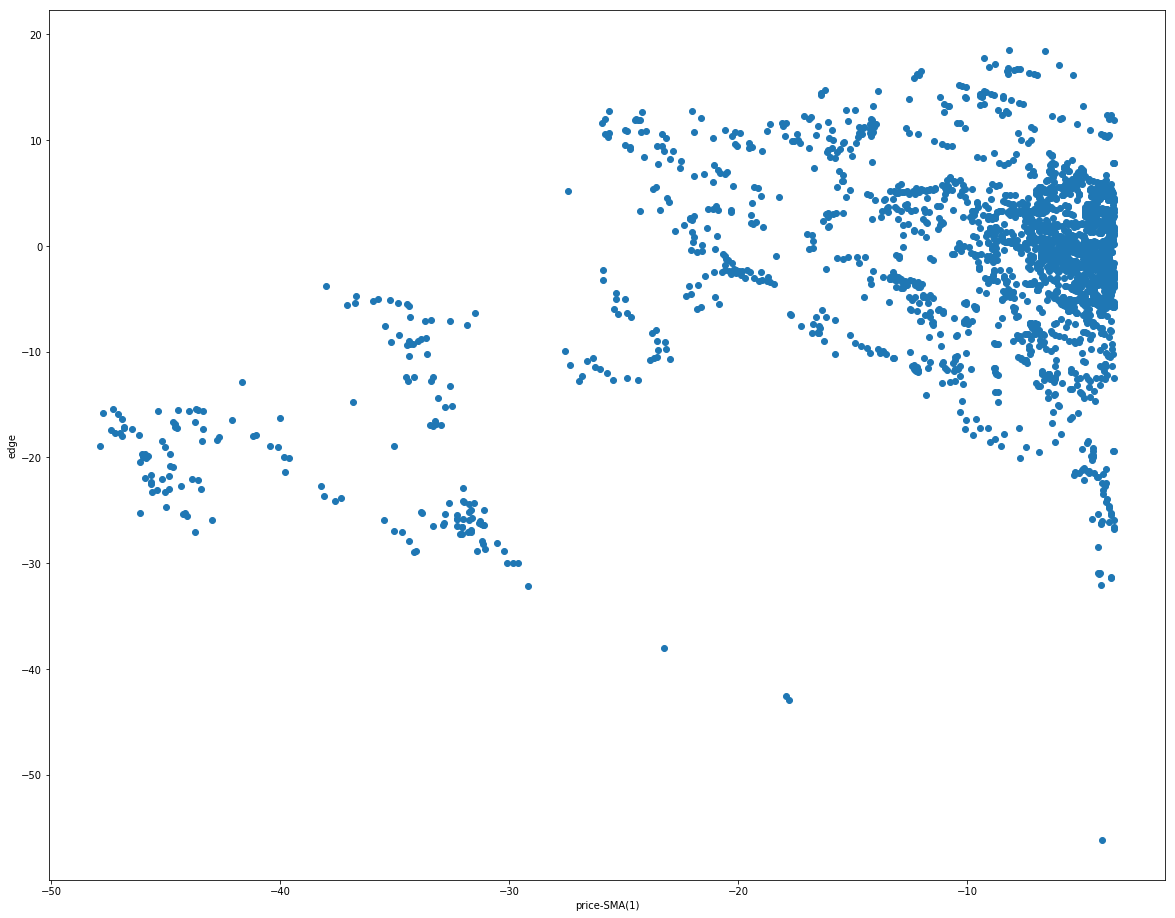

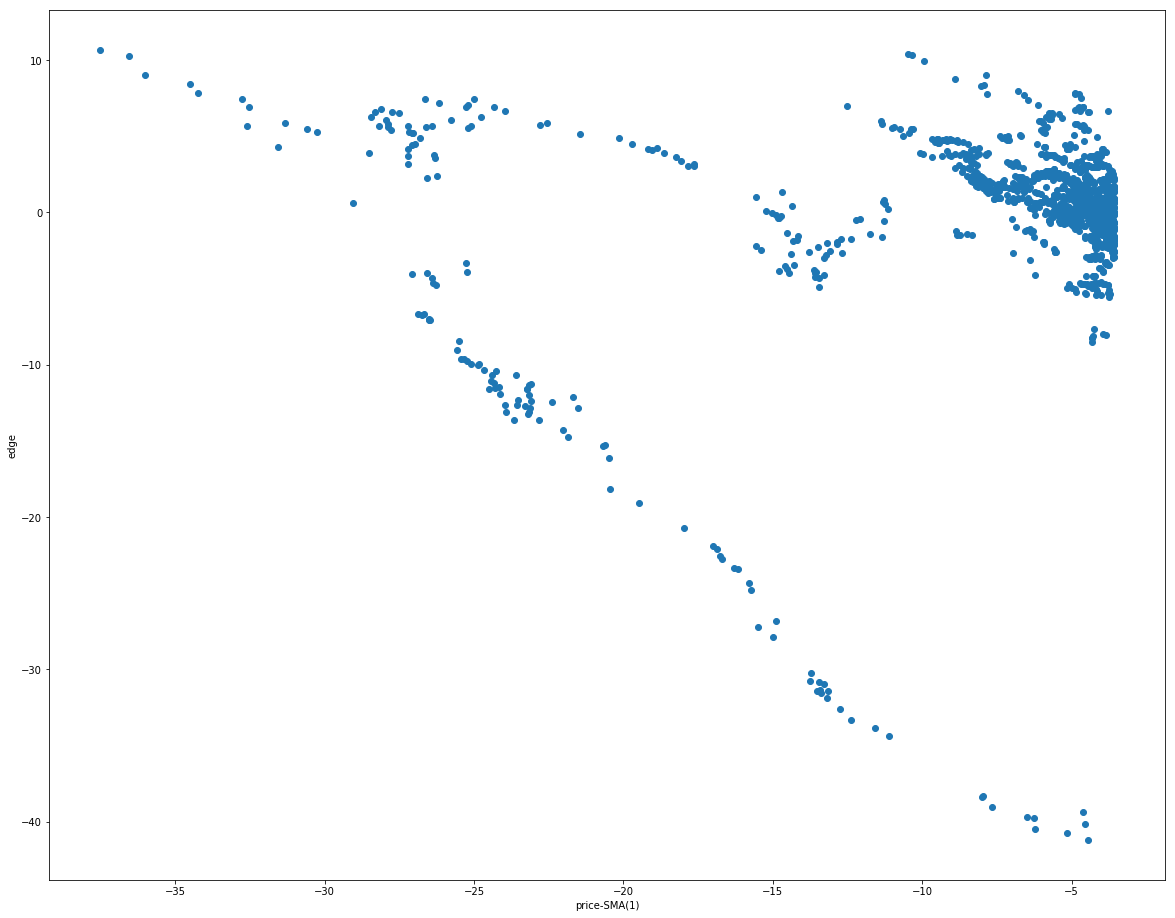

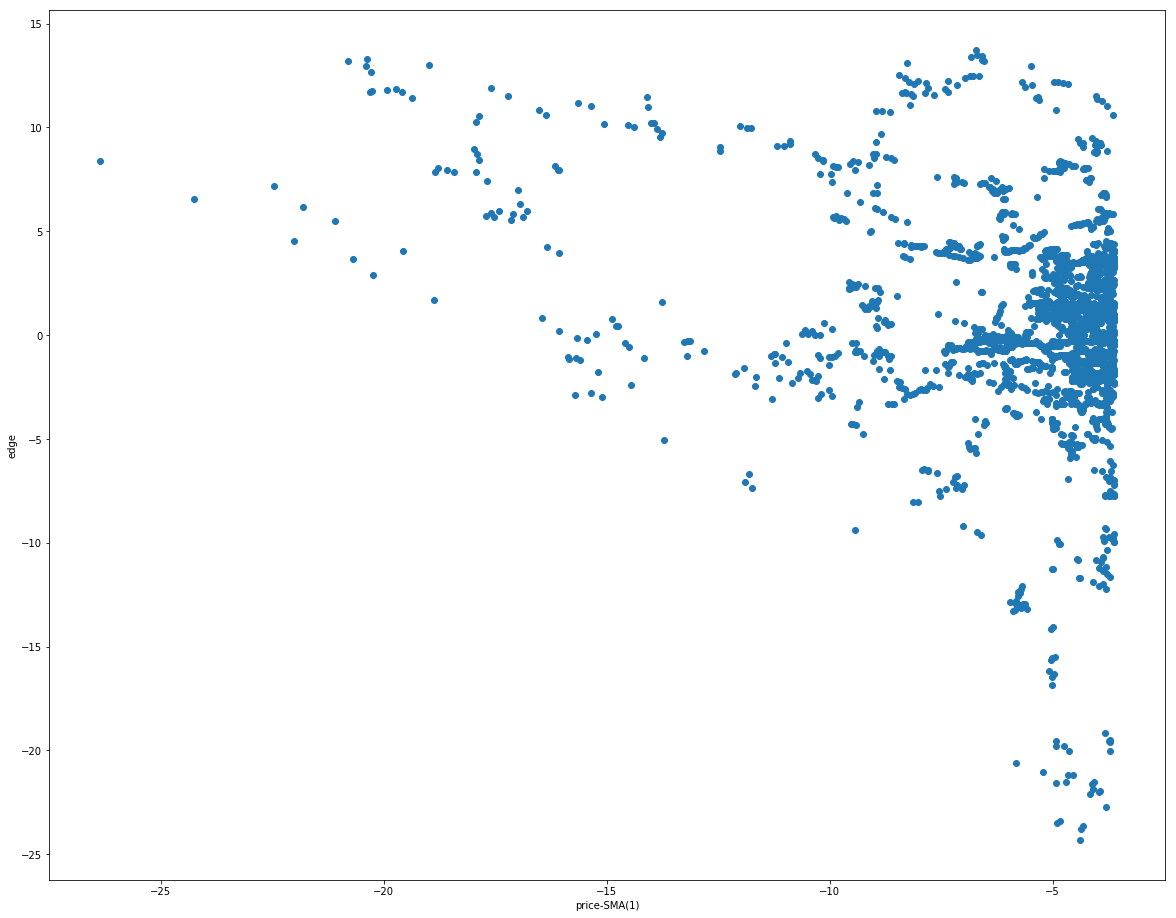

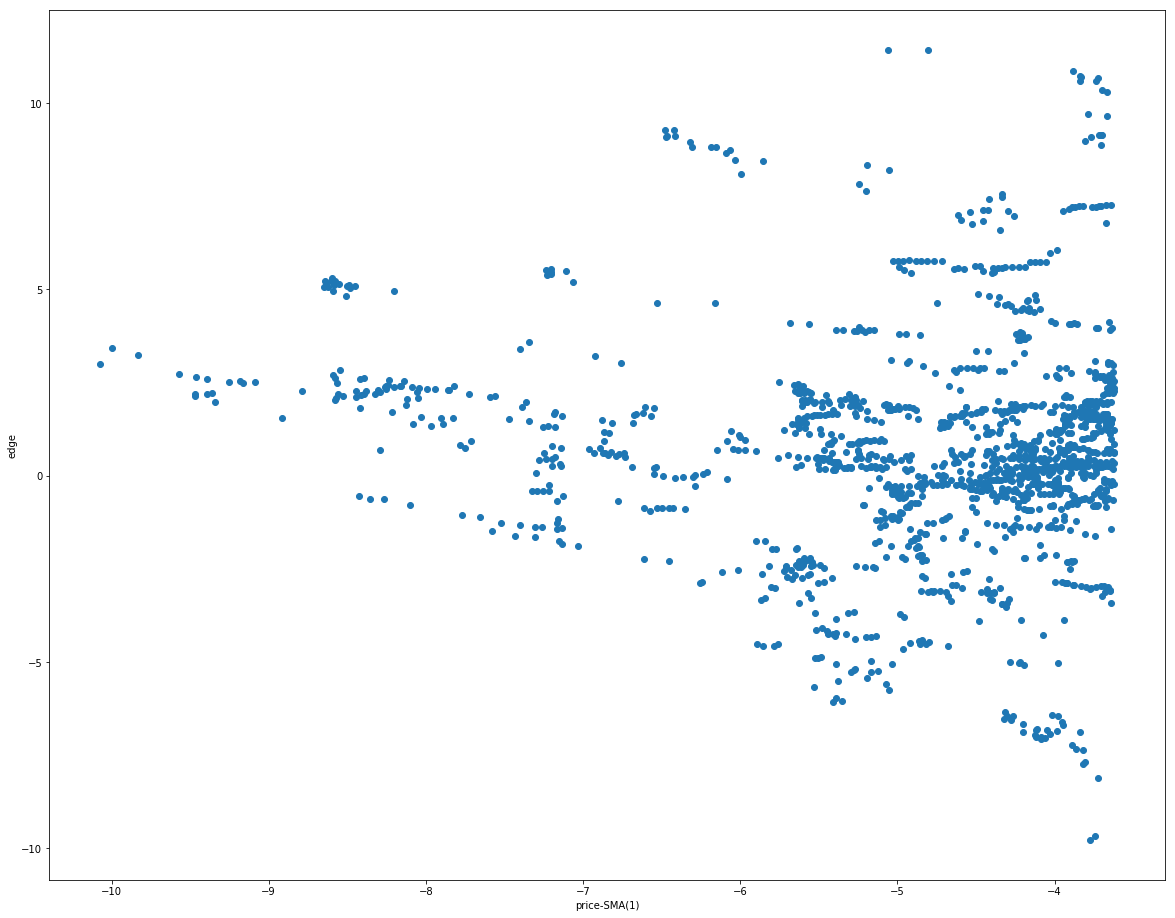

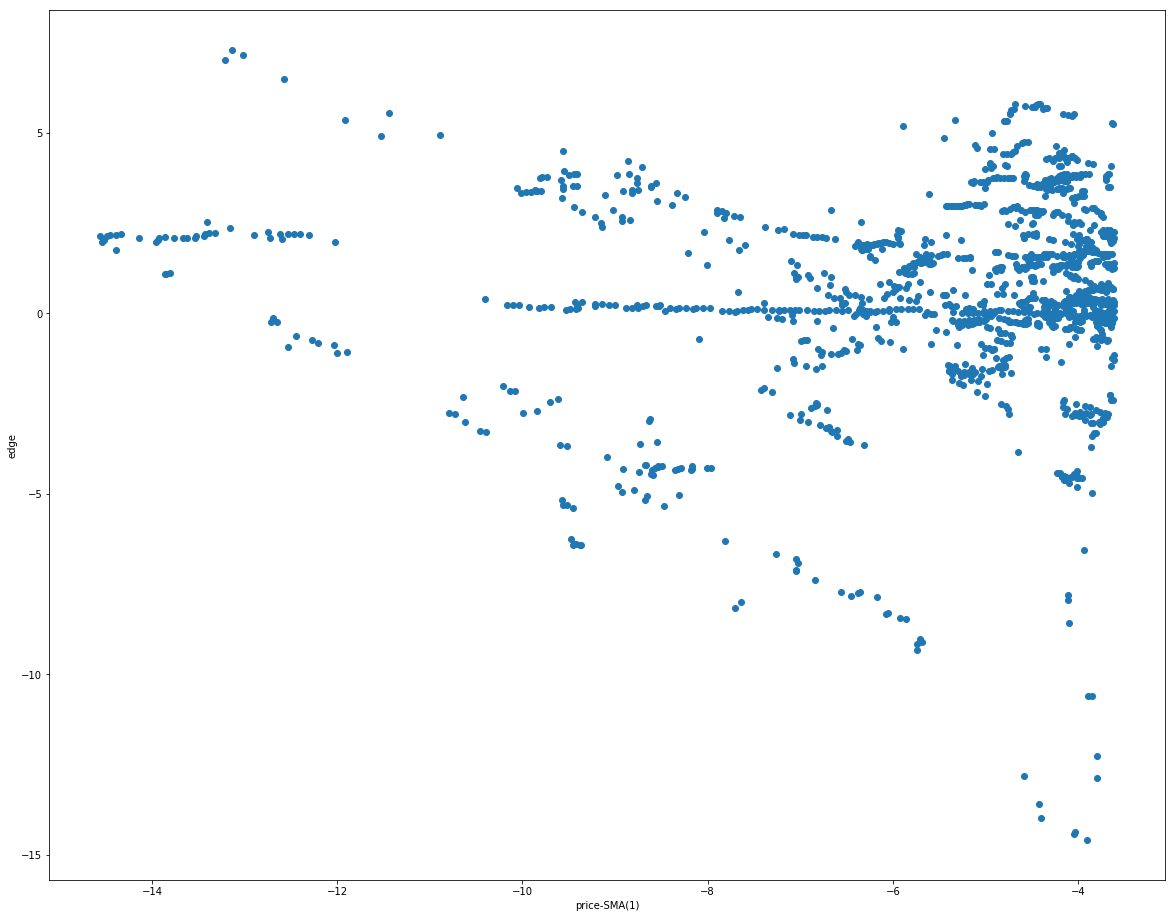

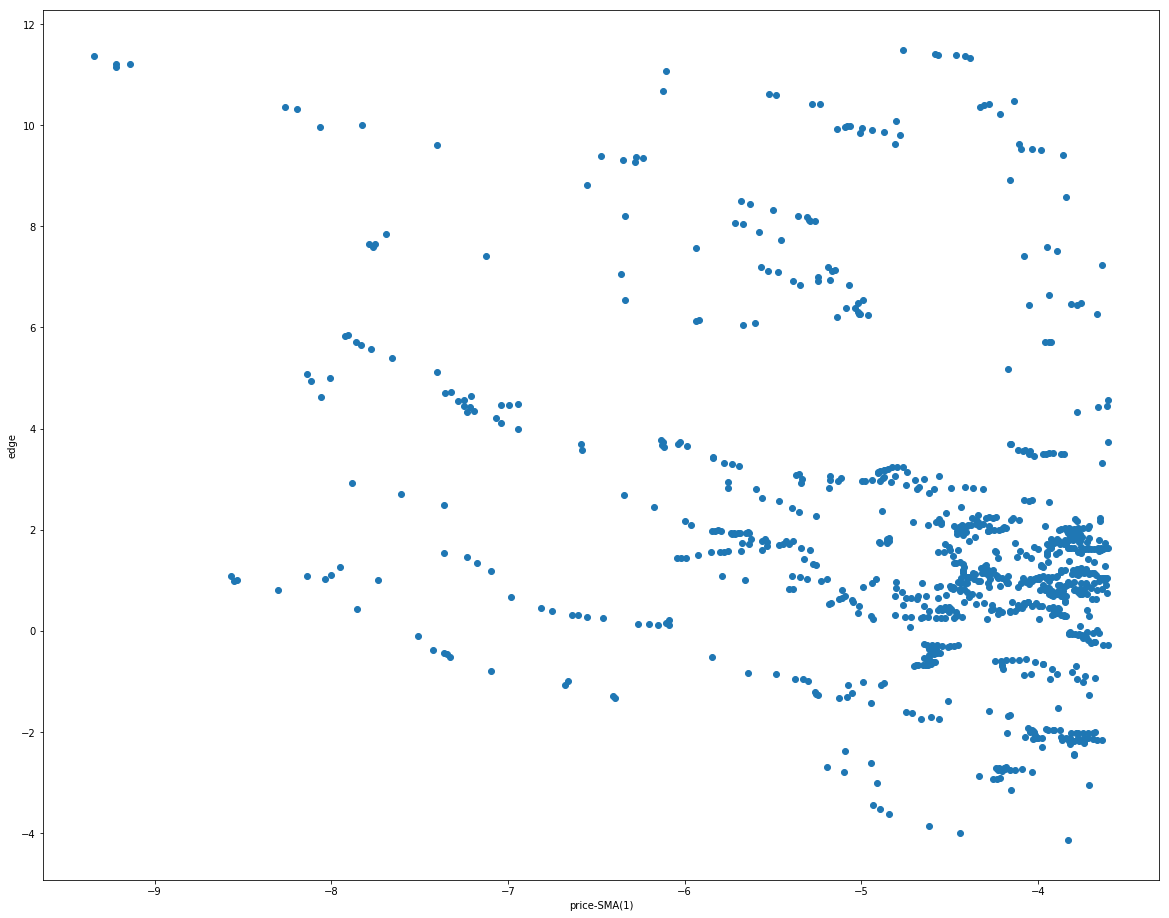

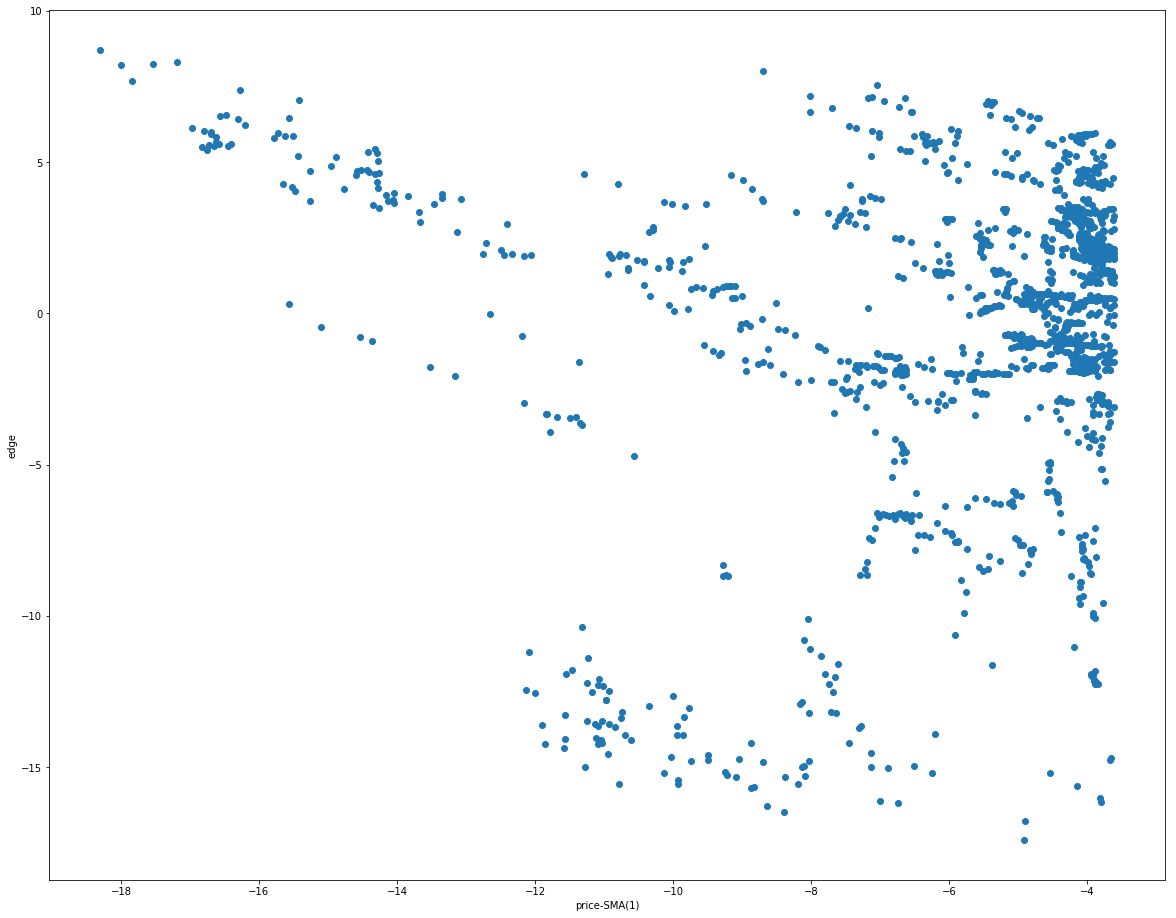

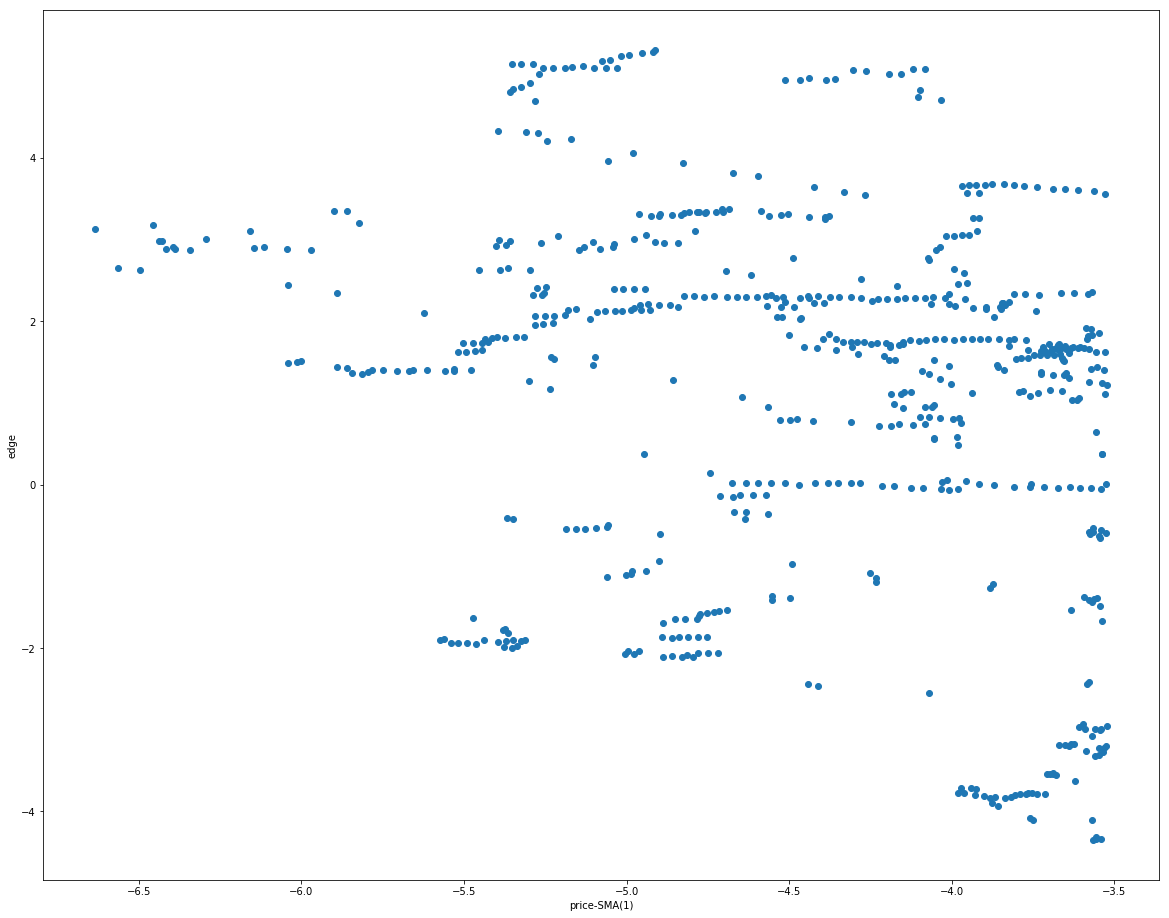

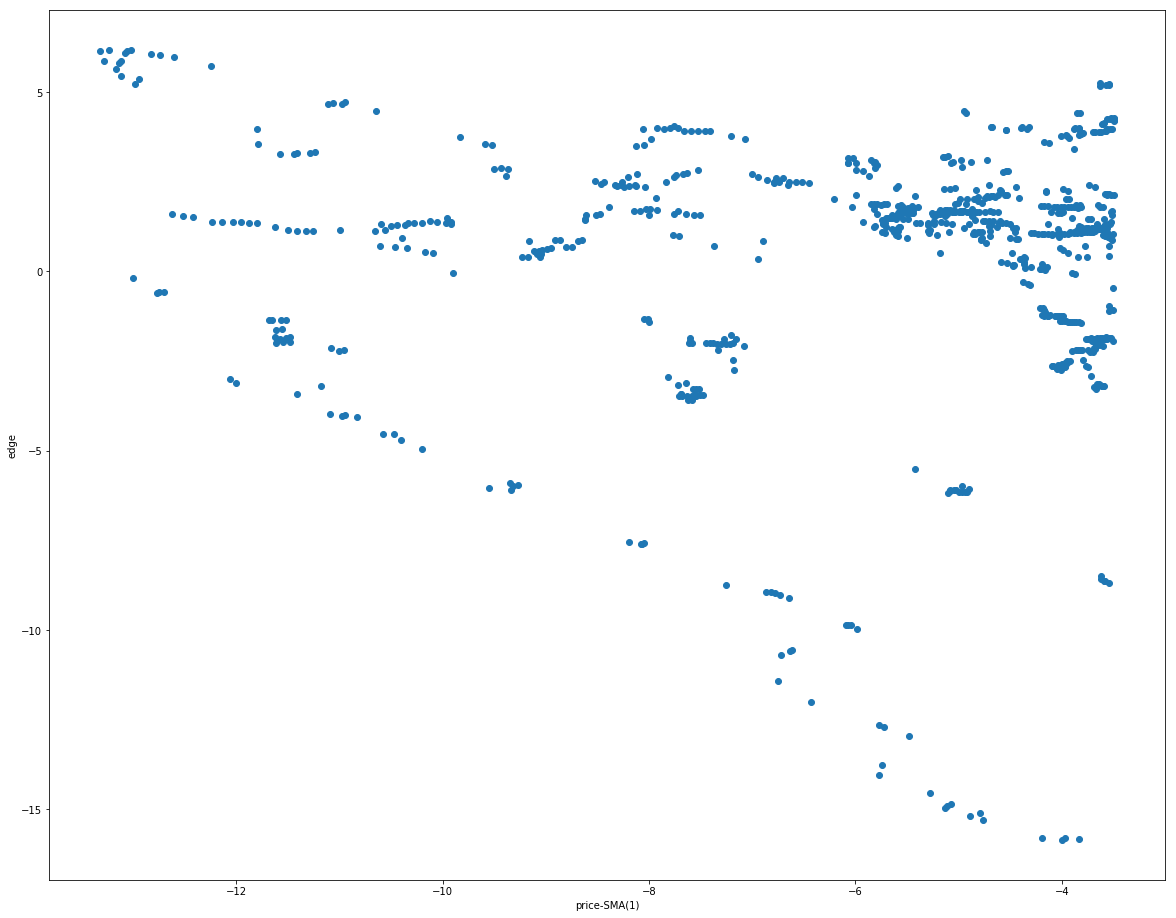

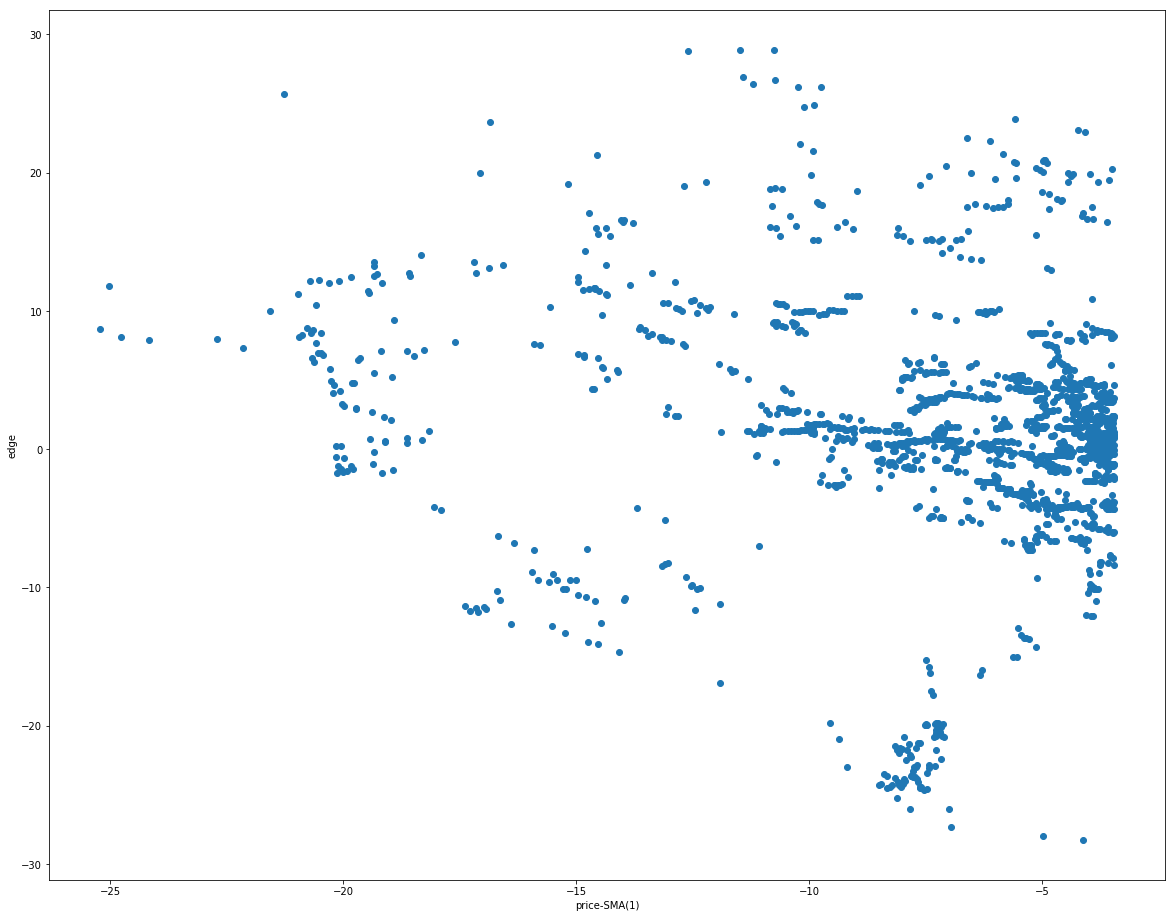

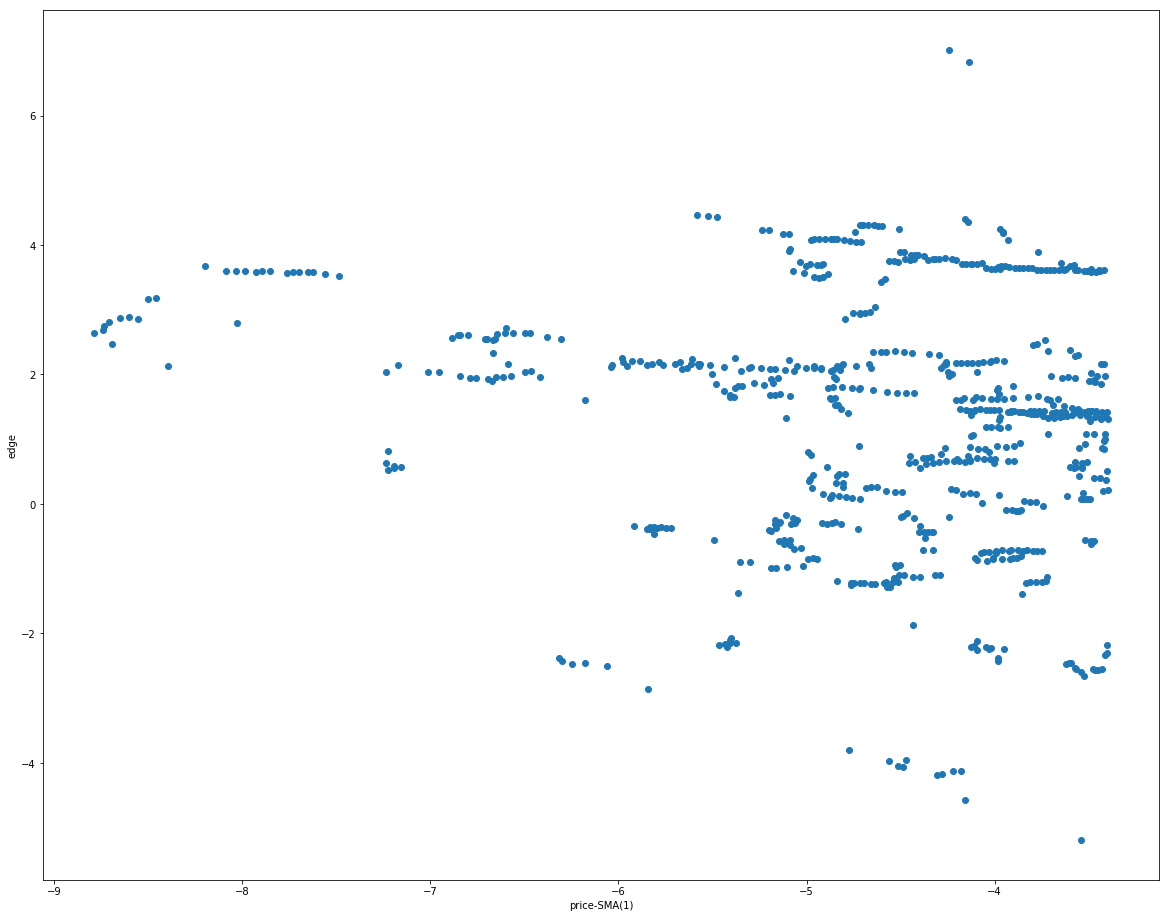

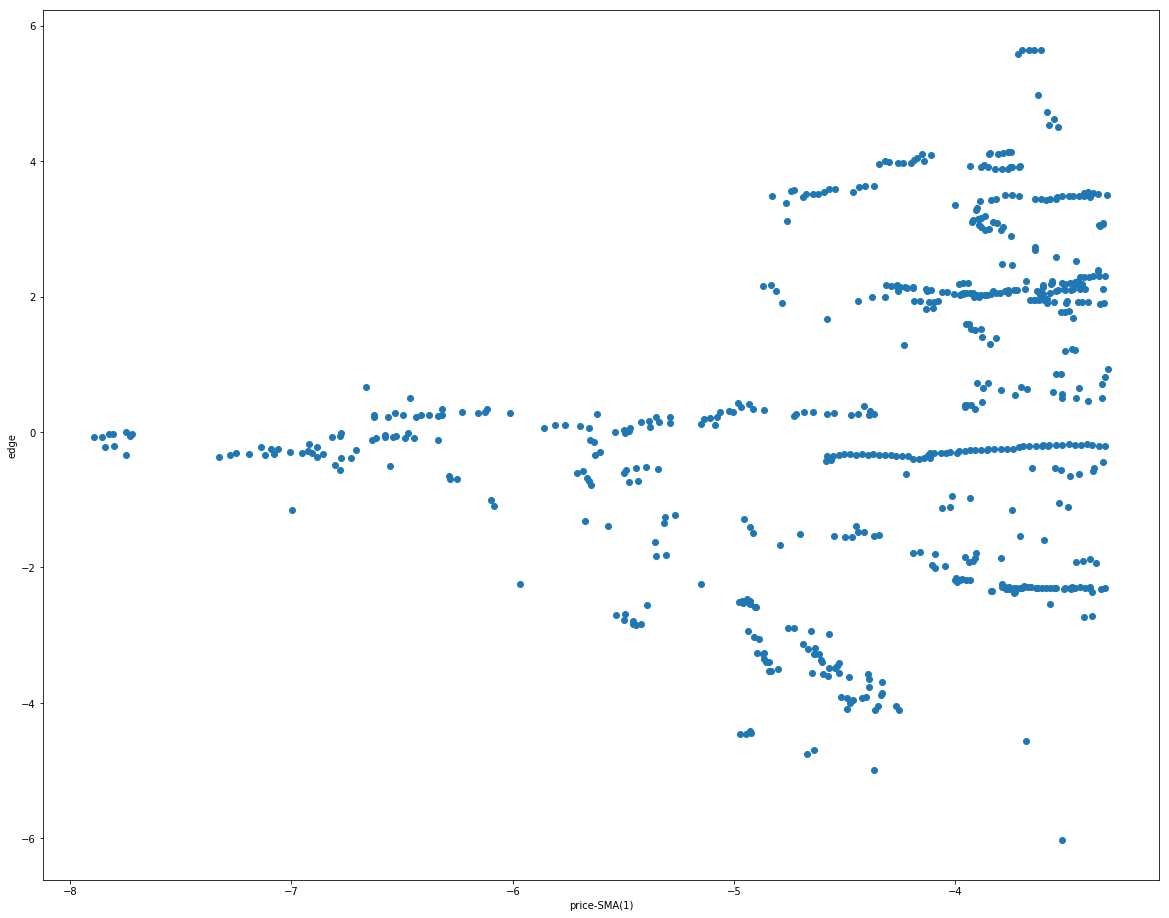

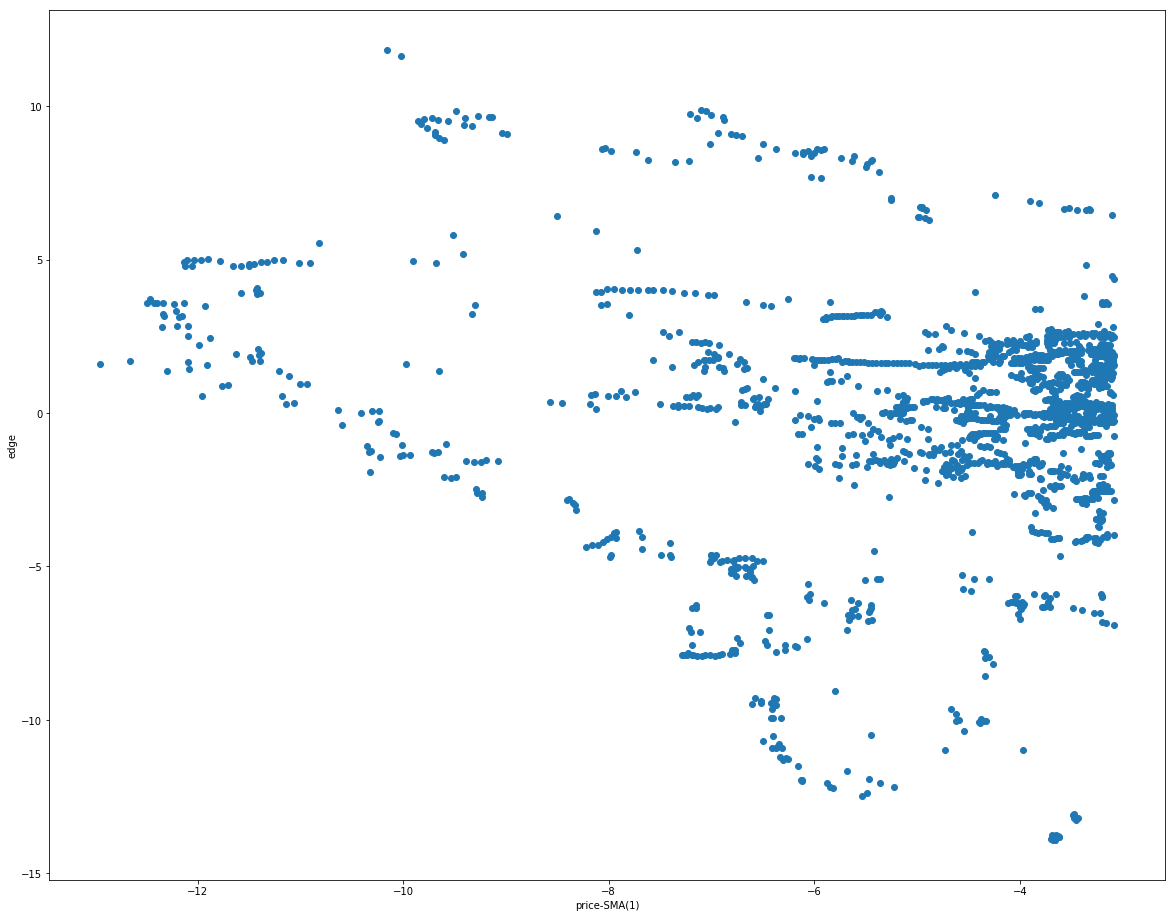

In [43]:
#visualisation

df_path='/Users/hudsonyeo/Desktop/Python/leo/data/day/TA/results/graph/'

final_df=pd.DataFrame()    

for i in range(len(df_list)): #for each 20 day rolling window
    if i<19:
        continue
    print(name_list[i])

    #get -19 day
    x=df_list[i-19][:,54]
    #get -18 to 0 day (19 days in total)
    for k in range((i-18),i+1): #get 20 day moving averages
        x=np.concatenate((x,df_list[k][:,54]))

    cat=categorise_10()
    cat.fit(x) #calculate quartile thresholds for past 20 days

    #get x,y for regression
    x=df_list[i][:,54] #column for SMA
    x=x.astype(float)        
    y=df_list[i][:,53] #column for edge
    y=y.astype(float)

    #removing all NA
    isnum=(~np.isnan(x)) & (~np.isnan(y))
    y=y[isnum]
    x=x[isnum]        

    #get the quartiles of the SMA
    category=cat.return_quartile(x)

    filtered=(category==1) 

    new_x=x[filtered]
    new_y=y[filtered]
    
    plt.figure(figsize=(20,16))
    plt.xlabel('price-SMA(1)')
    plt.ylabel('edge')
    plt.scatter(x=new_x,y=new_y)
    plt.savefig(df_path+str(name_list[i])+'.png')  

print('done',temp)